## EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import warnings

from datetime import datetime

In [2]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

d_code = pd.read_csv('data/속성_D_코드.csv', index_col=0).T.to_dict()
h_code = pd.read_csv('data/속성_H_코드.csv', index_col=0).T.to_dict()
l_code = pd.read_csv('data/속성_L_코드.csv', index_col=0).T.to_dict()

print("train_data.shape: ", train_data.shape)
print("test_data.shape: ", test_data.shape)

train_data.shape:  (501951, 35)
test_data.shape:  (46404, 34)


In [3]:
train_data.head()

id  d_l_match_yn  d_m_match_yn  d_s_match_yn  h_l_match_yn  h_m_match_yn  \
0   0          True          True          True         False         False   
1   1         False         False         False          True          True   
2   2         False         False         False          True         False   
3   3         False         False         False          True         False   
4   4          True          True          True         False         False   

   h_s_match_yn  person_attribute_a  person_attribute_a_1  person_attribute_b  \
0         False                   1                     4                   3   
1         False                   1                     3                   4   
2         False                   2                     0                   3   
3         False                   2                     0                   2   
4         False                   1                     3                   4   

   ...  contents_attribute_k  contents_attribute_l  contents_attribute_d  \
0  ...                     2                  1608                   275   
1  ...                     2                  1608                   275   
2  ...                     1                  1600                    94   
3  ...                     2                  1608                   275   
4  ...                     2                  1608                   275   

   contents_attribute_m  contents_attribute_e  contents_attribute_h  \
0                     1                     4                   139   
1                     1                     4                   133   
2                     1                     4                    53   
3                     5                     3                    74   
4                     1                     4                    74   

   person_rn  contents_rn     contents_open_dt  target  
0     618822       354805  2020-01-17 12:09:36       1  
1     571659       346213  2020-06-18 17:48:52       0  
2     399816       206408  2020-07-08 20:00:10       0  
3     827967       572323  2020-01-13 18:09:34       0  
4     831614       573899  2020-03-09 20:39:22       0  

[5 rows x 35 columns]

### 데이터 - 속성 코드 매칭
* kn님이 [공유해주신 코드](https://dacon.io/competitions/official/235863/codeshare/3877?page=1&dtype=recent)를 사용 했습니다.
* 공유 해주신 kn님에게 감사합니다 ~!! 😌

In [4]:
def add_code(df, d_code, h_code, l_code):
    df = df.copy()   

    # D Code
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    # H Code
    df['person_prefer_h_1_u'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 상위코드'])
    df['person_prefer_h_2_u'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 상위코드'])
    df['person_prefer_h_3_u'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 상위코드'])
    df['contents_attribute_h_u'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 상위코드'])

    # L Code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])
    return df

train_data = add_code(train_data, d_code, h_code, l_code)
test_data = add_code(test_data, d_code, h_code, l_code)
print("train_data.shape: ", train_data.shape)
print("test_data.shape: ", test_data.shape)

train_data.shape:  (501951, 59)
test_data.shape:  (46404, 58)


### 날짜 데이터 전처리
* ```contents_open_dt``` 데이터에 대해서 전처리를 합니다.
* 년, 달, 일 데이터를 남기고 시간, 분 데이터는 버립니다.

In [5]:
def preprocessing_contents_open_dt(data):
    data['contents_open_dt'] = data['contents_open_dt'].astype('str')
    DATE = data['contents_open_dt'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
    
    DATE = pd.DataFrame(DATE)
    DATE = DATE.rename(columns = {'contents_open_dt': 'date'})
    
    DATE['Y'] = DATE['date'].apply(lambda x: x.timetuple()[0])
    DATE['M'] = DATE['date'].apply(lambda x: x.timetuple()[1])
    DATE['D'] = DATE['date'].apply(lambda x: x.timetuple()[2])
    DATE['id'] = data['id']
    
    data = data.merge(DATE, on = 'id', how = 'left')
    data = data.drop(columns = ['date', 'contents_open_dt'])
    return data

train_data = preprocessing_contents_open_dt(train_data)
test_data = preprocessing_contents_open_dt(test_data)

# 안전하게 확인하고 넘어 갑시다. 
train_data_labels = train_data['target']
train_data, test_data = train_data.align(test_data, join = 'inner', axis = 1)
train_data['target'] = train_data_labels
print("train_data.shape: ", train_data.shape)
print("test_data.shape: ", test_data.shape)

train_data.shape:  (501951, 61)
test_data.shape:  (46404, 60)


### 스타일 
* 제가 좋아하는 스타일 입니다 :D

In [6]:
plt.style.use('fivethirtyeight')
sns.set_theme(style="whitegrid")
warnings.filterwarnings('ignore')

### 데이터 이름 변경
* 학습 데이터라는 이름을 job 이라는 이름으로 변경합니다.

In [7]:
job_data = train_data.copy()
job_data_test = test_data.copy()

### Target Columns 분포도 파악

* value_counts()를 통해서 target에 대한 데이터 분포도 확인
* plot.hist()를 통해서 시각적으로 데이터 분포도 확인
* ```imbalanced class problem``` 문제가 보이지 않음

job 데이터 target 분포도:
0    251106
1    250845
Name: target, dtype: int64


<AxesSubplot:title={'center':'Distribution Of Target'}, ylabel='Frequency'>

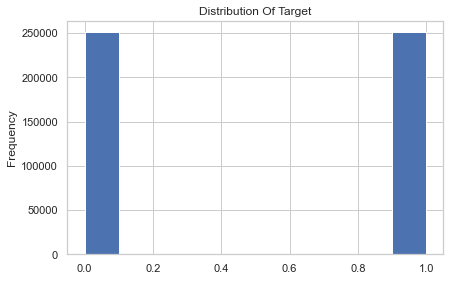

In [8]:
print("job 데이터 target 분포도:")
print(job_data['target'].value_counts())
job_data['target'].plot.hist(title = "Distribution Of Target")


### 데이터에 포함된 결측치 파악

* 모든 데이터에서 결측치가 포함되어 있지 않음
* 결측치가 포함되어 있지 않기 때문에 결측치 처리를 하지 않아도 됨
    * 결측치가 포함되어 있다면 ```SimpleImputer``` 함수를 통해서 처리한다.
        * 평균 값으로 하고자 한다면 ```strategy = 'mean'```
        * 중앙 값으로 하고자 한다면 ```strateget = 'median'```
        * 대부분은 중앙 값으로 대체하는 게 옳다. 평균 값은 이상치에 따라서 외곡이 크기 때문이다.
            * 이는 EDA를 통해서 데이터 분포를 파악해서 상황에 따라서 유동적으로 사용해야 함.

데이터 결측치 값: 
False    61
Name: mis_val_bool, dtype: int64


<AxesSubplot:title={'center':'Distribution Of Missing Values'}, ylabel='Frequency'>

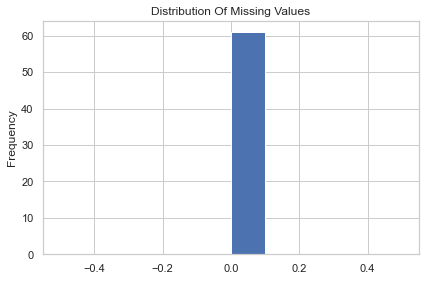

In [9]:
mis_val = job_data.isnull().sum()
mis_val_bool = mis_val >= 1

mis_val_df = pd.concat([mis_val, mis_val_bool], axis = 1)
mis_val_df = mis_val_df.rename(columns = {0: 'mis_val', 1: 'mis_val_bool'})

print("데이터 결측치 값: ")
print(mis_val_df['mis_val_bool'].value_counts())

mis_val_df['mis_val_bool'].astype(int).plot.hist(title = "Distribution Of Missing Values")

In [10]:
mis_val_df.head(60)

mis_val  mis_val_bool
id                            0         False
d_l_match_yn                  0         False
d_m_match_yn                  0         False
d_s_match_yn                  0         False
h_l_match_yn                  0         False
h_m_match_yn                  0         False
h_s_match_yn                  0         False
person_attribute_a            0         False
person_attribute_a_1          0         False
person_attribute_b            0         False
person_prefer_c               0         False
person_prefer_d_1             0         False
person_prefer_d_2             0         False
person_prefer_d_3             0         False
person_prefer_e               0         False
person_prefer_f               0         False
person_prefer_g               0         False
person_prefer_h_1             0         False
person_prefer_h_2             0         False
person_prefer_h_3             0         False
contents_attribute_i          0         False
contents_attribute_a          0         False
contents_attribute_j_1        0         False
contents_attribute_j          0         False
contents_attribute_c          0         False
contents_attribute_k          0         False
contents_attribute_l          0         False
contents_attribute_d          0         False
contents_attribute_m          0         False
contents_attribute_e          0         False
contents_attribute_h          0         False
person_rn                     0         False
contents_rn                   0         False
person_prefer_d_1_n           0         False
person_prefer_d_1_s           0         False
person_prefer_d_1_m           0         False
person_prefer_d_1_l           0         False
person_prefer_d_2_n           0         False
person_prefer_d_2_s           0         False
person_prefer_d_2_m           0         False
person_prefer_d_2_l           0         False
person_prefer_d_3_n           0         False
person_prefer_d_3_s           0         False
person_prefer_d_3_m           0         False
person_prefer_d_3_l           0         False
contents_attribute_d_n        0         False
contents_attribute_d_s        0         False
contents_attribute_d_m        0         False
contents_attribute_d_l        0         False
person_prefer_h_1_u           0         False
person_prefer_h_2_u           0         False
person_prefer_h_3_u           0         False
contents_attribute_h_u        0         False
contents_attribute_l_n        0         False
contents_attribute_l_s        0         False
contents_attribute_l_m        0         False
contents_attribute_l_l        0         False
Y                             0         False
M                             0         False
D                             0         False

### 데이터 컬럼에 대한 분포도 확인
* int형이 39개 (target 값이 여기에 속함)
* float64형이 16개
* bool 형이 6개

In [11]:
job_data.dtypes.value_counts()

int64      39
float64    16
bool        6
dtype: int64

### int형에 속하는 컬럼들에 특징 값 분포
* 특징 값 분포를 통해서 Label Encoding과 Ont-Hot Encoding 방식을 결정
* 가장 많은 특징 값을 갖는 것이 'person_rn'
* 동일한 특징 값을 갖는 특징들은 ['person_prefer_f', 'person_prefer_g', 'Y'] 라는 것을 파악
    * 모든 값에 대해서 동일한 값을 갖는 것을 주목해야 한다.
    * 이러한 특징 값들은 추후 모델 학습에서 Drop 시키고 학습을 실시 하겠습니다.

In [12]:
job_data.select_dtypes('int64').apply(pd.Series.nunique, axis=0)

id                        501951
person_attribute_a             2
person_attribute_a_1           8
person_attribute_b             6
person_prefer_c                5
person_prefer_d_1           1093
person_prefer_d_2           1081
person_prefer_d_3           1043
person_prefer_e               12
person_prefer_f                1
person_prefer_g                1
person_prefer_h_1            279
person_prefer_h_2            279
person_prefer_h_3            279
contents_attribute_i           3
contents_attribute_a           3
contents_attribute_j_1         9
contents_attribute_j           2
contents_attribute_c           4
contents_attribute_k           2
contents_attribute_l        1752
contents_attribute_d        1065
contents_attribute_m           5
contents_attribute_e          12
contents_attribute_h         250
person_rn                 300177
contents_rn               283359
person_prefer_h_1_u           19
person_prefer_h_2_u           19
person_prefer_h_3_u           19
contents_a

### Float형에 속하는 컬럼들에 특징 값 분포
* Float형인 것에 비해서 생각보다 특징 값의 분포도가 크지 않음.

In [13]:
job_data.select_dtypes('float64').apply(pd.Series.nunique, axis=0)

person_prefer_d_1_n       443
person_prefer_d_1_s        36
person_prefer_d_1_m       137
person_prefer_d_1_l        11
person_prefer_d_2_n       435
person_prefer_d_2_s        36
person_prefer_d_2_m       137
person_prefer_d_2_l        11
person_prefer_d_3_n       420
person_prefer_d_3_s        36
person_prefer_d_3_m       136
person_prefer_d_3_l        11
contents_attribute_d_n    431
contents_attribute_d_s     36
contents_attribute_d_m    137
contents_attribute_d_l     11
dtype: int64

### Float형에서 같은 특징 값 개수를 갖는 특징들 파악

In [14]:
index = job_data.select_dtypes('float64').apply(pd.Series.nunique, axis=0).index
values = job_data.select_dtypes('float64').apply(pd.Series.nunique, axis=0).values
pd.crosstab(index, values, margins = True).style.background_gradient(cmap='summer_r')

### INT형 특징들에 대한 EDA 실시
* ```job_data.select_dtypes('int64').apply(pd.Series.nunique, axis=0)``` 에 나오는 순서에 따라서 실시.

### person_attribute_a
* ```회원 속성 A``` 특징 값
* Categorical Features
* 2개의 unique한 값을 갖고 있기 때문에 많은 그래프를 그리지 않음
* 다른 특징 값과 연계해서 많이 그리도록 하겠음

<AxesSubplot:title={'center':'person_attribute_a'}>

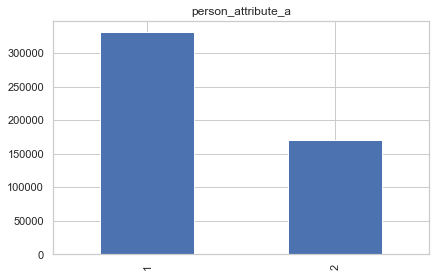

In [15]:
# 속성 값에 따른 분포도 파악
job_data['person_attribute_a'].value_counts().plot.bar(title = 'person_attribute_a')

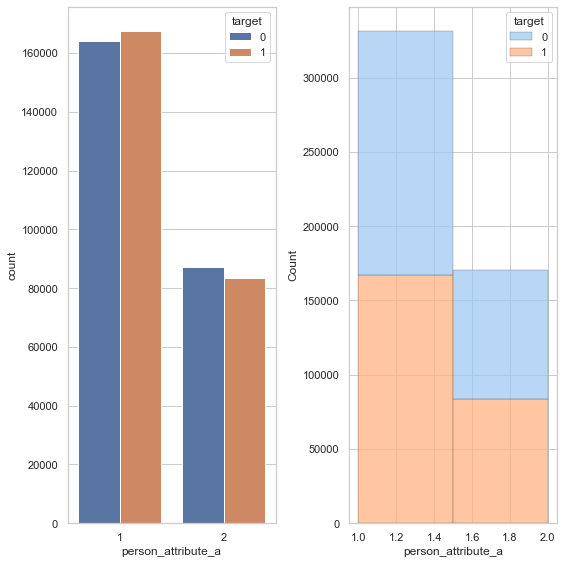

In [16]:
f, ax = plt.subplots(1, 2, figsize = (8, 8))

x = 'person_attribute_a'
y = 'target'

sns.countplot('person_attribute_a', hue = 'target', data = job_data, ax = ax[0])

sns.histplot(job_data,
            x = "person_attribute_a",
            hue="target",
            multiple="stack", 
            palette="pastel",
            edgecolor=".10",
            linewidth=".20",
            bins = 2,
            ax = ax[1])

plt.tight_layout(h_pad = 2.5)

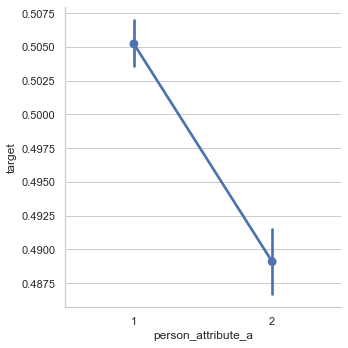

In [17]:
sns.factorplot(x, y, data = job_data)

* 1의 특징 값을 값을 갖는 사람들이 target 1일 확률이 더욱 높음

### person_attribute_a_1
* ```회원 속성 A 하위 속성 1``` 특징 값

person_attribute_a_1: 
0    158626
1     61195
5     57783
2     51895
6     49820
3     46340
4     44325
7     31967
Name: person_attribute_a_1, dtype: int64


<AxesSubplot:xlabel='person_attribute_a_1', ylabel='count'>

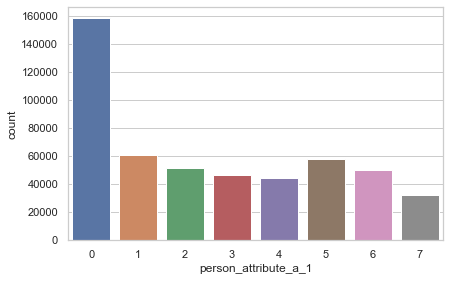

In [18]:
print("person_attribute_a_1: ")
print(job_data['person_attribute_a_1'].value_counts())

sns.countplot('person_attribute_a_1', data =job_data)

* 대부분의 사람들이 0의 값을 취하고 있는 것을 볼 수 있음

In [19]:
value = job_data['person_attribute_a_1'].value_counts()
value_percent = job_data['person_attribute_a_1'].value_counts() / len(job_data) * 100
value_table = pd.concat([value, value_percent], axis=1)
value_table.columns = ['Num Of Values', '% of Total Values']
value_table

Num Of Values  % of Total Values
0         158626          31.601889
1          61195          12.191429
5          57783          11.511681
2          51895          10.338659
6          49820           9.925272
3          46340           9.231977
4          44325           8.830543
7          31967           6.368550

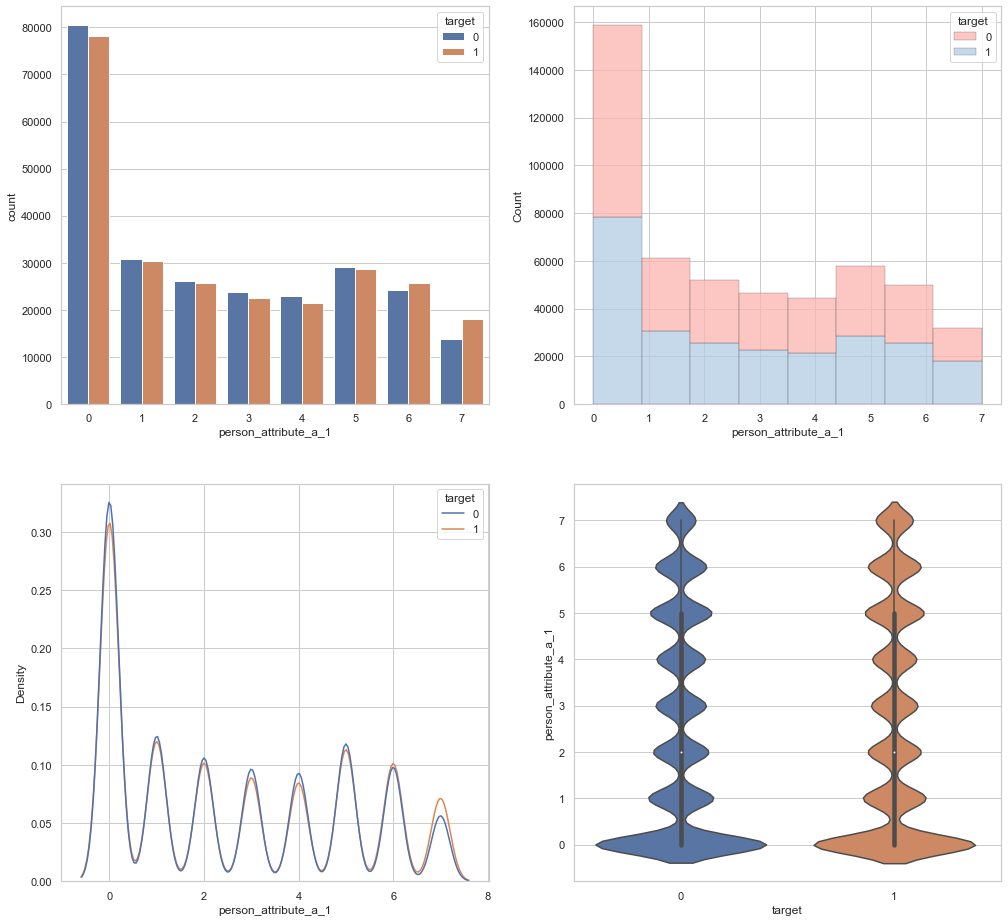

In [20]:
f, ax = plt.subplots(2,2, figsize=(15,15))

sns.countplot('person_attribute_a_1', hue = 'target', data =job_data, ax=ax[0][0])
sns.histplot(job_data,
            x = "person_attribute_a_1",
            hue="target",
            multiple="stack", 
            palette="Pastel1",
            edgecolor=".10",
            linewidth=".20",
            bins = 8,
            ax = ax[0][1])
sns.kdeplot(data=job_data, x="person_attribute_a_1", hue='target', ax=ax[1][0])
sns.violinplot(data=job_data, x="target", y="person_attribute_a_1", ax=ax[1][1])
plt.show()

* person_attribute_a_1 값들은 모두 비슷한 형태의 모양을 뜀
* Violinplot의 모양이 매우 흥미롭게 느껴짐
    * target 값이 0인 것과 1인 것에 있어서 매우 유사한 형태로 뛰고 있음
    * 이를 통해서 어떠한 특징 값을 갖더라도 그 값에 해당하는 사람은 target에 있어서 비슷한 형태를 취하는 것 으로 추정됨
* 하지만 대부분의 사람들이 0의 값을 취하는 것은 신기하게 느껴지네요.
    

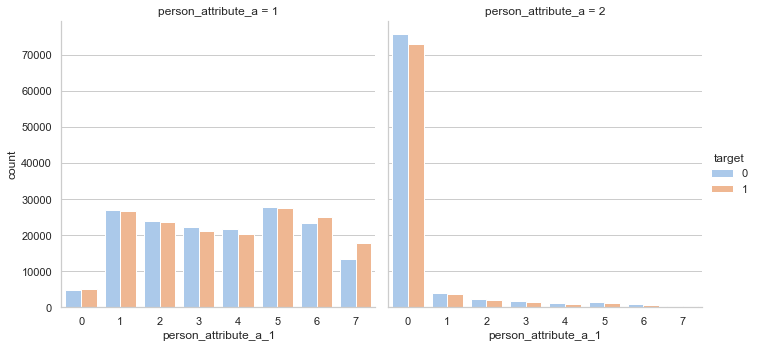

In [21]:
sns.catplot('person_attribute_a_1',col = 'person_attribute_a', 
            hue = 'target', kind='count', palette='pastel', 
            data =job_data)

#### person_attribute_a에 따른 person_attribute_a_1 분포도
* 이름이 비슷해서 혼동 되기 쉽습니다.
* person_attribute_a는 위에서 보았던 이진 데이터 입니다. (1과 2의 값을 갖던)

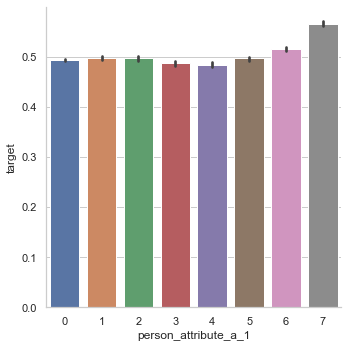

In [22]:
sns.catplot(x="person_attribute_a_1", y="target", kind="bar", data=job_data)

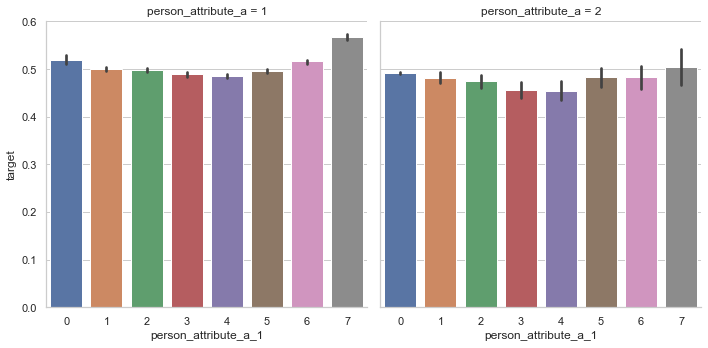

In [23]:
sns.catplot(x="person_attribute_a_1", y="target", col = "person_attribute_a" , kind="bar", data=job_data)

* person_attribute_a 값이 1일 때 target 값이 더욱 높은 것을 앞에서 보았음
* person_attribute_a 값에 따라서 person_attribute_a_1 분포도는 크게 변하지 않는 것으로 보임
* 하지만 두 경우 모두 person_attribute_a_1 값이 7일 때 target 값일 확률이 높은 것으로 보임

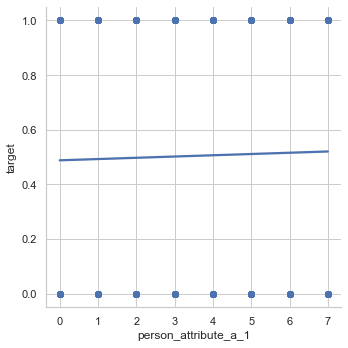

In [24]:
sns.lmplot(x = 'person_attribute_a_1', y = 'target', data = job_data)

In [25]:
pd.crosstab(job_data.person_attribute_a_1,job_data.target,margins=True).style.background_gradient(cmap='summer_r')

### person_attribute_b
* ```회원 속성 B``` 특징 값

person_attribute_b: 
2    223884
3    139489
4    121200
1     10150
5      7123
0       105
Name: person_attribute_b, dtype: int64


<AxesSubplot:xlabel='person_attribute_b', ylabel='count'>

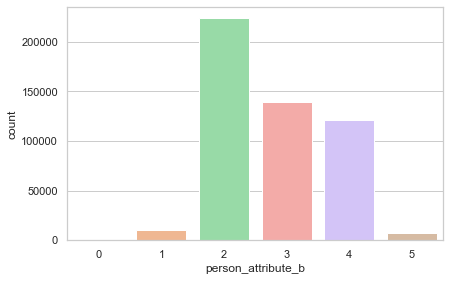

In [26]:
print("person_attribute_b: ")
print(job_data['person_attribute_b'].value_counts())

sns.countplot('person_attribute_b', data =job_data, palette='pastel')

* 다른 값들에 비해서 0의 값이 매우 적은 것을 볼 수 있음

In [27]:
value = job_data['person_attribute_b'].value_counts()
value_percent = job_data['person_attribute_b'].value_counts() / len(job_data) * 100
value_table = pd.concat([value, value_percent], axis=1)
value_table.columns = ['Num Of Values', '% of Total Values']
value_table

Num Of Values  % of Total Values
2         223884          44.602760
3         139489          27.789366
4         121200          24.145783
1          10150           2.022110
5           7123           1.419063
0            105           0.020918

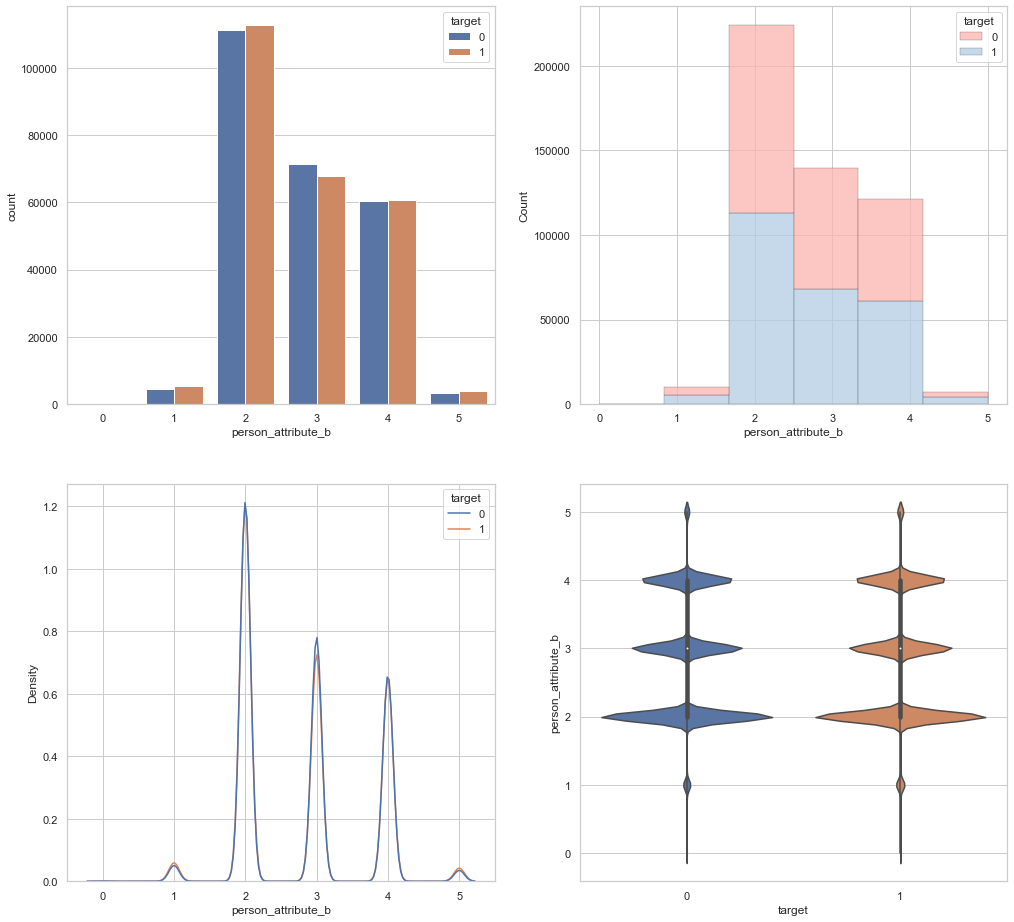

In [28]:
f, ax = plt.subplots(2,2, figsize=(15,15))

x = 'person_attribute_b'
y = 'target'
sns.countplot(x, hue = y, data =job_data, ax=ax[0][0])
sns.histplot(job_data,
            x = x,
            hue=y,
            multiple="stack", 
            palette="Pastel1",
            edgecolor=".10",
            linewidth=".20",
            bins = 6,
            ax = ax[0][1])
sns.kdeplot(data=job_data, x=x, hue=y, ax=ax[1][0])
sns.violinplot(data=job_data, x=y, y=x, ax=ax[1][1])
plt.show()

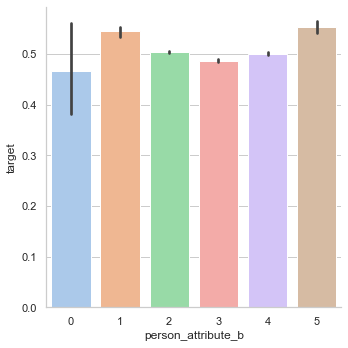

In [29]:
sns.catplot(x=x, y=y, kind="bar", data=job_data, palette='pastel')

* 1의 특징과 5의 특징을 제외하고는 target 값이 1일 확률이 절반 이하 수준임

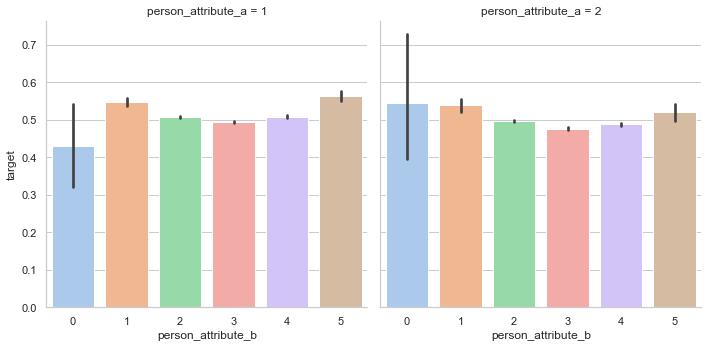

In [30]:
sns.catplot(x=x, y=y, kind="bar",col = "person_attribute_a", data=job_data, palette='pastel')

* person_attribute_a 값에 따라서 0의 특징 값이 가장 영향을 받는 것으로 보임
* person_attribute_a 는 1의 값이 더욱 높은 높은 확률로 target이 1이 었음.
* 하지만 person_attribute_b의 0인 경우에는 이러한 부분과 반대 되는 모습을 보임

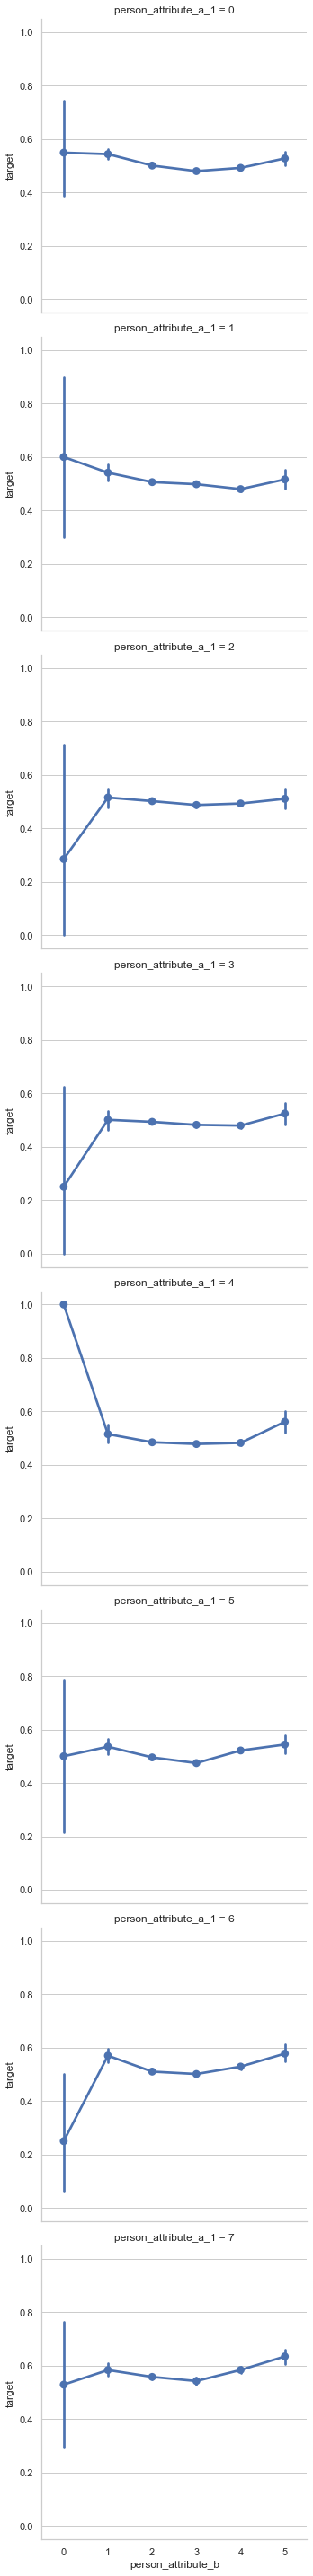

In [31]:
sns.catplot(x=x, y=y, kind="point",row = "person_attribute_a_1", data=job_data)

* ```person_attribute_a_1 = 4``` 이고 ```person_attribute_b = 0```이면 무조건 target = 1이 된다.

In [32]:
job_data.loc[(job_data['person_attribute_a_1'] == 4) & (job_data['person_attribute_b'] == 0)]

id  d_l_match_yn  d_m_match_yn  d_s_match_yn  h_l_match_yn  \
427988  427988         False         False         False          True   
429248  429248         False         False         False          True   

        h_m_match_yn  h_s_match_yn  person_attribute_a  person_attribute_a_1  \
427988          True          True                   1                     4   
429248          True          True                   1                     4   

        person_attribute_b  ...  person_prefer_h_3_u  contents_attribute_h_u  \
427988                   0  ...                  277                     277   
429248                   0  ...                  277                     277   

        contents_attribute_l_n  contents_attribute_l_s  \
427988                     550                     544   
429248                     471                     467   

        contents_attribute_l_m  contents_attribute_l_l     Y  M   D  target  
427988                     527                    2006  2020  5  19       1  
429248                     441                    2006  2020  4  25       1  

[2 rows x 61 columns]

* 이러한 특징 값을 갖는 사람은 2명뿐이다. 매우 희귀한 경우라고 할 수 있다. 

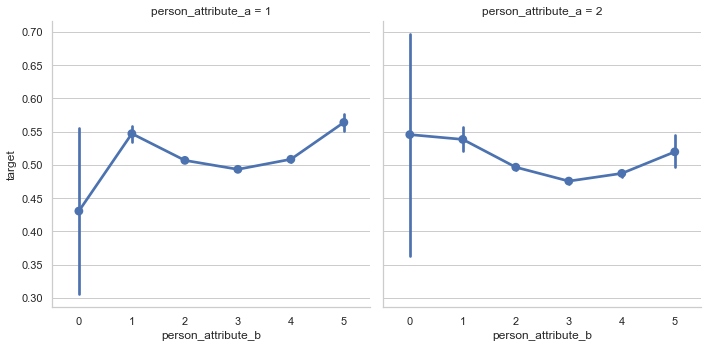

In [33]:
sns.catplot(x=x, y=y, kind="point",col = "person_attribute_a", data=job_data)

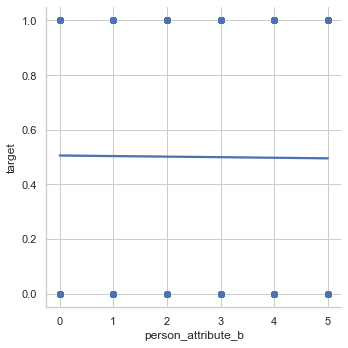

In [34]:
sns.lmplot(x = "person_attribute_b", y = y, data = job_data)

### person_prefer_c
* ```회원 선호 속성 C``` 특징 값

person_prefer_c: 
1    304571
5    156688
2     20223
3     15665
4      4804
Name: person_prefer_c, dtype: int64


<AxesSubplot:xlabel='person_prefer_c', ylabel='count'>

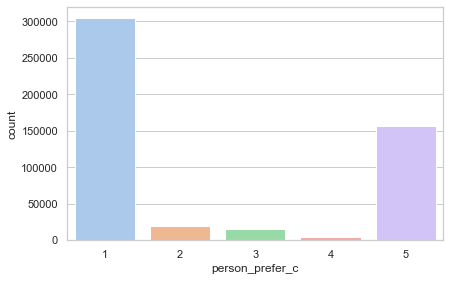

In [35]:
print("person_prefer_c: ")
print(job_data['person_prefer_c'].value_counts())

sns.countplot('person_prefer_c', data =job_data, palette='pastel')

In [36]:
value = job_data['person_prefer_c'].value_counts()
value_percent = job_data['person_prefer_c'].value_counts() / len(job_data) * 100
value_table = pd.concat([value, value_percent], axis=1)
value_table.columns = ['Num Of Values', '% of Total Values']
value_table

Num Of Values  % of Total Values
1         304571          60.677437
5         156688          31.215796
2          20223           4.028879
3          15665           3.120823
4           4804           0.957066

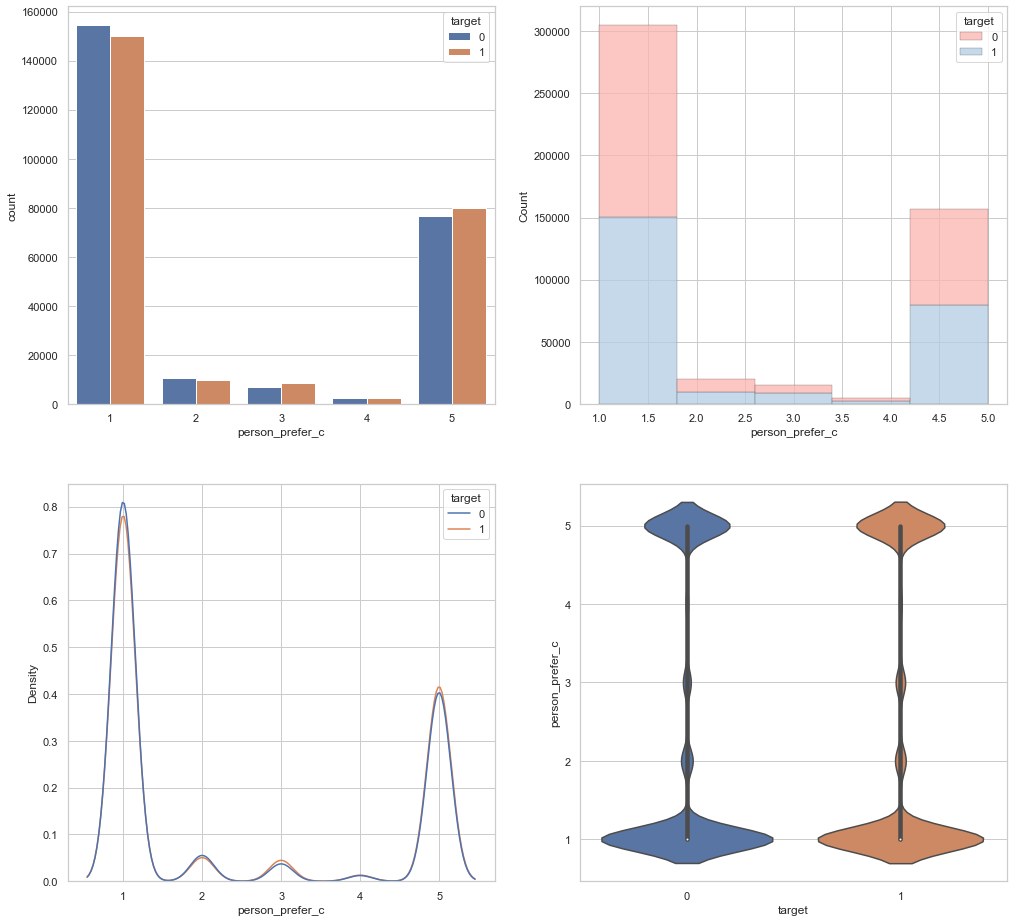

In [37]:
f, ax = plt.subplots(2,2, figsize=(15,15))

x = 'person_prefer_c'
y = 'target'
sns.countplot(x, hue = y, data =job_data, ax=ax[0][0])
sns.histplot(job_data,
            x = x,
            hue=y,
            multiple="stack", 
            palette="Pastel1",
            edgecolor=".10",
            linewidth=".20",
            bins = 5,
            ax = ax[0][1])
sns.kdeplot(data=job_data, x=x, hue=y, ax=ax[1][0])
sns.violinplot(data=job_data, x=y, y=x, ax=ax[1][1])
plt.show()

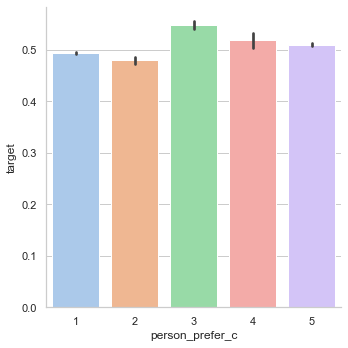

In [38]:
sns.catplot(x=x, y=y, kind="bar", data=job_data, palette='pastel')

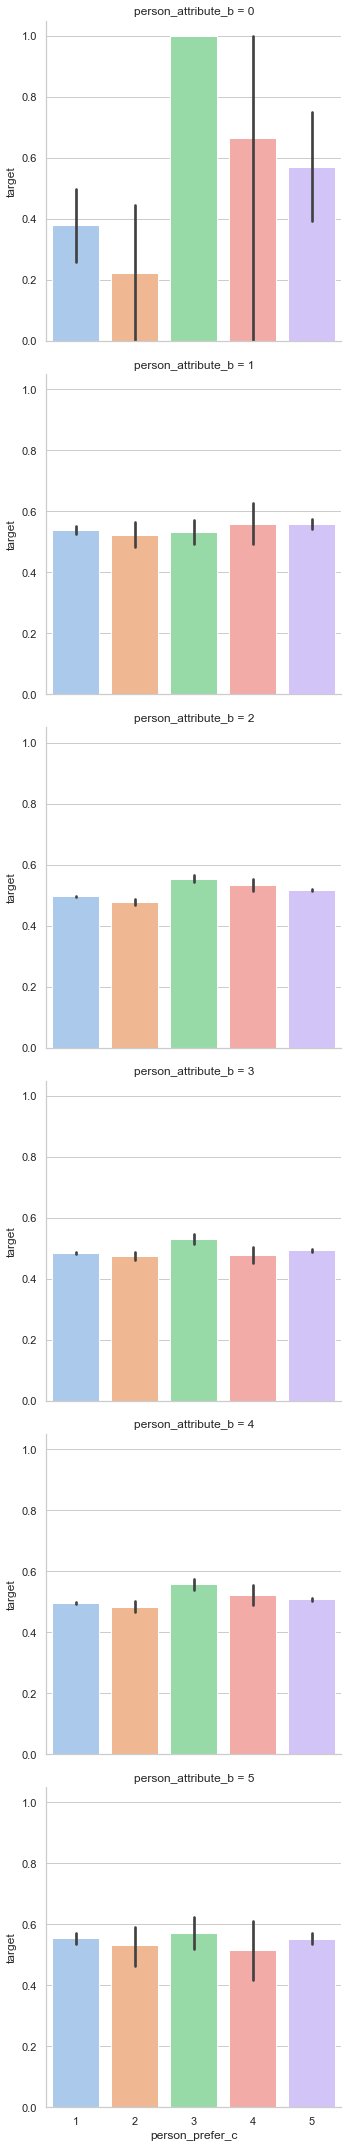

In [39]:
sns.catplot(x=x, y=y, kind="bar",row = "person_attribute_b", data=job_data, palette='pastel')

* person_prefer_c 3이고 person_attribute_b = 0일 경우에 무조건 적으로 target = 1인 것을 볼 수 있음.

In [40]:
job_data.loc[(job_data['person_prefer_c'] == 3) & (job_data['person_attribute_b'] == 0)]

id  d_l_match_yn  d_m_match_yn  d_s_match_yn  h_l_match_yn  \
144520  144520         False         False         False         False   
157233  157233          True          True          True          True   
220839  220839          True         False         False          True   
309103  309103         False         False         False         False   
314503  314503         False         False         False         False   
378324  378324         False         False         False          True   
437122  437122          True          True          True         False   

        h_m_match_yn  h_s_match_yn  person_attribute_a  person_attribute_a_1  \
144520         False         False                   1                     5   
157233         False         False                   1                     1   
220839          True          True                   1                     2   
309103         False         False                   2                     3   
314503         False         False                   1                     5   
378324         False         False                   1                     5   
437122         False         False                   1                     5   

        person_attribute_b  ...  person_prefer_h_3_u  contents_attribute_h_u  \
144520                   0  ...                   58                      94   
157233                   0  ...                   58                       3   
220839                   0  ...                  208                     208   
309103                   0  ...                   58                      85   
314503                   0  ...                   58                      94   
378324                   0  ...                   58                       3   
437122                   0  ...                   94                      58   

        contents_attribute_l_n  contents_attribute_l_s  \
144520                    1671                    1670   
157233                    1646                    1646   
220839                     991                     987   
309103                     952                     951   
314503                    1662                    1659   
378324                    1645                    1645   
437122                     437                     417   

        contents_attribute_l_m  contents_attribute_l_l     Y   M   D  target  
144520                    1658                    2017  2020   3  18       1  
157233                    1645                    2017  2020   7  31       1  
220839                     954                    2009  2020  11   3       1  
309103                     930                    2009  2020   6   9       1  
314503                    1658                    2017  2020   2   8       1  
378324                    1645                    2017  2020   3  31       1  
437122                     407                    2006  2020   3  26       1  

[7 rows x 61 columns]

* 위와 같은 특징 값을 갖는 사람들은 모두 target = 1 이 된다.
* 이러한 값을 갖을 확률은 0.13945584329944556%로 매우 희귀한 경우라고 할 수 있다.

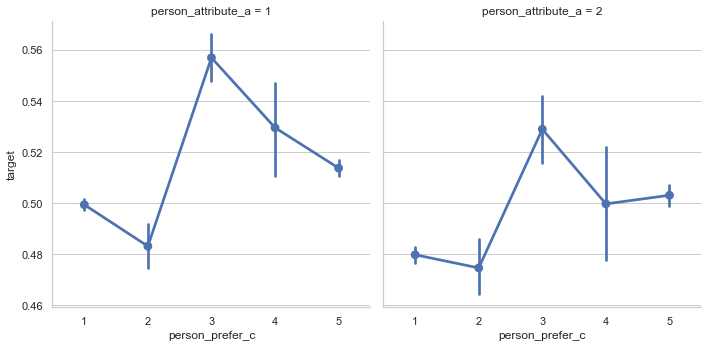

In [41]:
sns.catplot(x=x, y=y, kind="point",col = "person_attribute_a", data=job_data)

* person_attribute_a의 값에 상관 없이 그래프의 모양은 비슷하게 나오는 것을 볼 수 있음
* 다만, person_attribute_a값이 1일 때 가 역시 전체적으로 target 값이 1일 확률이 높은 것으로 나타남
* 또한 person_attribute_a 값이 2가 될 때 person_prefer_c에서 4의 값을 갖는 것이 다소 target 값일 확률이 떨어지는 것을 볼 수 있음

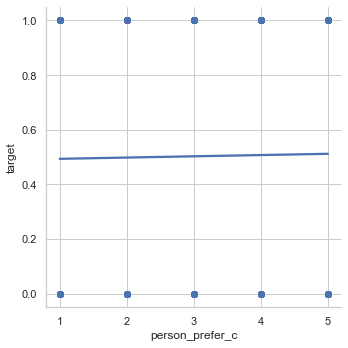

In [42]:
sns.lmplot(x = x, y = y, data = job_data)

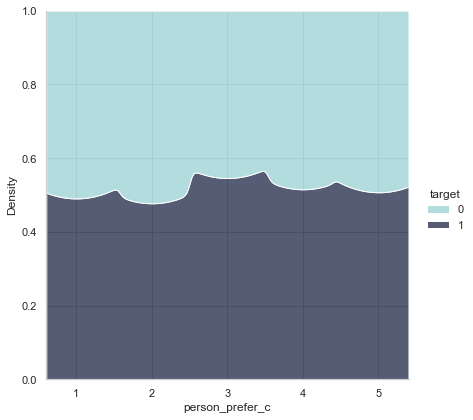

In [43]:
sns.displot(
    data=job_data,
    x=x, hue=y,
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

<AxesSubplot:>

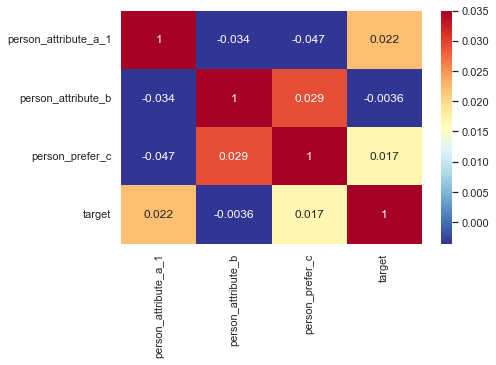

In [44]:
sns.heatmap(job_data[['person_attribute_a_1',
       'person_attribute_b', 'person_prefer_c', 'target']].corr(),cmap = plt.cm.RdYlBu_r, annot=True, vmin=-0.0036, vmax = 0.035)

### person_prefer_e
* ```회원 선호 속성 E``` 특징 값

person_prefer_e: 
4     160100
3     139683
5      81635
0      66676
6      31407
7       8641
8       6259
2       2323
10      1936
9       1473
11      1452
1        366
Name: person_prefer_e, dtype: int64


<AxesSubplot:xlabel='person_prefer_e', ylabel='count'>

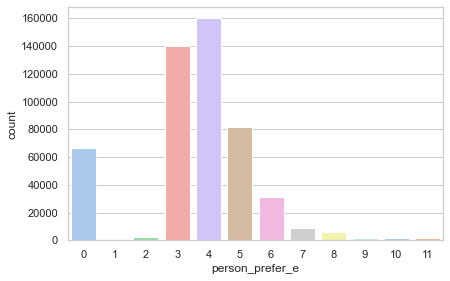

In [45]:
print("person_prefer_e: ")
print(job_data['person_prefer_e'].value_counts())

x = 'person_prefer_e'
y = 'target'

sns.countplot('person_prefer_e', data =job_data, palette='pastel')

In [46]:
value = job_data['person_prefer_e'].value_counts()
value_percent = job_data['person_prefer_e'].value_counts() / len(job_data) * 100
value_table = pd.concat([value, value_percent], axis=1)
value_table.columns = ['Num Of Values', '% of Total Values']
value_table

Num Of Values  % of Total Values
4          160100          31.895544
3          139683          27.828015
5           81635          16.263540
0           66676          13.283368
6           31407           6.256985
7            8641           1.721483
8            6259           1.246934
2            2323           0.462794
10           1936           0.385695
9            1473           0.293455
11           1452           0.289271
1             366           0.072915

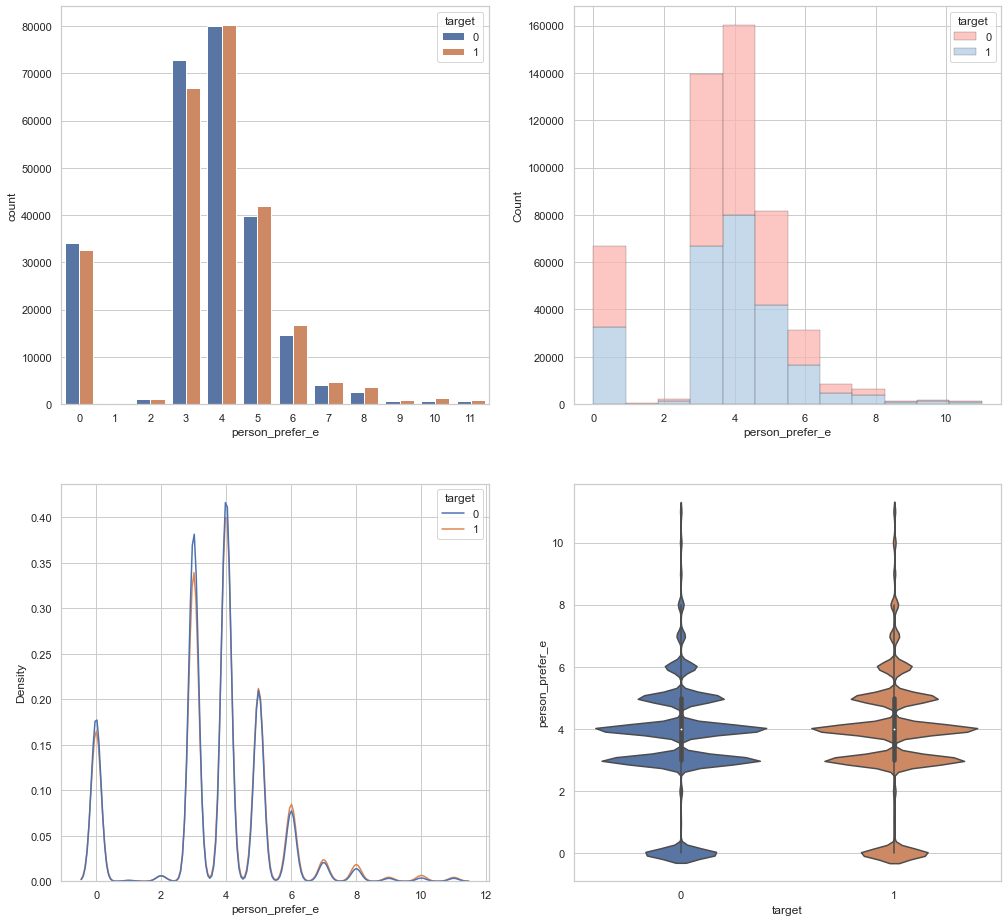

In [47]:
f, ax = plt.subplots(2,2, figsize=(15,15))


sns.countplot(x, hue = y, data =job_data, ax=ax[0][0])
sns.histplot(job_data,
            x = x,
            hue=y,
            multiple="stack", 
            palette="Pastel1",
            edgecolor=".10",
            linewidth=".20",
            bins = 12,
            ax = ax[0][1])
sns.kdeplot(data=job_data, x=x, hue=y, ax=ax[1][0])
sns.violinplot(data=job_data, x=y, y=x, ax=ax[1][1])
plt.show()

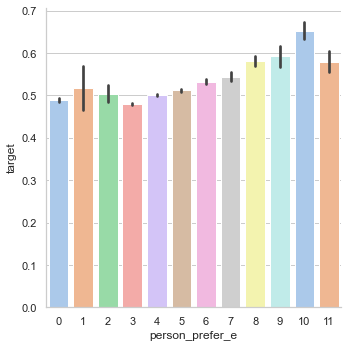

In [48]:
sns.catplot(x=x, y=y, kind="bar", data=job_data, palette='pastel')

* 값이 증가 할 수록 target일 확률이 높아짐
* 10일 경우에는 target 값이 될 확률이 60%가 넘음
* 이는 단일 값 기준으로 지금 까지 본 것들 중에서 가장 높은 것을 알 수 있음

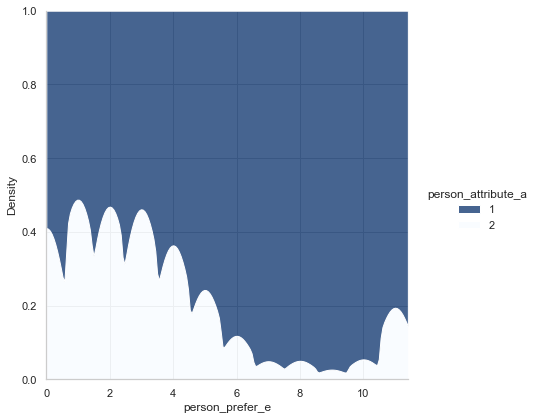

In [49]:
sns.displot(
    data=job_data,
    x=x, hue="person_attribute_a",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="Blues_r",
)

* person_attribute_a의 값이 1인 경우가 대다수 임

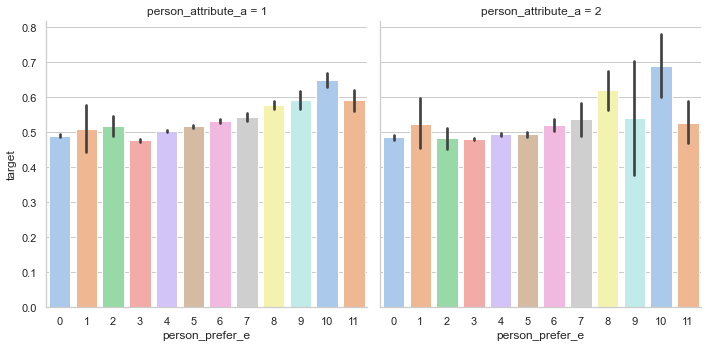

In [50]:
sns.catplot(x=x, y=y, kind="bar", col = "person_attribute_a", data=job_data, palette='pastel')

* person_attribute_a 값에 사관 없이 10은 60%가 넘는 것을 보여줌
* person_attribute_a 값이 2인 경우에 8의 값도 60%가 넘는 것을 볼 수 있음

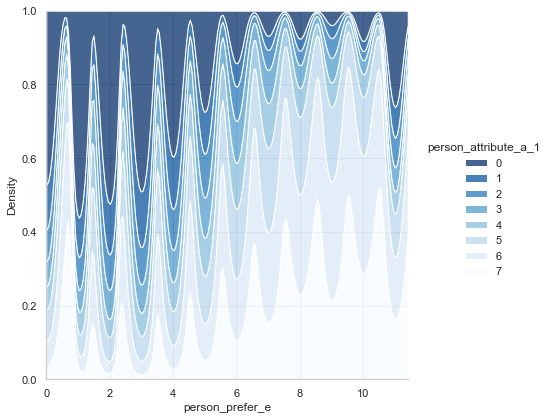

In [51]:
sns.displot(
    data=job_data,
    x=x, hue="person_attribute_a_1",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="Blues_r",
)

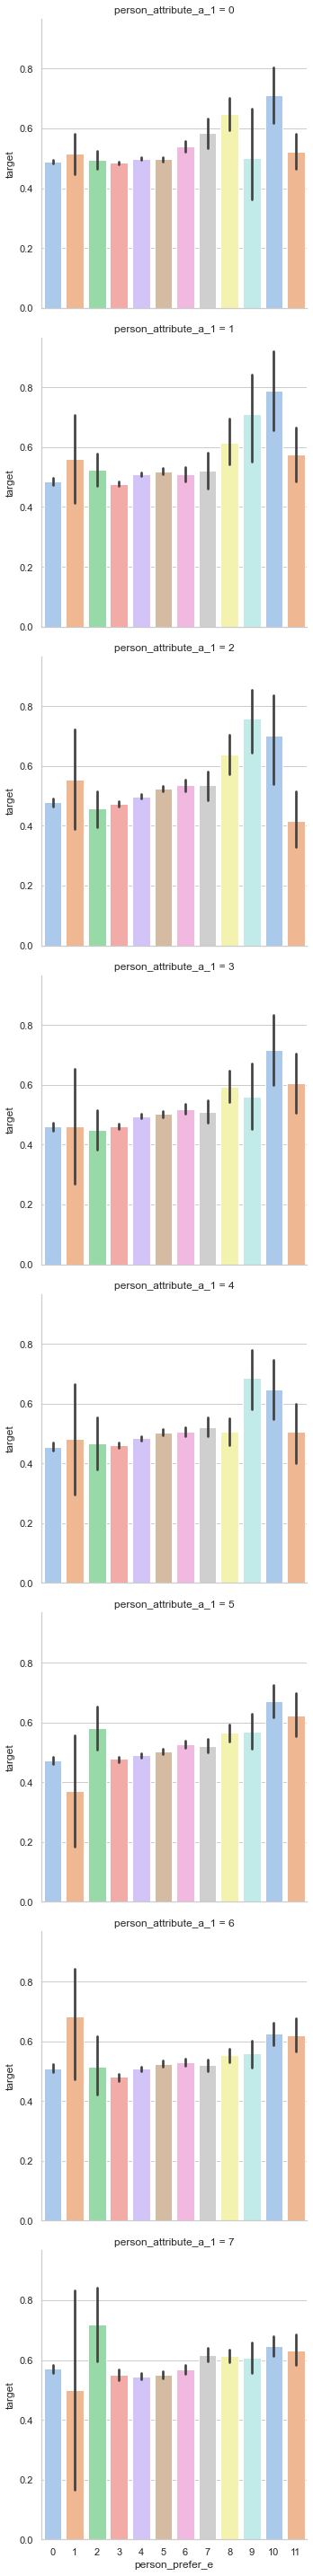

In [52]:
sns.catplot(x=x, y=y, kind="bar", row = "person_attribute_a_1", data=job_data, palette='pastel')

* person_attribute_a_1 값에 따라서도 그래프의 모양이 크게 바뀌는 것을 볼 수 있음

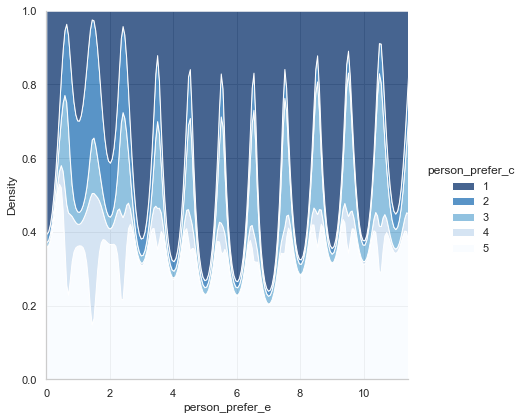

In [53]:
sns.displot(
    data=job_data,
    x=x, hue="person_prefer_c",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="Blues_r",
)

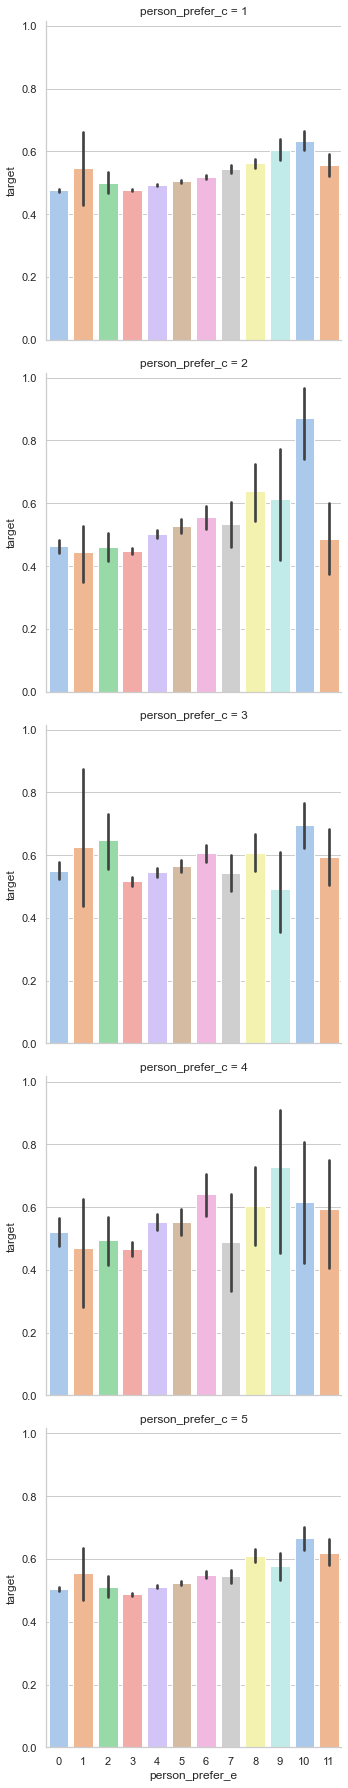

In [54]:
sns.catplot(x=x, y=y, kind="bar", row = "person_prefer_c", data=job_data, palette='pastel')

### person_prefer_f
* ```회원 선호 속성 F``` 특징 값
* 2개의 특징 값만을 갖는 속성
* 모든 값들이 1로만 구성 되어 있습니다.

person_prefer_f: 
1    501951
Name: person_prefer_f, dtype: int64


<AxesSubplot:xlabel='person_prefer_f', ylabel='count'>

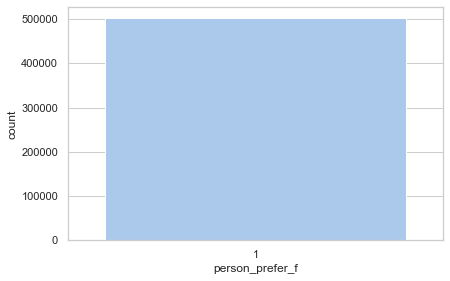

In [55]:
print("person_prefer_f: ")
print(job_data['person_prefer_f'].value_counts())

x = 'person_prefer_f'
y = 'target'

sns.countplot('person_prefer_f', data =job_data, palette='pastel')

* person_prefer_f의 모든 값은 1로 동일함
* 이러한 특징은 추후에 Feature Engineerinng에서 삭제 하도록 하겠음

### person_prefer_g
* ```회원 선호 속성 G``` 특징 값
* 2개의 특징 값만을 갖는 속성
* 모든 값들이 1로만 구성 되어 있습니다.

person_prefer_g: 
1    501951
Name: person_prefer_g, dtype: int64


<AxesSubplot:xlabel='person_prefer_g', ylabel='count'>

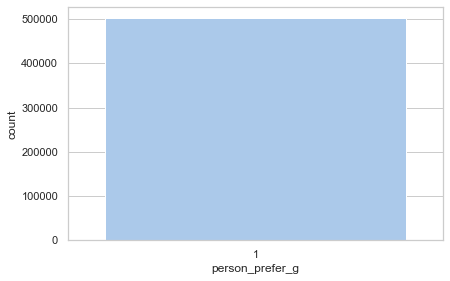

In [56]:
print("person_prefer_g: ")
print(job_data['person_prefer_g'].value_counts())

x = 'person_prefer_g'
y = 'target'

sns.countplot('person_prefer_g', data =job_data, palette='pastel')

* person_prefer_g의 모든 값은 1로 동일함
* 이러한 특징은 추후에 Feature Engineerinng에서 삭제 하도록 하겠음

### contents_attribute_i
* ```컨텐츠 속성 I``` 특징 값
* Categorical Features

contents_attribute_i: 
3    341052
1    116273
2     44626
Name: contents_attribute_i, dtype: int64


<AxesSubplot:xlabel='contents_attribute_i', ylabel='count'>

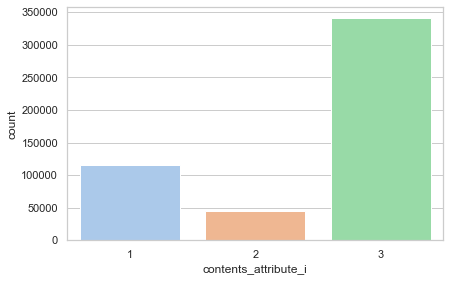

In [57]:
# contents_attribute_i
print("contents_attribute_i: ")
print(job_data['contents_attribute_i'].value_counts())

x = 'contents_attribute_i'
y = 'target'

sns.countplot('contents_attribute_i', data =job_data, palette='pastel')

* contents_attribute_i의 값에서는 3의 값이 분포가 가장 큼


In [58]:
value = job_data['contents_attribute_i'].value_counts()
value_percent = job_data['contents_attribute_i'].value_counts() / len(job_data) * 100
value_table = pd.concat([value, value_percent], axis=1)
value_table.columns = ['Num Of Values', '% of Total Values']
value_table

Num Of Values  % of Total Values
3         341052          67.945278
1         116273          23.164213
2          44626           8.890509

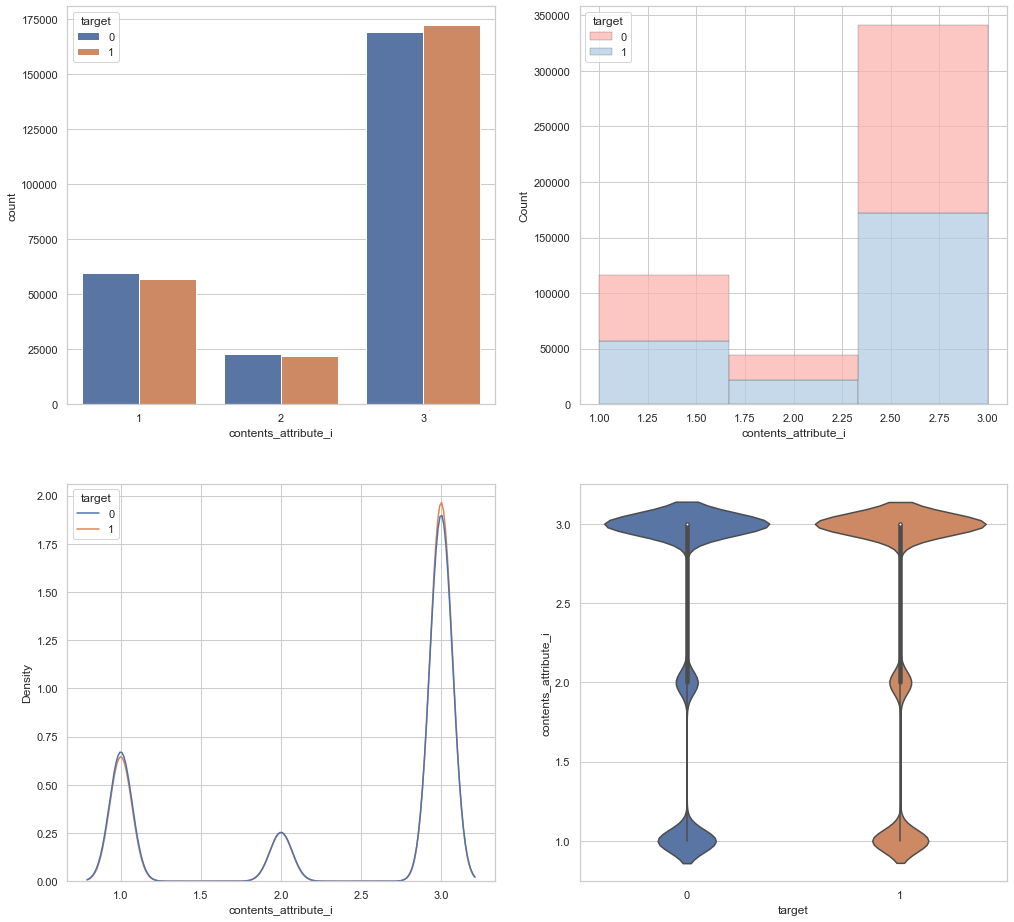

In [59]:
f, ax = plt.subplots(2,2, figsize=(15,15))

sns.countplot(x, hue = y, data =job_data, ax=ax[0][0])
sns.histplot(job_data,
            x = x,
            hue=y,
            multiple="stack", 
            palette="Pastel1",
            edgecolor=".10",
            linewidth=".20",
            bins = 3,
            ax = ax[0][1])
sns.kdeplot(data=job_data, x=x, hue=y, ax=ax[1][0])
sns.violinplot(data=job_data, x=y, y=x, ax=ax[1][1])
plt.show()

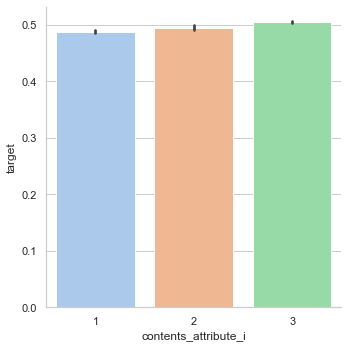

In [60]:
sns.catplot(x=x, y=y, kind="bar", data=job_data, palette='pastel')

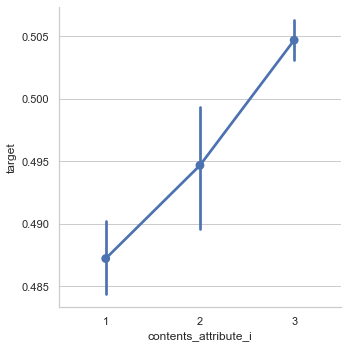

In [61]:
sns.catplot(x=x, y=y, kind="point", data=job_data)

* contents_attribute_i는 총 3개의 값들로 이루어짐
* 3의 값을 제외하고는 target 값일 확률이 50%가 되지 않는 것을 볼 수 있음
* 다른 특징 값과 함께 했을 때와 비교 해보도록 하겠습니다.

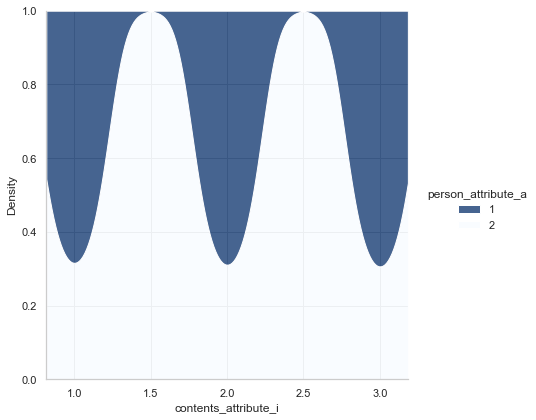

In [62]:
sns.displot(
    data=job_data,
    x=x, hue="person_attribute_a",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="Blues_r",
)

* person_attribute_a값이 얼마나 분포하고 있는지를 보여줌

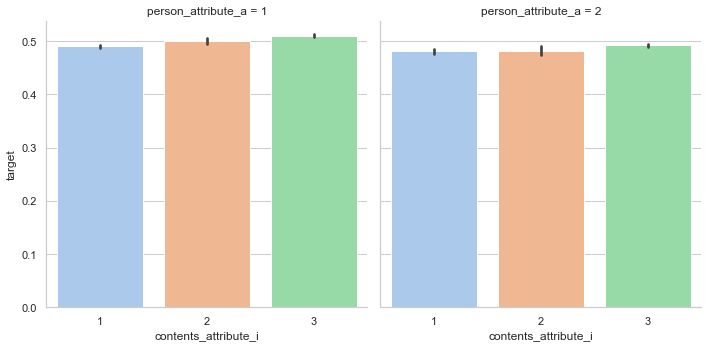

In [63]:
sns.catplot(x=x, y=y, kind="bar",col = "person_attribute_a", data=job_data, palette='pastel')

* person_attribute_a의 값이 = 1일 때가 target 값일 확률이 높음

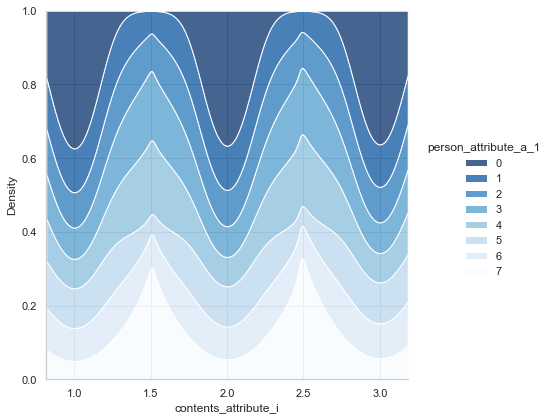

In [64]:
sns.displot(
    data=job_data,
    x=x, hue="person_attribute_a_1",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="Blues_r",
)

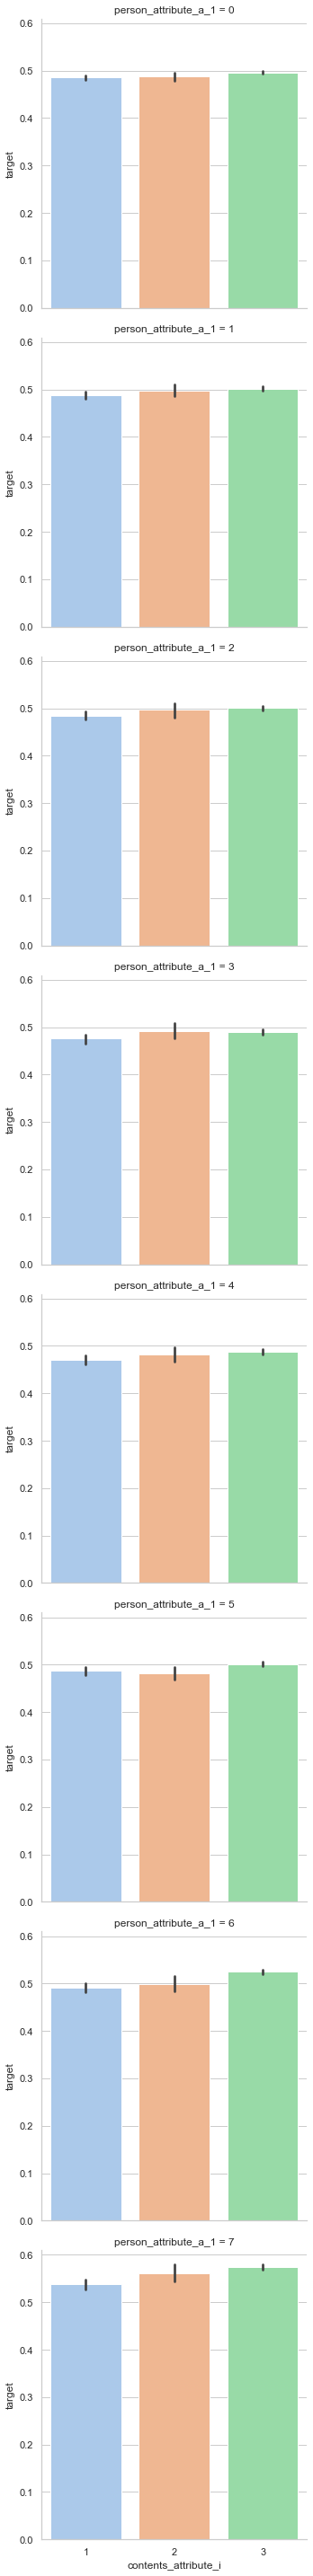

In [65]:
sns.catplot(x=x, y=y, kind="bar",row = "person_attribute_a_1", data=job_data, palette='pastel')

* ```person_attribute_a_1 = 7``` 를 갖을 때 target 값일 확률이 가장 큼
* 대부분의 경우에서 ```contents_attribute_i = 3```일 때가 target 값일 확률이 큼

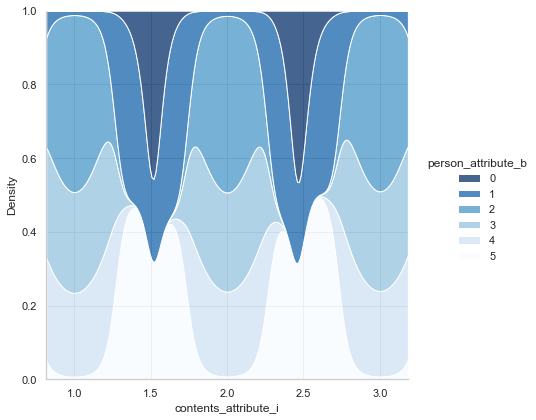

In [66]:
sns.displot(
    data=job_data,
    x=x, hue="person_attribute_b",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="Blues_r",
)

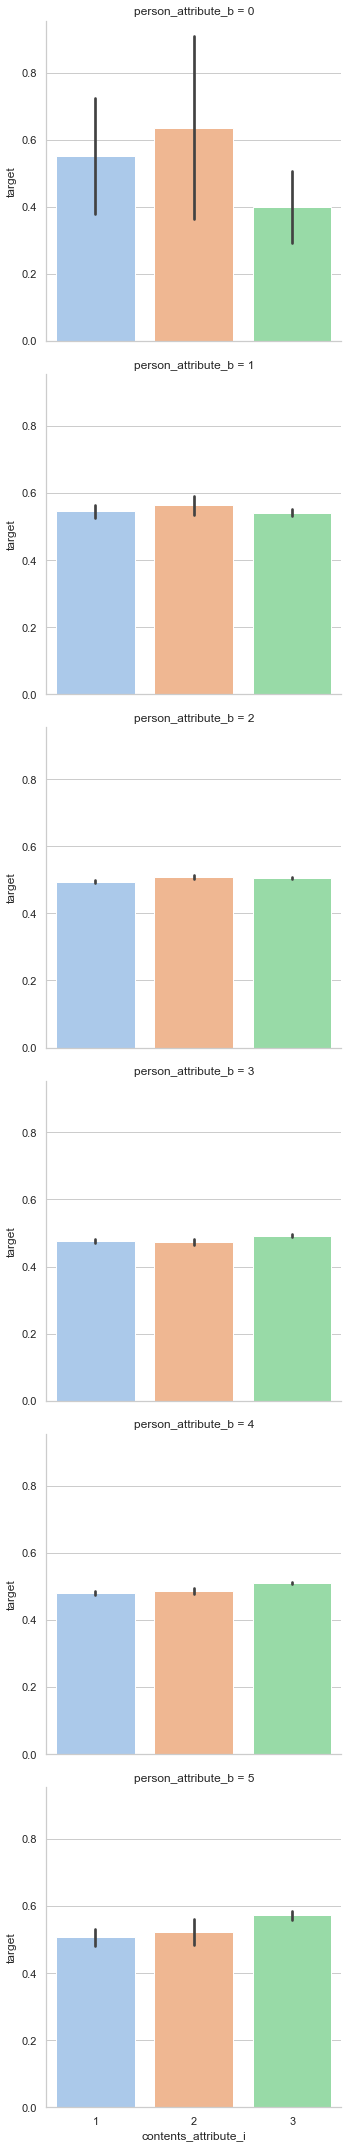

In [67]:
sns.catplot(x=x, y=y, kind="bar",row = "person_attribute_b", data=job_data, palette='pastel')

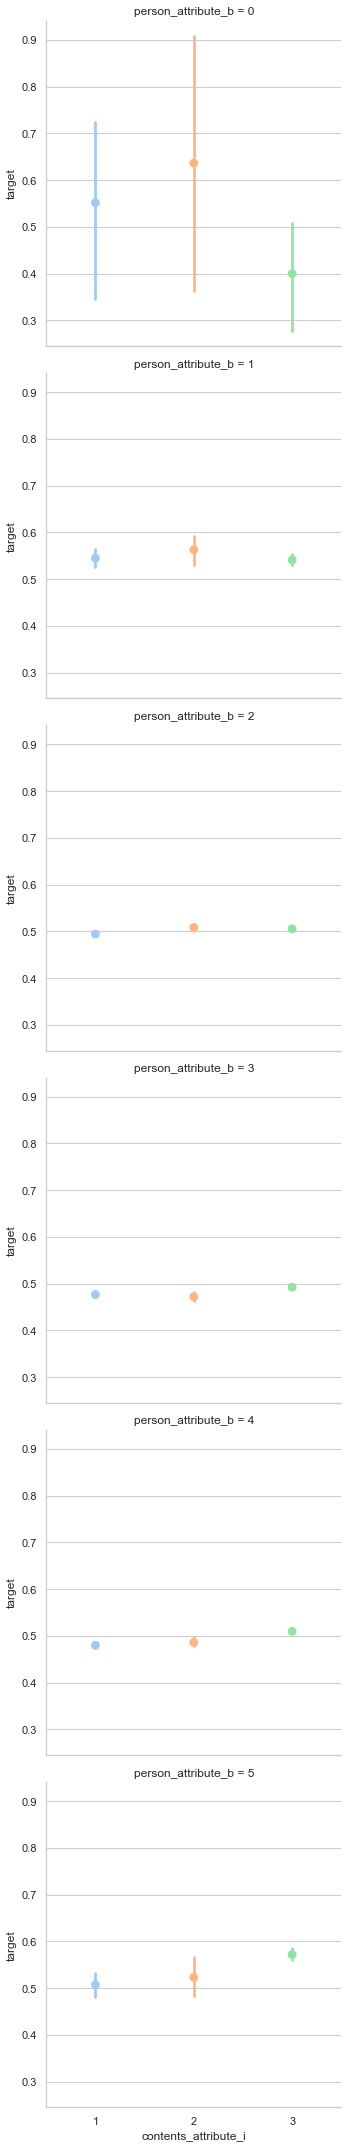

In [68]:
sns.catplot(x=x, y=y, kind="point",row = "person_attribute_b", data=job_data, palette='pastel')

* ```person_attribute_b = 0 ```, ```person_attribute_b = 1```, 그리고```person_attribute_b = 5```일 때 높을 확률로 target 값일 확률이 높음
* ```person_attribute_b = 3```일 때 target일 확률이 가장 낮은 것을 볼 수 있음

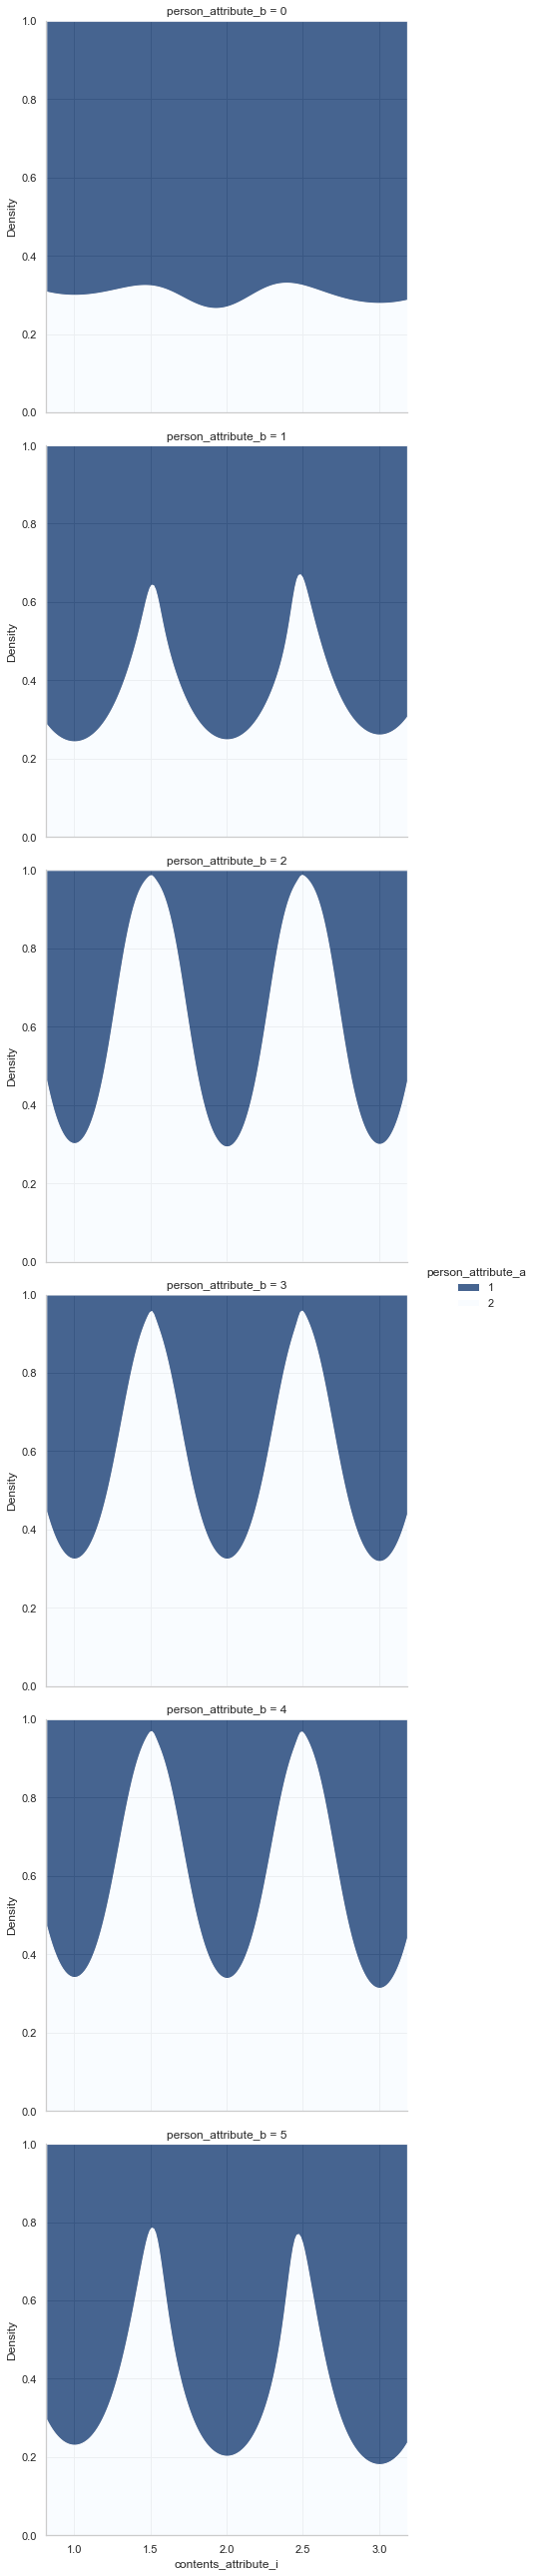

In [69]:
sns.displot(
    data=job_data,
    x=x, hue="person_attribute_a",
    row = "person_attribute_b",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="Blues_r",
)

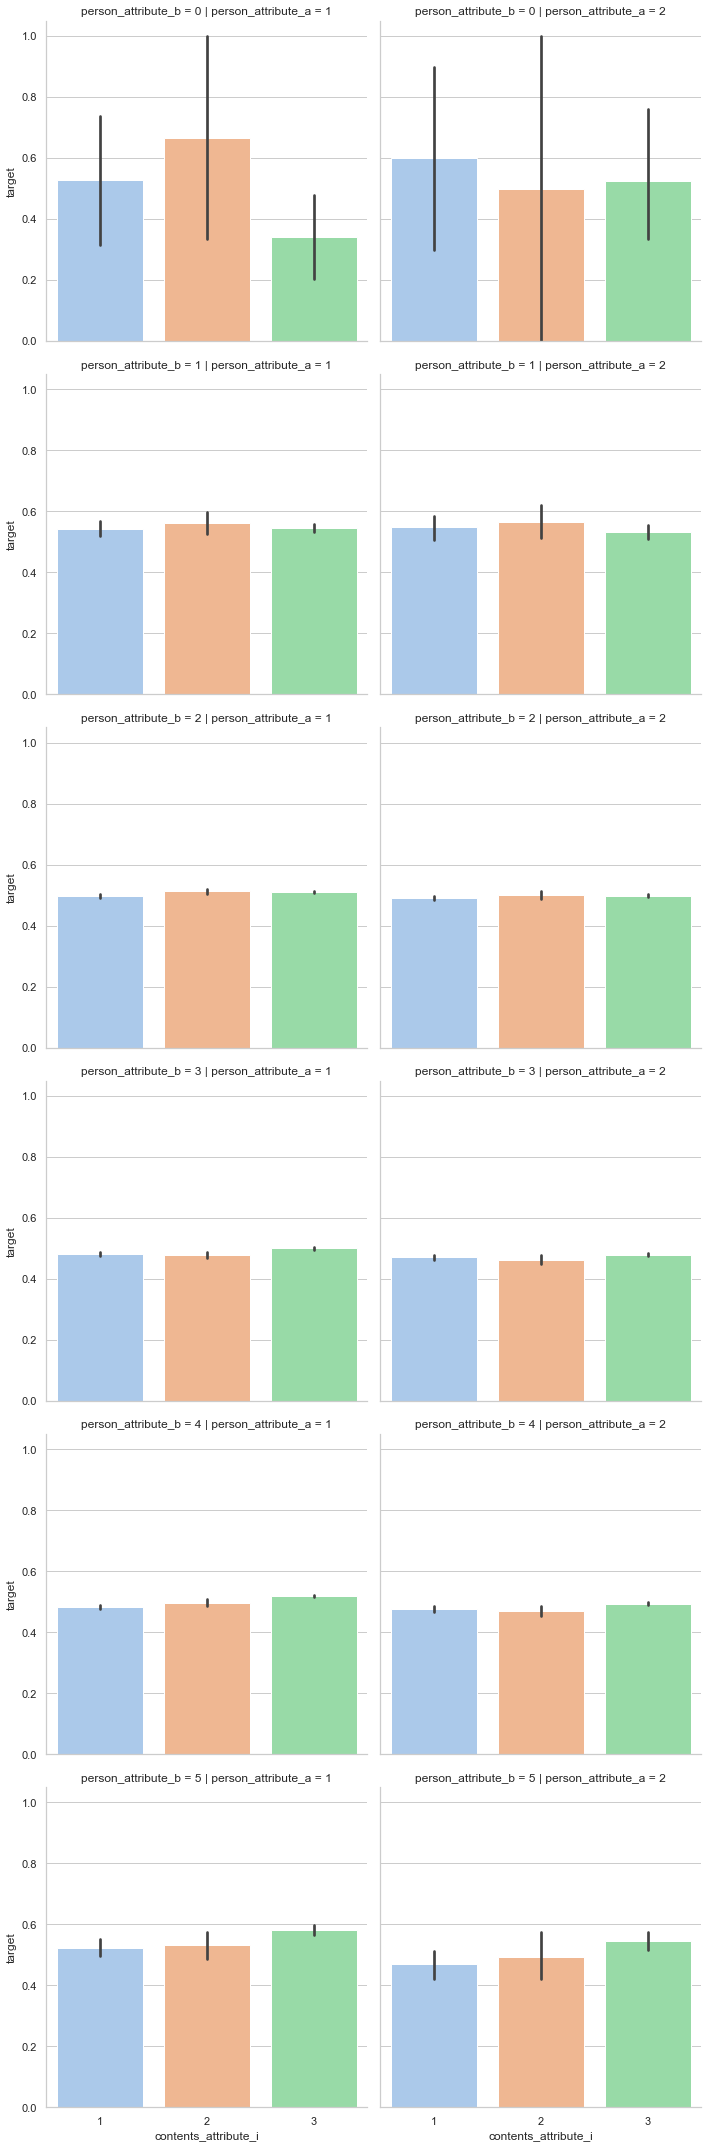

In [70]:
sns.catplot(x=x, y=y, kind="bar",col = "person_attribute_a",row = "person_attribute_b", data=job_data, palette='pastel', legend = True)

* ```person_attribute_b = 0 & person_attribute_a = 1 & contents_attribute_i = 2```일 때 target일 확률이 가장 큼

### contents_attribute_a
* ```컨텐츠 속성 a``` 특징 값
* Categorical Features

contents_attribute_a: 
3    308855
1    141895
2     51201
Name: contents_attribute_a, dtype: int64


<AxesSubplot:xlabel='contents_attribute_a', ylabel='count'>

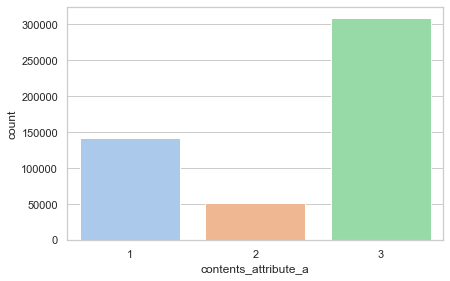

In [71]:
print("contents_attribute_a: ")
print(job_data['contents_attribute_a'].value_counts())

x = 'contents_attribute_a'
y = 'target'

sns.countplot('contents_attribute_a', data =job_data, palette='pastel')

In [72]:
value = job_data['contents_attribute_a'].value_counts()
value_percent = job_data['contents_attribute_a'].value_counts() / len(job_data) * 100
value_table = pd.concat([value, value_percent], axis=1)
value_table.columns = ['Num Of Values', '% of Total Values']
value_table

Num Of Values  % of Total Values
3         308855          61.530906
1         141895          28.268696
2          51201          10.200398

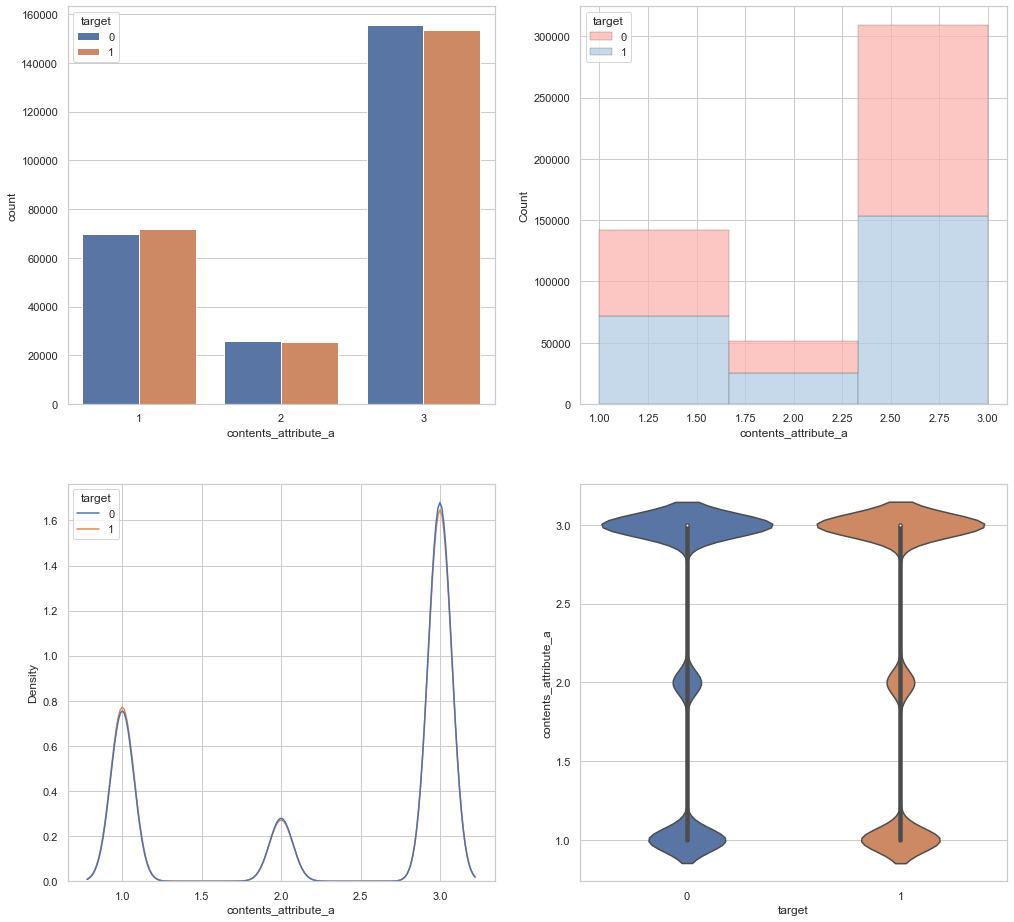

In [73]:
f, ax = plt.subplots(2,2, figsize=(15,15))

sns.countplot(x, hue = y, data =job_data, ax=ax[0][0])
sns.histplot(job_data,
            x = x,
            hue=y,
            multiple="stack", 
            palette="Pastel1",
            edgecolor=".10",
            linewidth=".20",
            bins = 3,
            ax = ax[0][1])
sns.kdeplot(data=job_data, x=x, hue=y, ax=ax[1][0])
sns.violinplot(data=job_data, x=y, y=x, ax=ax[1][1])
plt.show()

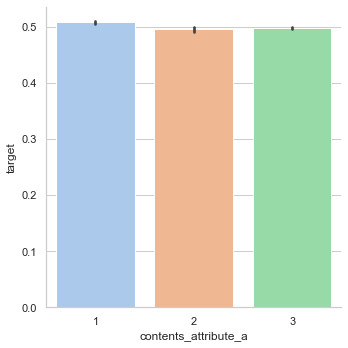

In [74]:
sns.catplot(x=x, y=y, kind="bar", data=job_data, palette='pastel')

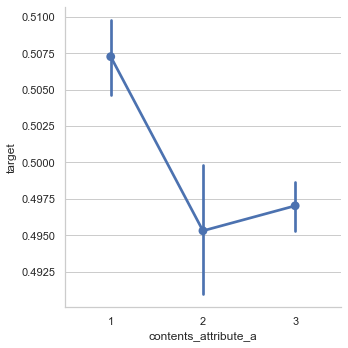

In [75]:
sns.catplot(x=x, y=y, kind="point", data=job_data)

* ```contents_attribute_a = 1```일 때를 제외하고는 target 값일 확률이 50% 미만임

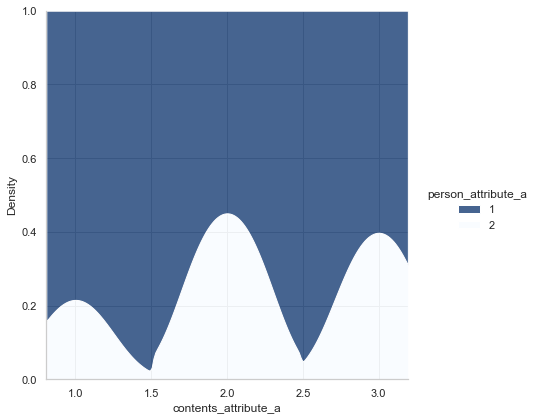

In [76]:
sns.displot(
    data=job_data,
    x=x, hue="person_attribute_a",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="Blues_r",
)

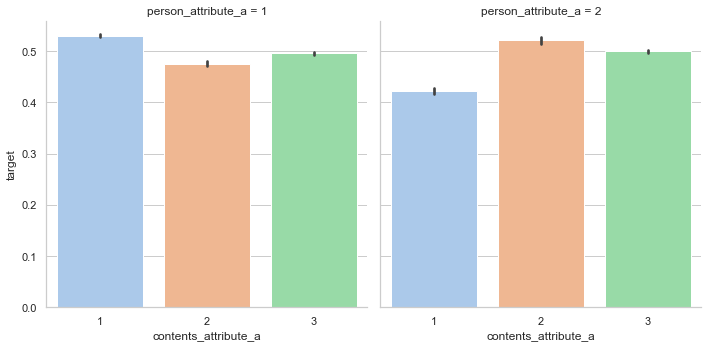

In [77]:
sns.catplot(x=x, y=y, kind="bar",col = "person_attribute_a", data=job_data, palette='pastel')

* ```person_attribute_a``` 값에 따라서 target 확률이 달라지는 것이 보임
* ```person_attribute_a = 1```일 때 ```contents_attribute_a = 1```의 확률이 가장 큼
* ```person_attribute_a = 2```일 때 ```contents_attribute_a = 2```의 확률이 가장 큼
* ```contents_attribute_a = 3```은 둘다 비슷한 값을 보임

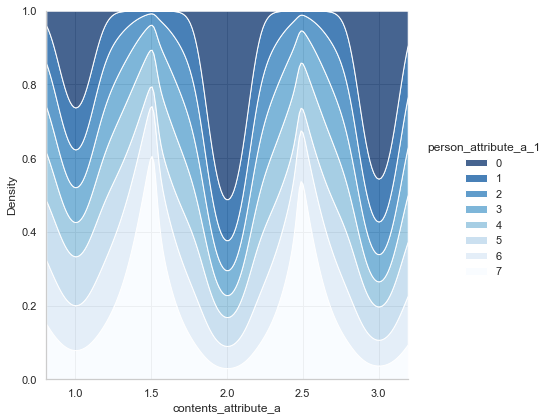

In [78]:
sns.displot(
    data=job_data,
    x=x, hue="person_attribute_a_1",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="Blues_r",
)

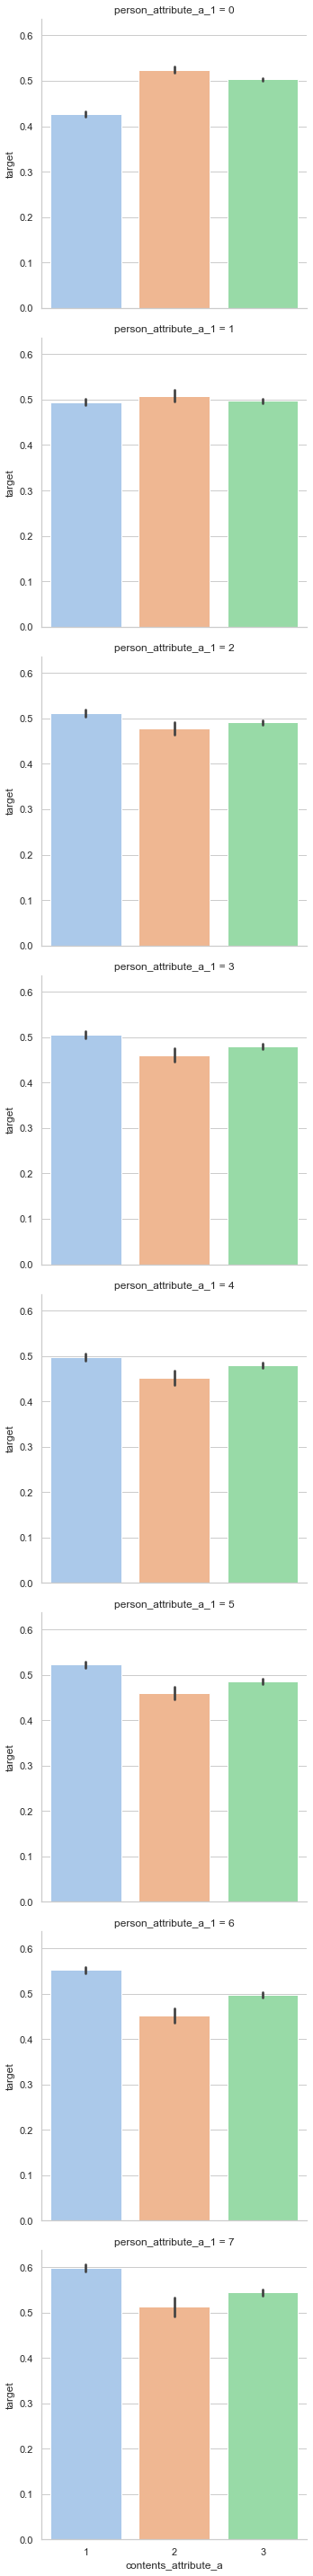

In [79]:
sns.catplot(x=x, y=y, kind="bar",row = "person_attribute_a_1", data=job_data, palette='pastel')

* ```person_attribute_a_1 = 7```일 때 처음으로 모든 값에서 target 확률이 50%를 넘음

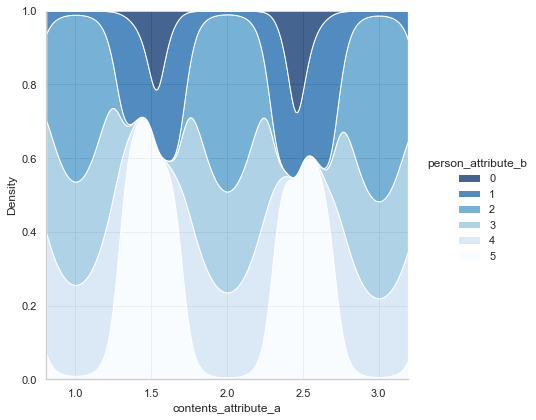

In [80]:
sns.displot(
    data=job_data,
    x=x, hue="person_attribute_b",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="Blues_r",
)

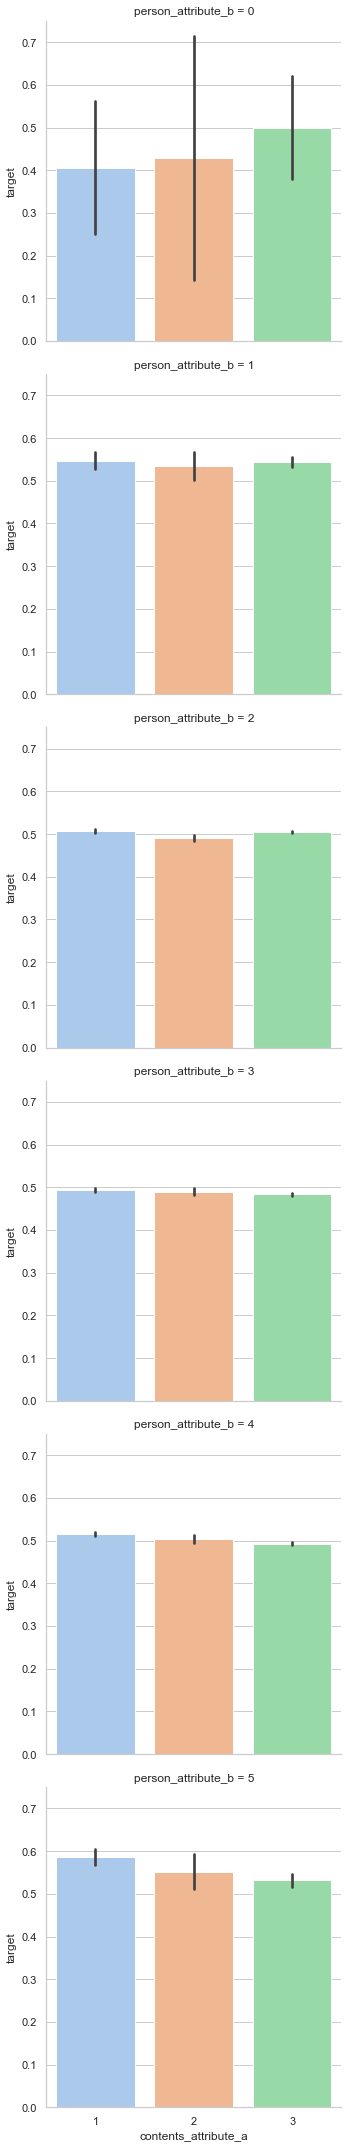

In [81]:
sns.catplot(x=x, y=y, kind="bar",row = "person_attribute_b", data=job_data, palette='pastel')

* ```person_attribute_b = 1 | person_attribute_b = 5```일 때 모든 값에서 확률 값이 50%를 넘는 것을 볼 수 있음

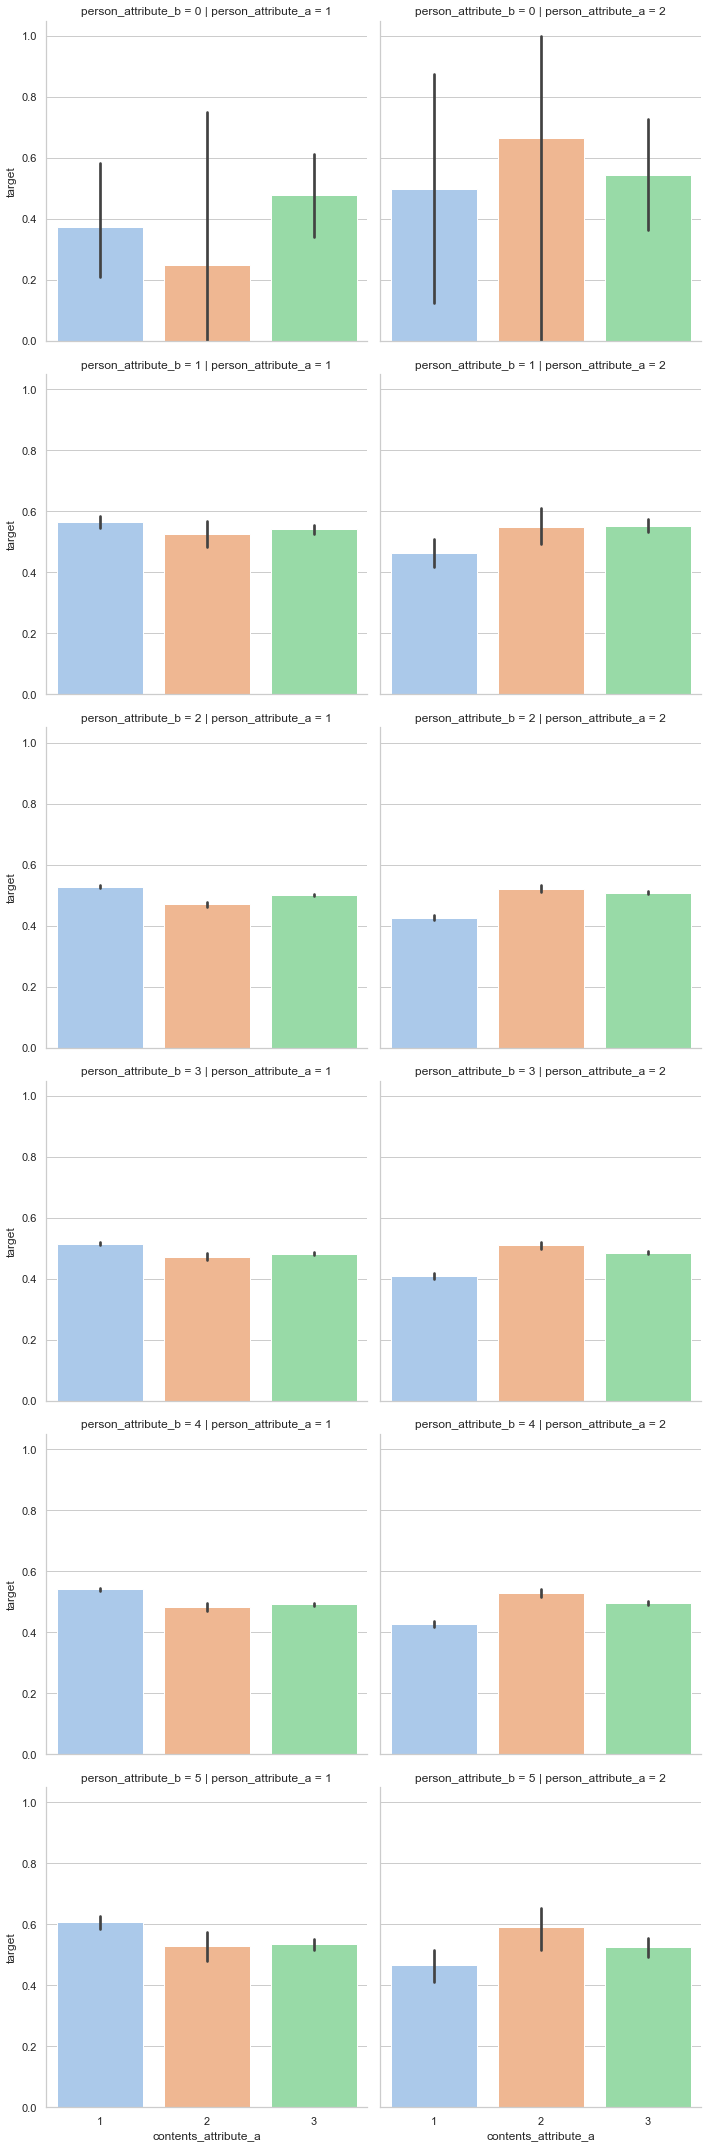

In [82]:
sns.catplot(x=x, y=y, kind="bar",col = "person_attribute_a",row = "person_attribute_b", data=job_data, palette='pastel', legend = True)

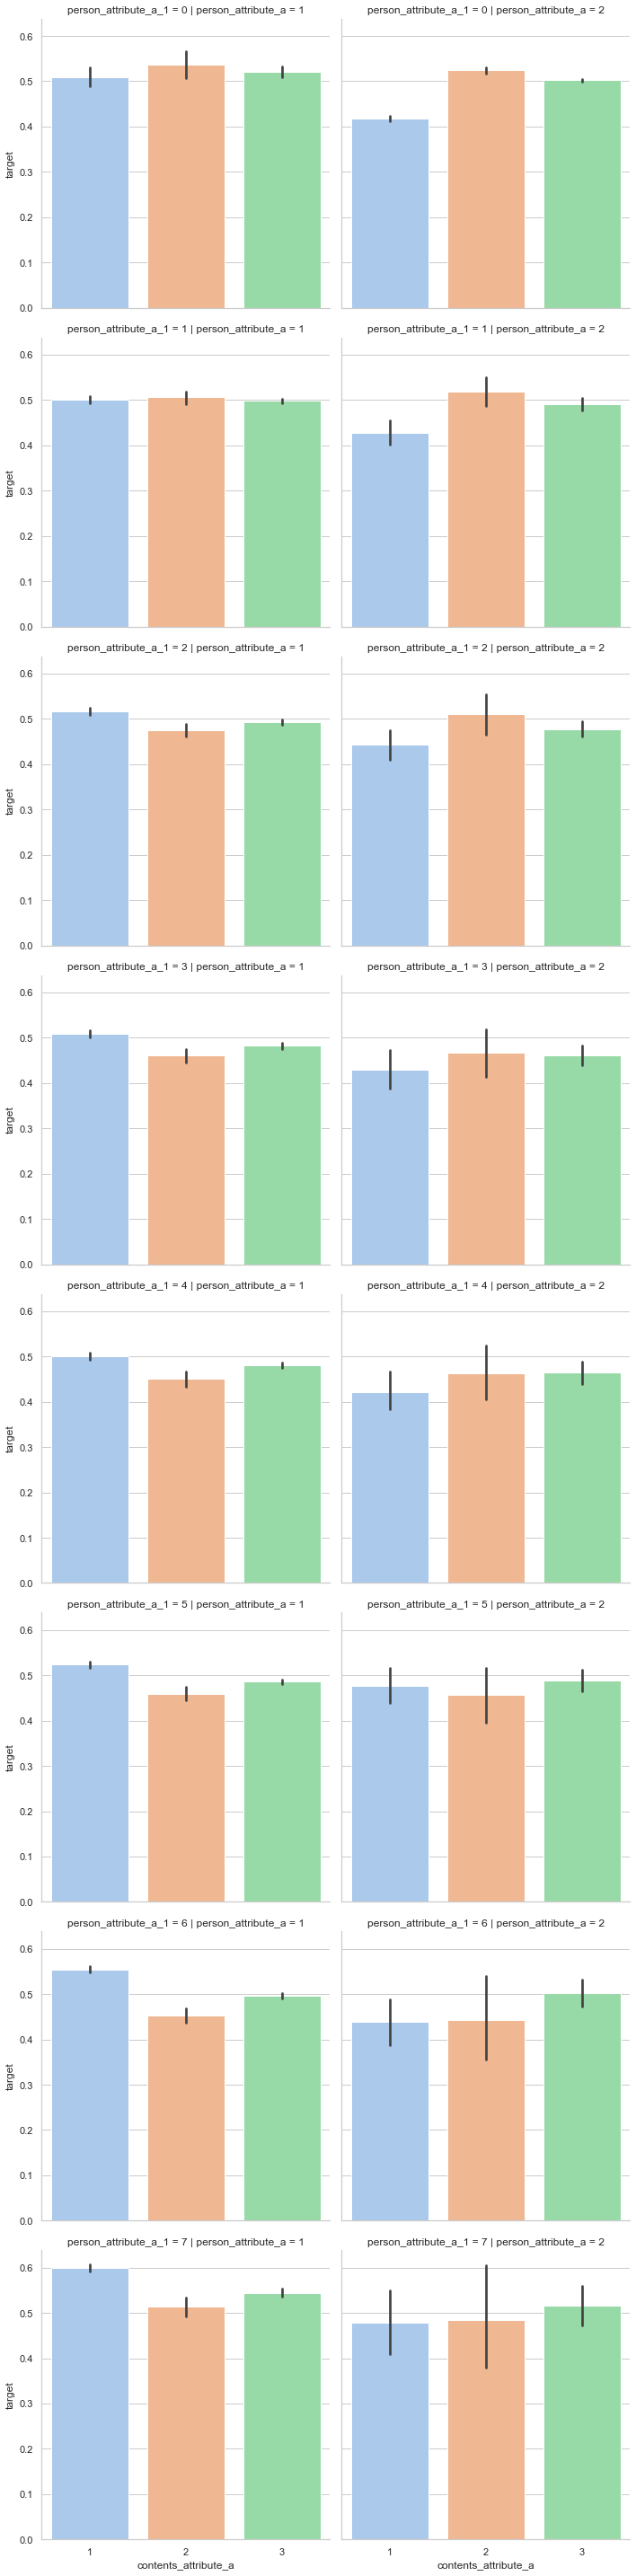

In [83]:
sns.catplot(x=x, y=y, kind="bar",col = "person_attribute_a",row = "person_attribute_a_1", data=job_data, palette='pastel', legend = True)

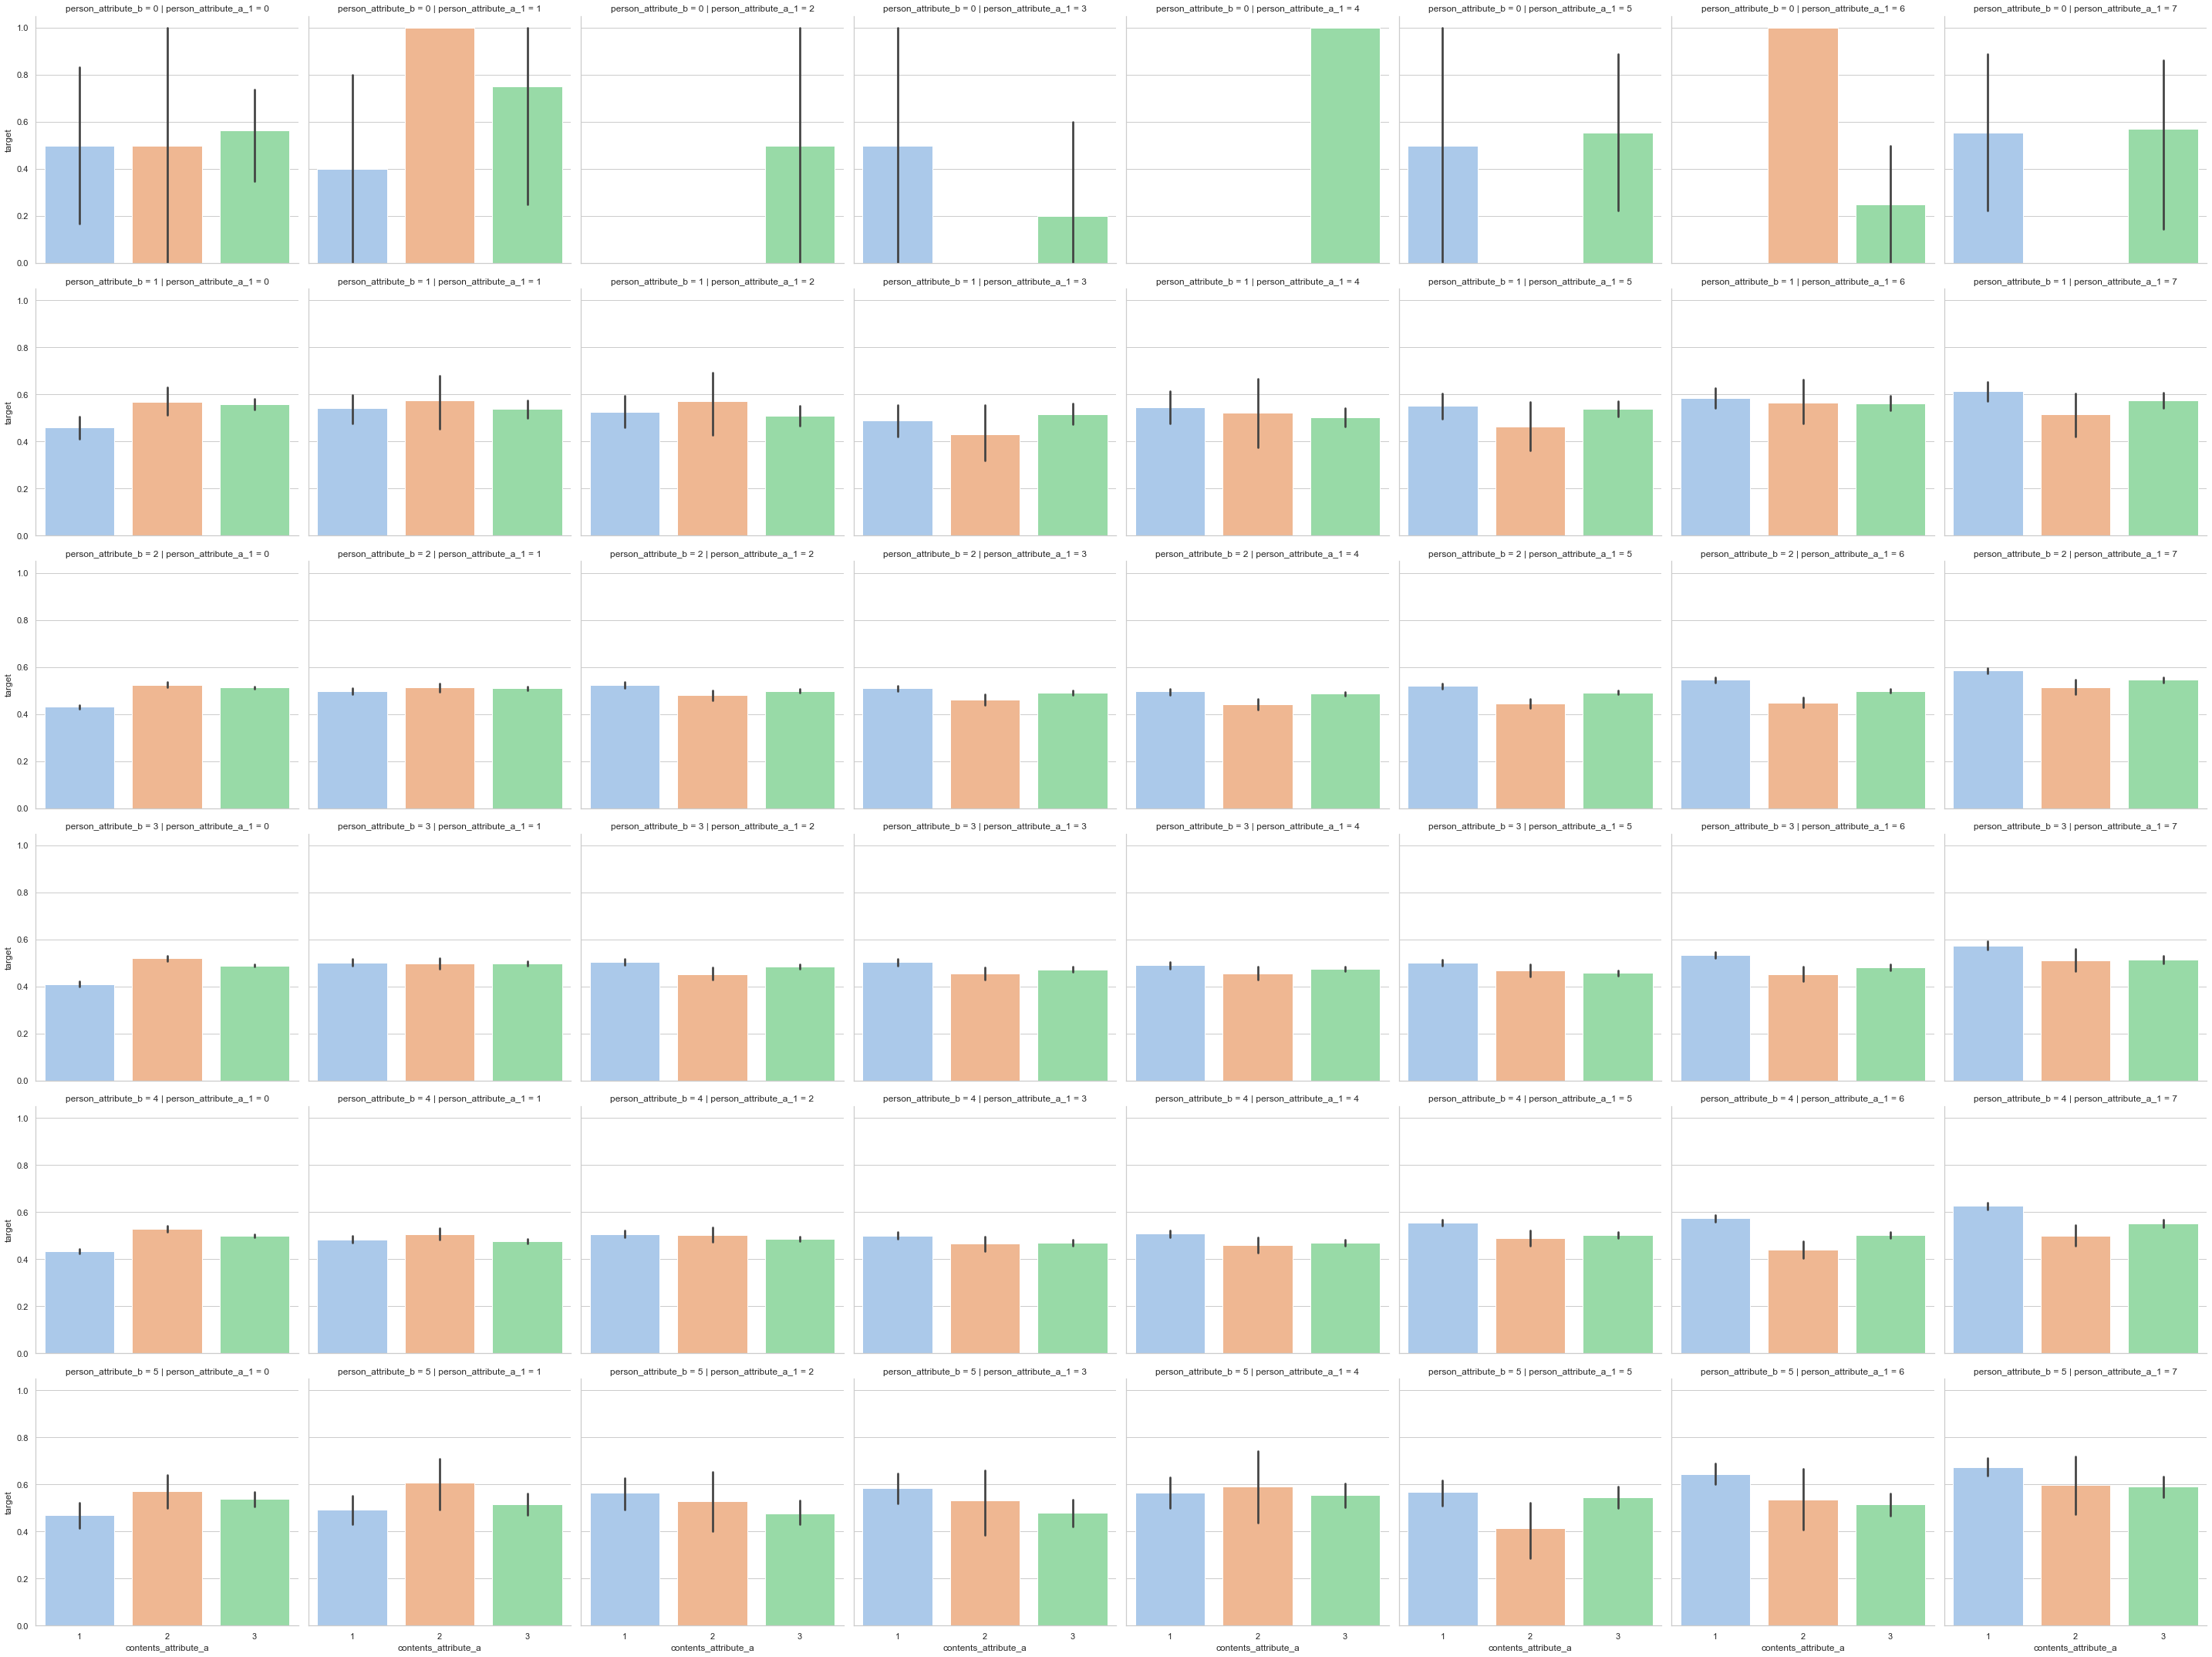

In [84]:
sns.catplot(x=x, y=y, kind="bar",col = "person_attribute_a_1",row = "person_attribute_b", data=job_data, palette='pastel', legend = True)

### contents_attribute_j
* ```컨텐츠 속성 j``` 특징 값
* Categorical Features

contents_attribute_j: 
1    382584
2    119367
Name: contents_attribute_j, dtype: int64


<AxesSubplot:xlabel='contents_attribute_j', ylabel='count'>

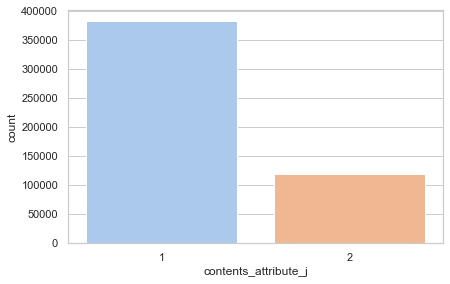

In [85]:
# contents_attribute_j
print("contents_attribute_j: ")
print(job_data['contents_attribute_j'].value_counts())

x = 'contents_attribute_j'
y = 'target'

sns.countplot('contents_attribute_j', data =job_data, palette='pastel')

* contents_attribute_j의 값에서는 1의 분포가 더욱 큰 것을 볼 수 있음

In [86]:
value = job_data['contents_attribute_j'].value_counts()
value_percent = job_data['contents_attribute_j'].value_counts() / len(job_data) * 100
value_table = pd.concat([value, value_percent], axis=1)
value_table.columns = ['Num Of Values', '% of Total Values']
value_table

Num Of Values  % of Total Values
1         382584          76.219392
2         119367          23.780608

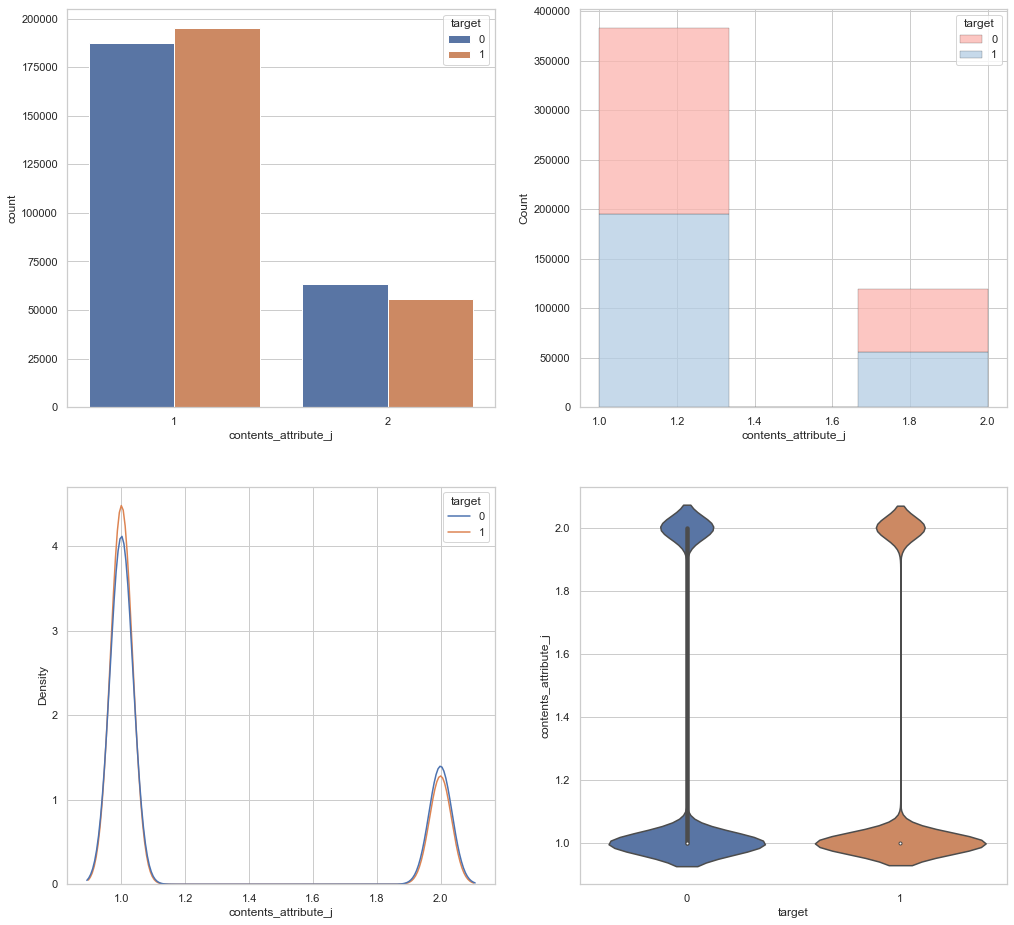

In [87]:
f, ax = plt.subplots(2,2, figsize=(15,15))

sns.countplot(x, hue = y, data =job_data, ax=ax[0][0])
sns.histplot(job_data,
            x = x,
            hue=y,
            multiple="stack", 
            palette="Pastel1",
            edgecolor=".10",
            linewidth=".20",
            bins = 3,
            ax = ax[0][1])
sns.kdeplot(data=job_data, x=x, hue=y, ax=ax[1][0])
sns.violinplot(data=job_data, x=y, y=x, ax=ax[1][1])
plt.show()

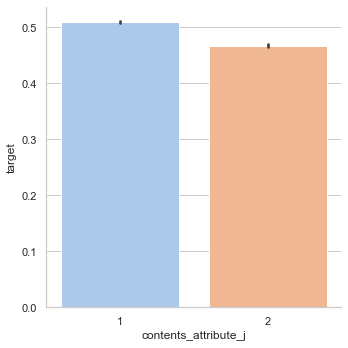

In [88]:
sns.catplot(x=x, y=y, kind="bar", data=job_data, palette='pastel')

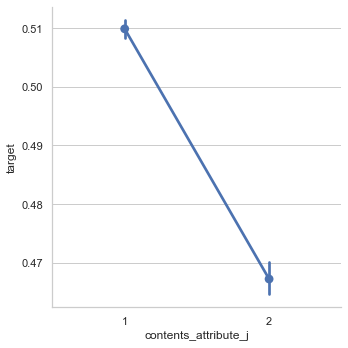

In [89]:
sns.catplot(x=x, y=y, kind="point", data=job_data)

* ```contents_attribute_j = 1```인 경우에 target일 확률이 더욱 높음

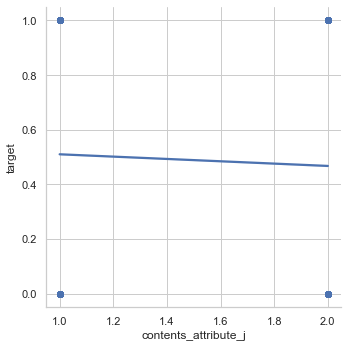

In [90]:
sns.lmplot(x = x, y = y, data = job_data)

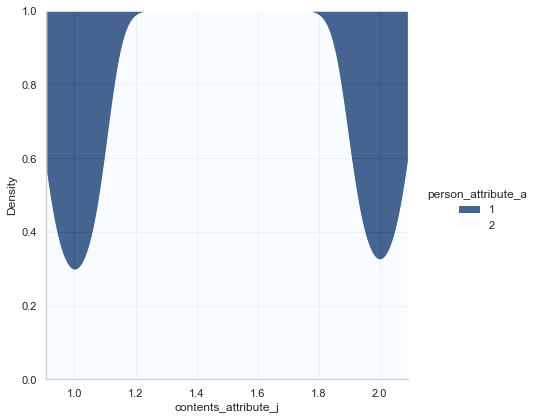

In [91]:
sns.displot(
    data=job_data,
    x=x, hue="person_attribute_a",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="Blues_r",
)

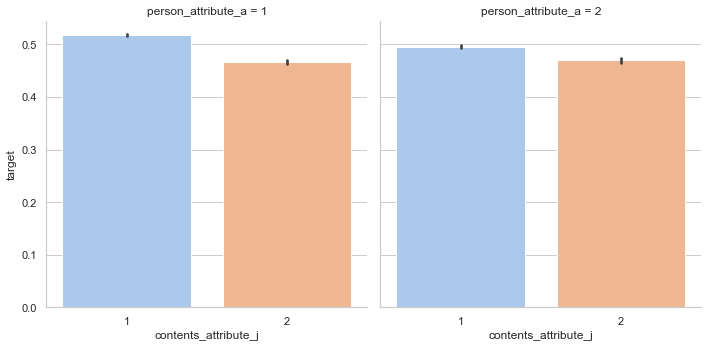

In [92]:
sns.catplot(x=x, y=y, kind="bar",col = "person_attribute_a", data=job_data, palette='pastel')

* ```contents_attribute_j = 1 & person_attribute_a = 1```인 경우를 제외하고는 50%를 넘는 것이 없음

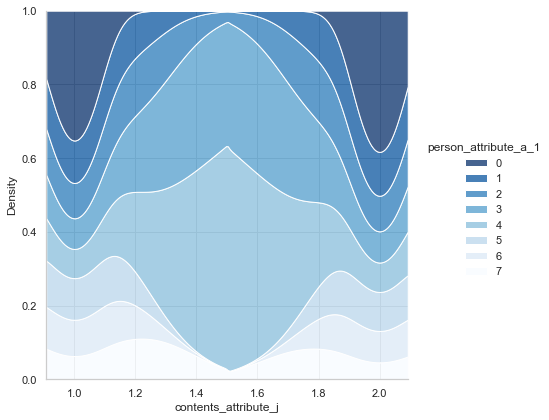

In [93]:
sns.displot(
    data=job_data,
    x=x, hue="person_attribute_a_1",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="Blues_r",
)

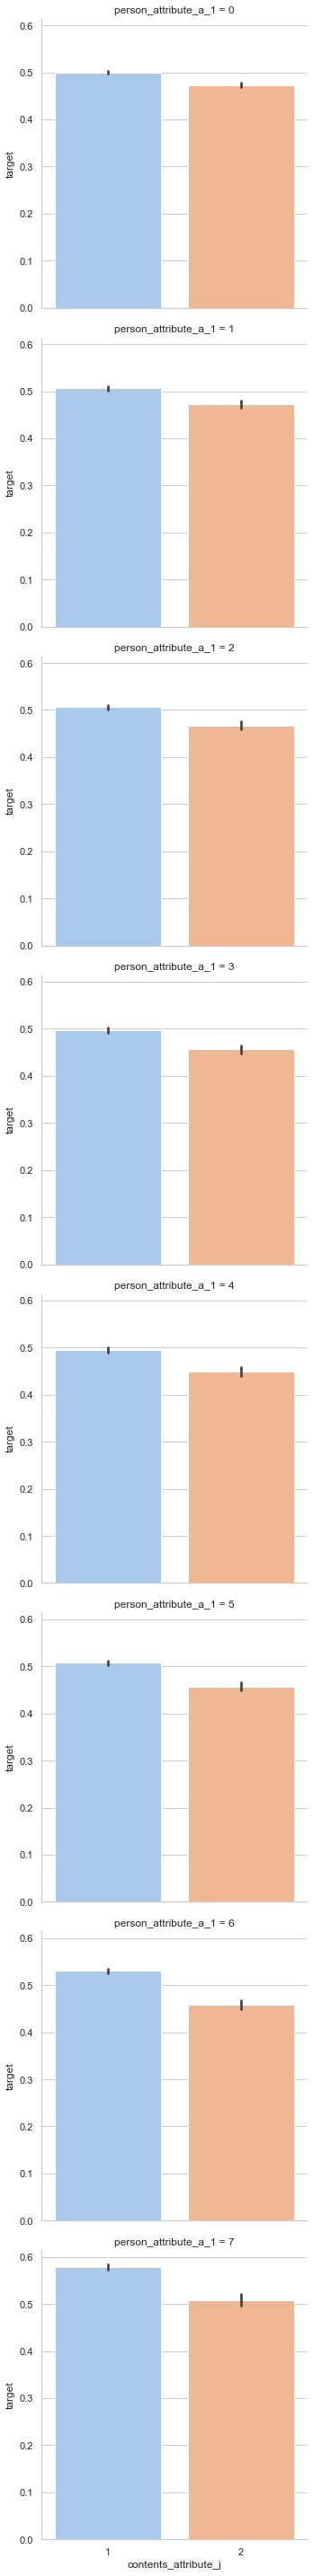

In [94]:
sns.catplot(x=x, y=y, kind="bar",row = "person_attribute_a_1", data=job_data, palette='pastel')

* ```person_attribute_a_1 = 7```인 경우에서 처음으로 두 값의 확률이 50%를 넘음
* ```person_attribute_a_1 = 7```인 경우 전체적으로 모든 경우에서 target 값이 50%를 넘는 것을 앞의 과정에서 보암ㅆ음

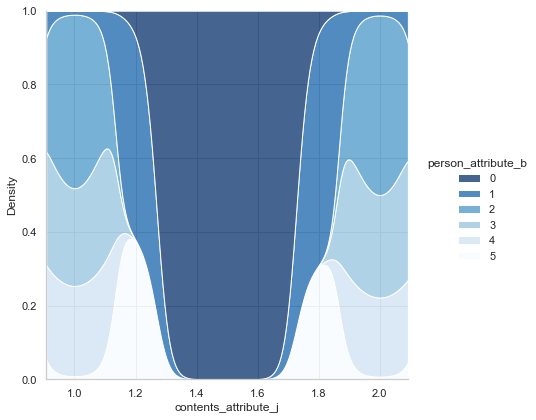

In [95]:
sns.displot(
    data=job_data,
    x=x, hue="person_attribute_b",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="Blues_r",
)

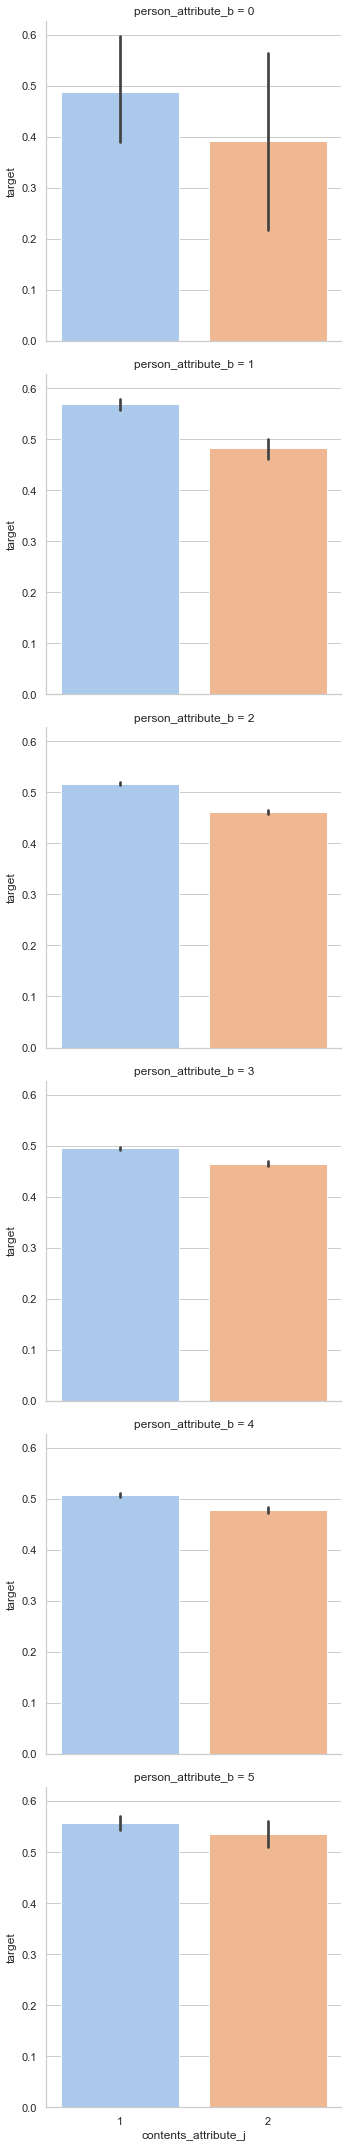

In [96]:
sns.catplot(x=x, y=y, kind="bar",row = "person_attribute_b", data=job_data, palette='pastel')

* ```person_attribute_b = 5```인 경우에 두 개의 값에서 모두 50%를 넘는 것을 보임

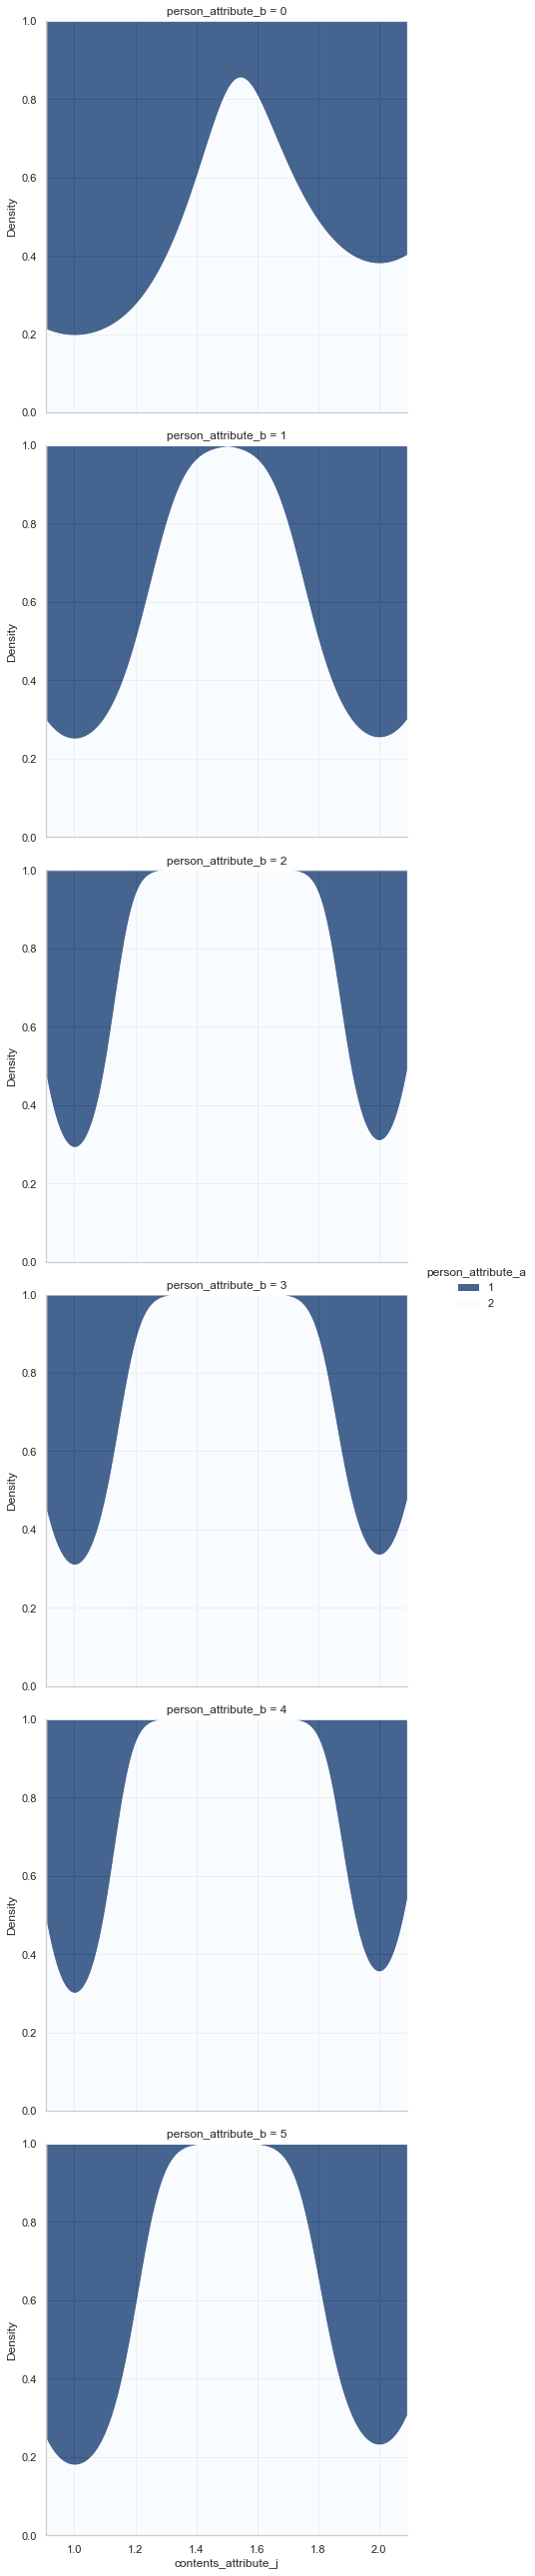

In [97]:
sns.displot(
    data=job_data,
    x=x, hue="person_attribute_a",
    row = "person_attribute_b",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="Blues_r",
)

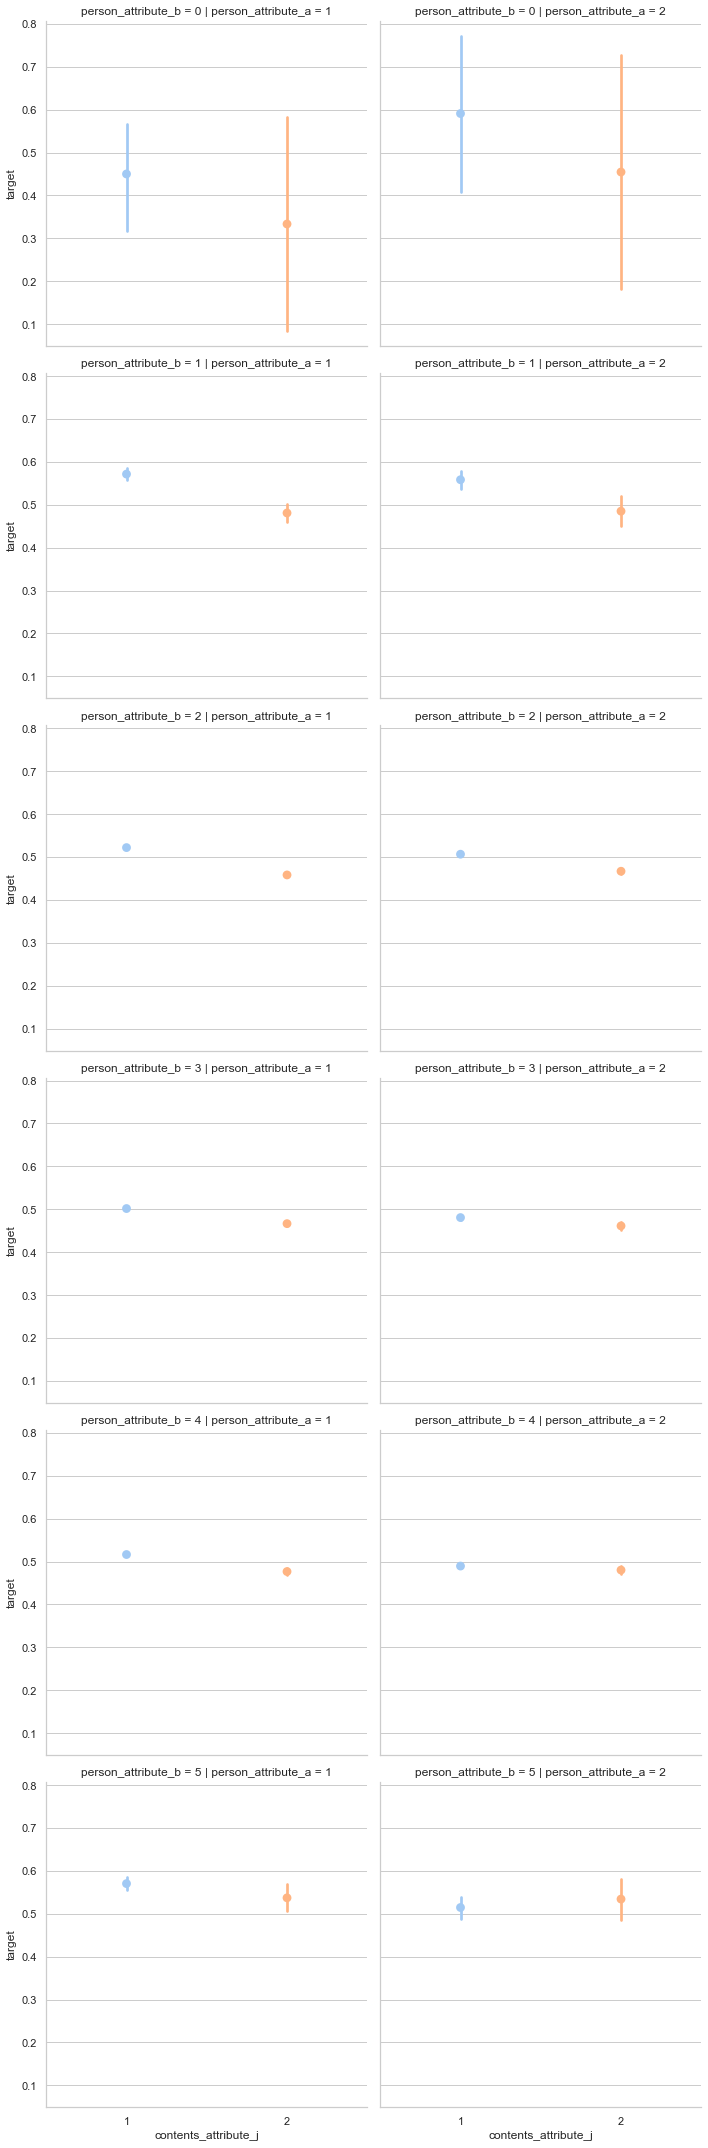

In [98]:
sns.catplot(x=x, y=y, kind="point",col = "person_attribute_a",row = "person_attribute_b", data=job_data, palette='pastel', legend = True)

* ```person_attribute_b = 5 & person_attribute_a = 1``` 
* ```person_attribute_b = 5 & person_attribute_a = 2```
* 경우에서 두 개의 값 모두가 50%를 넘음
* ```contents_attribute_j = 1```일 때 전체적을로 target 값일 확률이 높음

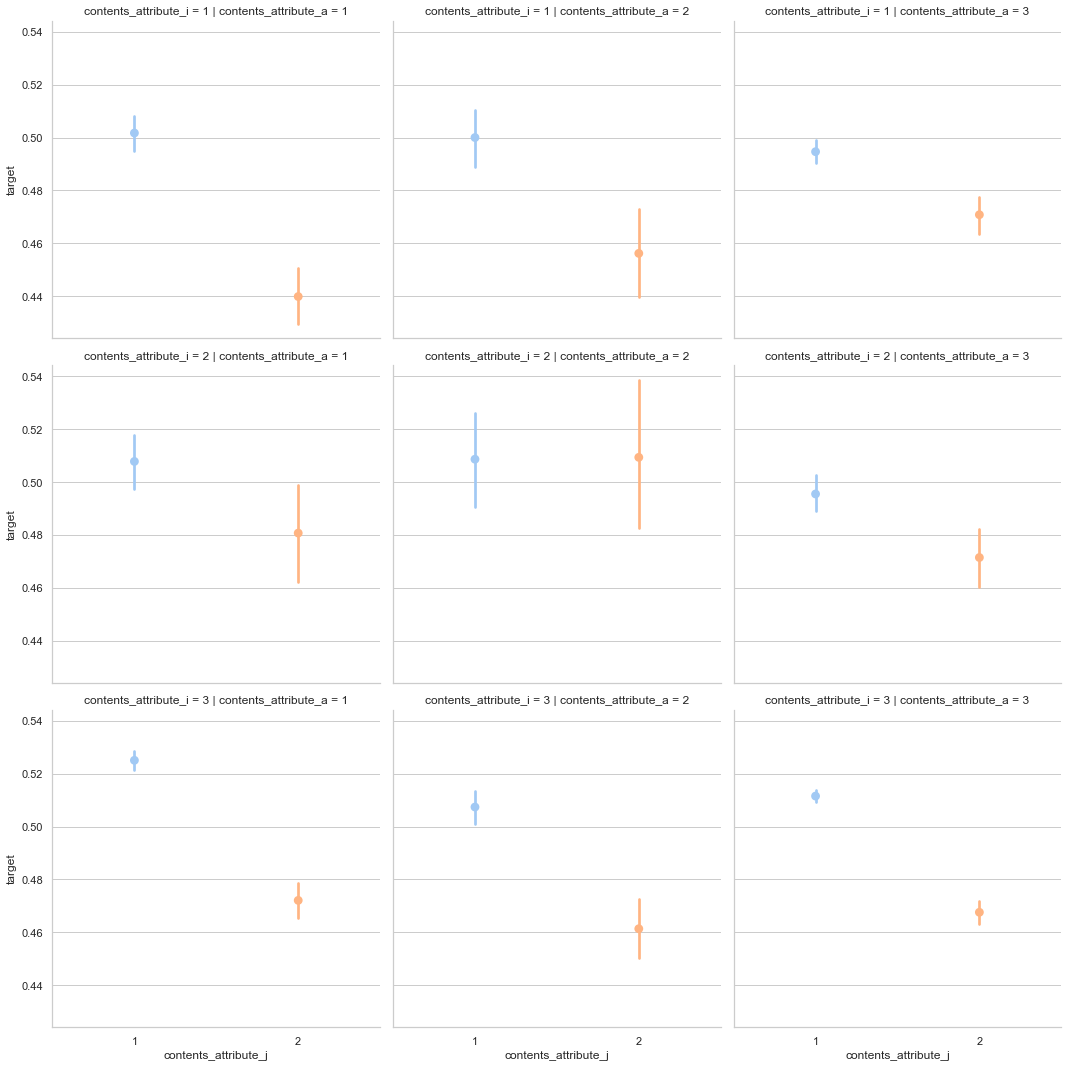

In [99]:
sns.catplot(x=x, y=y, kind="point",col = "contents_attribute_a",row = "contents_attribute_i", data=job_data, palette='pastel', legend = True)

### contents_attribute_j_1
* ```컨텐츠 J하위 속성``` 특징 값
* Categorical Features

contents_attribute_j_1: 
5     330790
10     89307
3      30664
4      19649
9      19115
6      10808
2       1416
8        137
1         65
Name: contents_attribute_j_1, dtype: int64


<AxesSubplot:xlabel='contents_attribute_j_1', ylabel='count'>

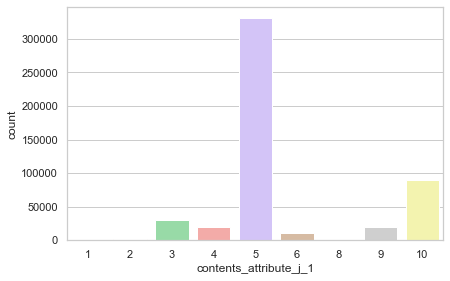

In [100]:
# contents_attribute_i
print("contents_attribute_j_1: ")
print(job_data['contents_attribute_j_1'].value_counts())

x = 'contents_attribute_j_1'
y = 'target'

sns.countplot('contents_attribute_j_1', data =job_data, palette='pastel')

* 대부분의 값이 5인 것을 볼 수 있음

In [101]:
value = job_data['contents_attribute_j_1'].value_counts()
value_percent = job_data['contents_attribute_j_1'].value_counts() / len(job_data) * 100
value_table = pd.concat([value, value_percent], axis=1)
value_table.columns = ['Num Of Values', '% of Total Values']
value_table

Num Of Values  % of Total Values
5          330790          65.900855
10          89307          17.791976
3           30664           6.108963
4           19649           3.914526
9           19115           3.808141
6           10808           2.153198
2            1416           0.282099
8             137           0.027294
1              65           0.012949

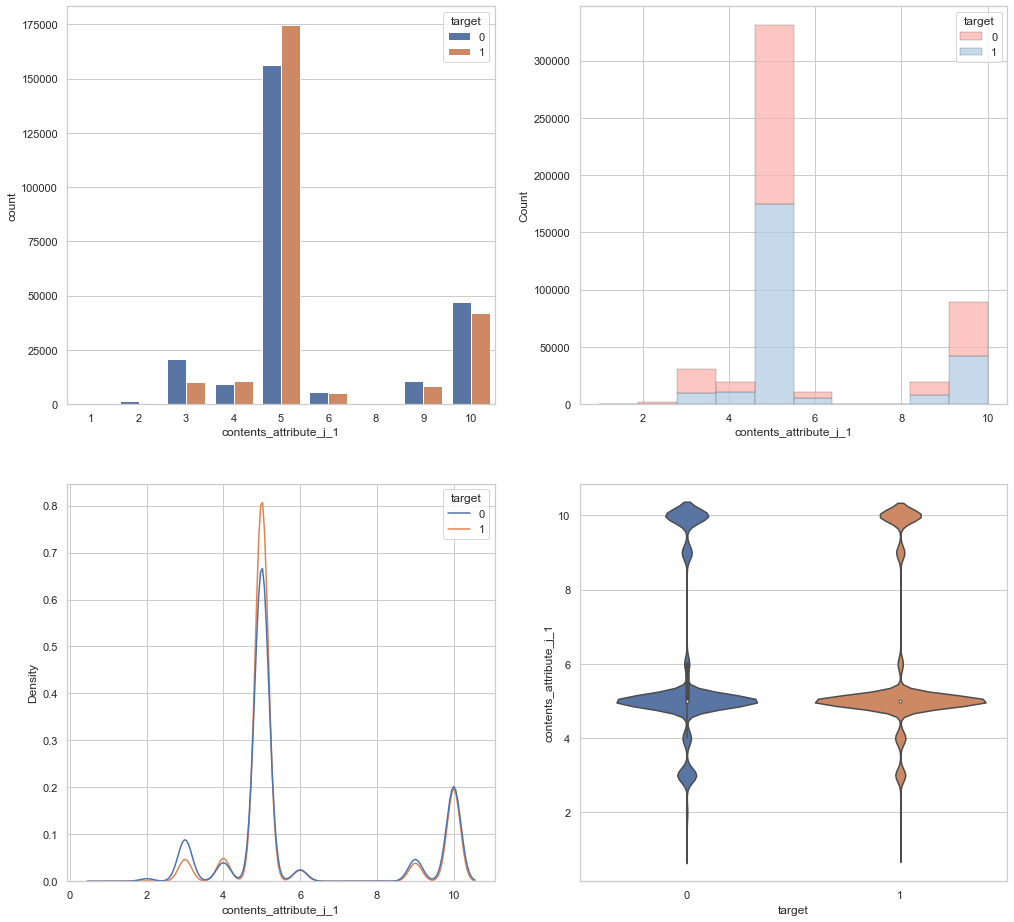

In [102]:
f, ax = plt.subplots(2,2, figsize=(15,15))

sns.countplot(x, hue = y, data =job_data, ax=ax[0][0])
sns.histplot(job_data,
            x = x,
            hue=y,
            multiple="stack", 
            palette="Pastel1",
            edgecolor=".10",
            linewidth=".20",
            bins = 10,
            ax = ax[0][1])
sns.kdeplot(data=job_data, x=x, hue=y, ax=ax[1][0])
sns.violinplot(data=job_data, x=y, y=x, ax=ax[1][1])
plt.show()

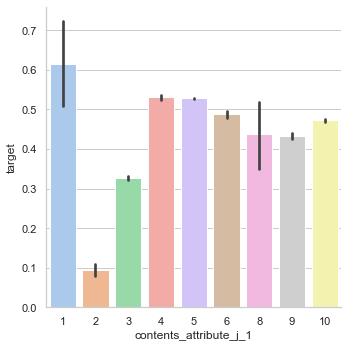

In [103]:
sns.catplot(x=x, y=y, kind="bar", data=job_data, palette='pastel')

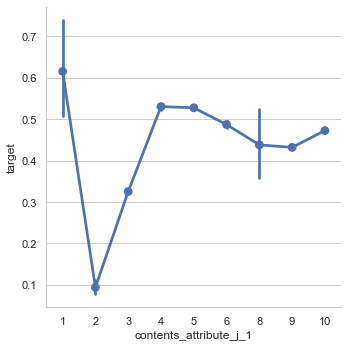

In [104]:
sns.catplot(x=x, y=y, kind="point", data=job_data)

* ```contents_attribute_j_1 = 1```이 전체 값 중에서 0.012949% 밖에 되지 않지만 target 값일 확률이 가장 높음
* ```contents_attribute_j_1 = 2```인 경우에는 target 값일 확률이 매우 낮음
* ```contents_attribute_j_1 = 3```인 경우에도 target 값일 확률이 낮음

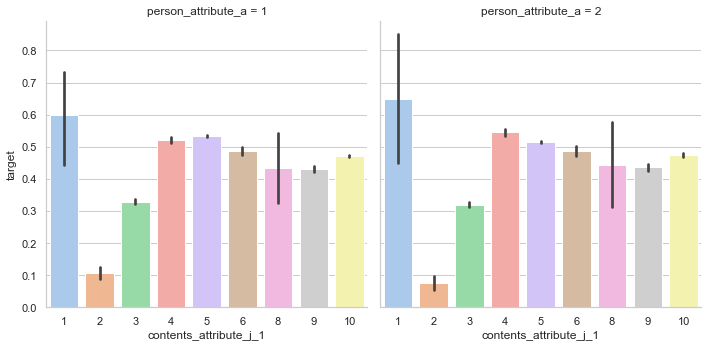

In [105]:
sns.catplot(x=x, y=y, kind="bar",col = "person_attribute_a", data=job_data, palette='pastel')

* ```person_attribute_a```의 값에 상관 없이 ```contents_attribute_j_1 = 1```일 때 둘 다 60%를 넘는 것을 볼 수 있음
* ```person_attribute_a```의 값에 상관 없이 ```contents_attribute_j_1 = 2```일 때  매우 낮은 확률 값을 갖고 있다

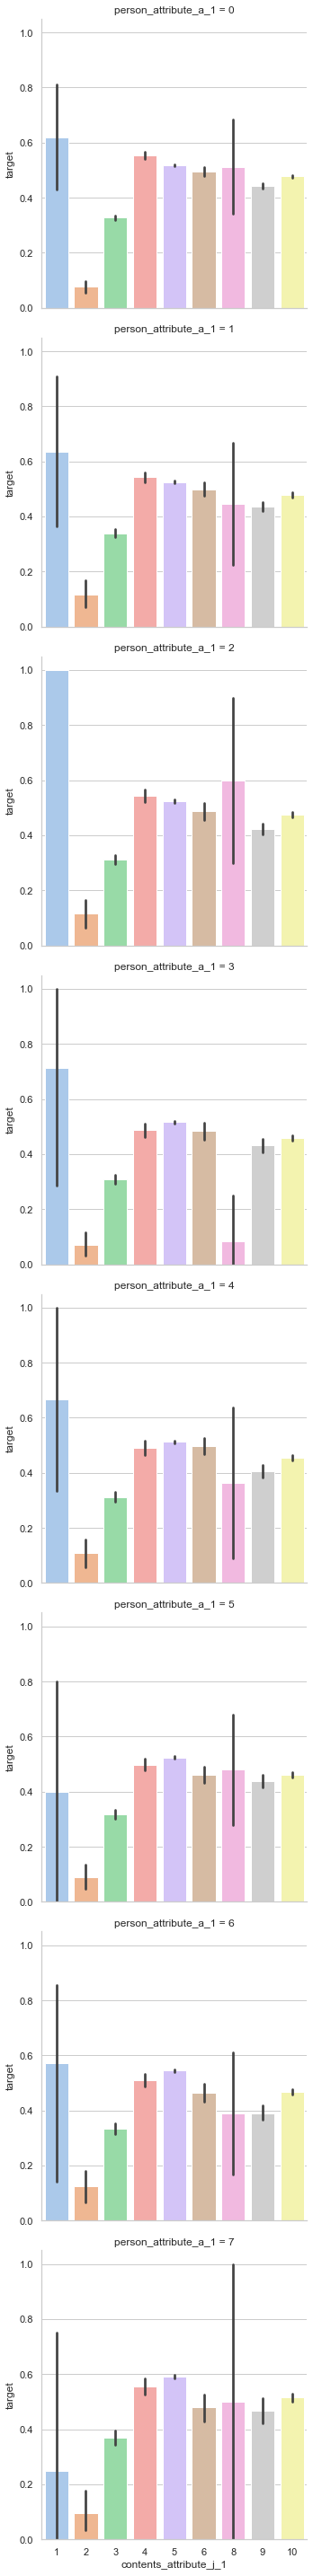

In [106]:
sns.catplot(x=x, y=y, kind="bar",row = "person_attribute_a_1", data=job_data, palette='pastel')

* ```person_attribute_a_1 = 1 & contents_attribute_j_1 = 1```일 때 target 확률이 100%에 수렴함
* ```person_attribute_a_1 = 5 | person_attribute_a_1 = 7```일 때  ```contents_attribute_j_1```의 확률 값이 급격하게 떨어짐
* ```person_attribute_a_1```의 값에 상관 없이 ```person_attribute_a_1 = 2```의 값은 항상 낮은 확률 값을 갖는다.

In [107]:
job_data.loc[(job_data['person_attribute_a_1'] == 1) & (job_data['contents_attribute_j_1'] == 1)]

id  d_l_match_yn  d_m_match_yn  d_s_match_yn  h_l_match_yn  \
41831    41831          True          True          True          True   
81611    81611          True          True          True          True   
122237  122237          True          True          True          True   
125612  125612          True          True         False         False   
167352  167352          True         False         False          True   
167901  167901          True          True         False          True   
184570  184570          True         False         False          True   
273083  273083         False         False         False          True   
274579  274579          True         False         False          True   
359283  359283          True         False         False          True   
453671  453671          True         False         False         False   

        h_m_match_yn  h_s_match_yn  person_attribute_a  person_attribute_a_1  \
41831          False         False                   1                     1   
81611          False         False                   1                     1   
122237         False         False                   1                     1   
125612         False         False                   1                     1   
167352          True          True                   1                     1   
167901         False         False                   1                     1   
184570         False         False                   1                     1   
273083         False         False                   1                     1   
274579          True          True                   1                     1   
359283         False         False                   1                     1   
453671         False         False                   1                     1   

        person_attribute_b  ...  person_prefer_h_3_u  contents_attribute_h_u  \
41831                    3  ...                   30                     277   
81611                    2  ...                   85                      30   
122237                   3  ...                   85                      30   
125612                   4  ...                   58                      94   
167352                   2  ...                   94                      94   
167901                   4  ...                   85                      30   
184570                   2  ...                   85                      30   
273083                   4  ...                   30                      30   
274579                   3  ...                  277                     277   
359283                   4  ...                   94                      94   
453671                   4  ...                   85                      94   

        contents_attribute_l_n  contents_attribute_l_s  \
41831                      529                     528   
81611                     1549                    1548   
122237                    1549                    1548   
125612                    1846                    1843   
167352                     628                     624   
167901                    1549                    1548   
184570                     267                     266   
273083                     789                     788   
274579                     529                     528   
359283                    1658                    1658   
453671                    1658                    1658   

        contents_attribute_l_m  contents_attribute_l_l     Y  M   D  target  
41831                      527                    2006  2020  6   4       1  
81611                     1538                    2015  2020  9  24       1  
122237                    1538                    2015  2020  9  25       1  
125612                    1832                    2020  2020  1  14       0  
167352                     623                    2006  2020  1  17       0  
167901                    1538      

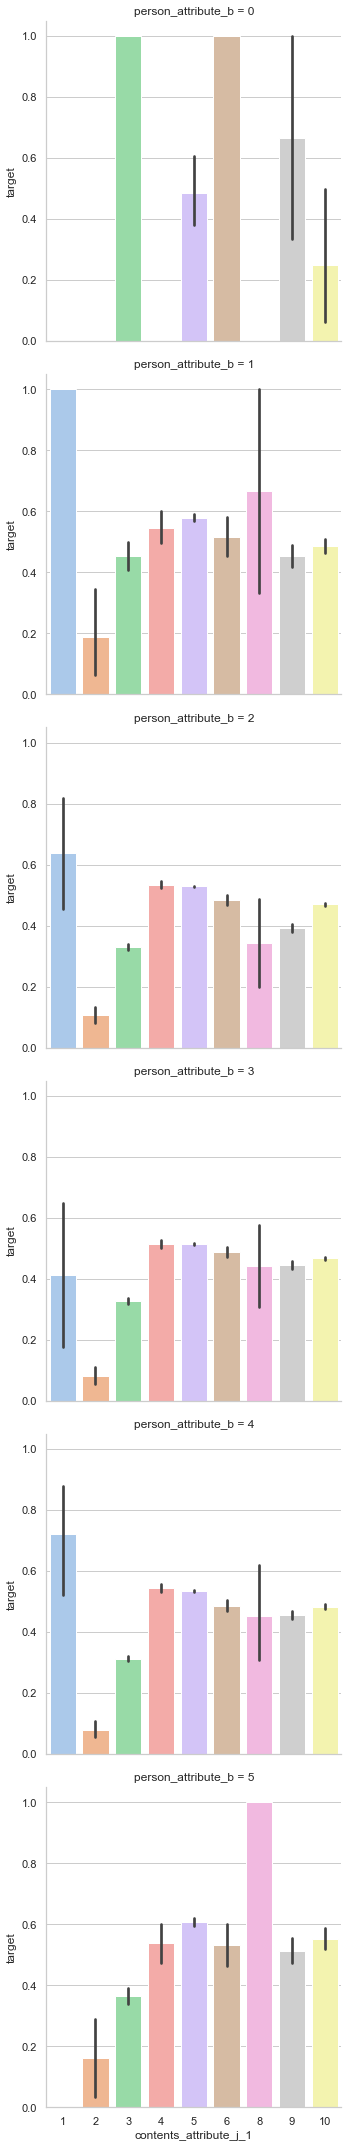

In [108]:
sns.catplot(x=x, y=y, kind="bar",row = "person_attribute_b", data=job_data, palette='pastel')

* ```person_attribute_b = 1 & contents_attribute_j_1 = 1 ```일 때 확률 값이 100%에 수렴함
* ```person_attribute_b = 5 & contents_attribute_j_1 = 8 ```일 때 확률 값이 100%에 수렴함

In [109]:
job_data.loc[(job_data['person_attribute_b'] == 1) & (job_data['contents_attribute_j_1'] == 1)]

id  d_l_match_yn  d_m_match_yn  d_s_match_yn  h_l_match_yn  \
233550  233550          True          True         False          True   

        h_m_match_yn  h_s_match_yn  person_attribute_a  person_attribute_a_1  \
233550         False         False                   1                     4   

        person_attribute_b  ...  person_prefer_h_3_u  contents_attribute_h_u  \
233550                   1  ...                   92                      78   

        contents_attribute_l_n  contents_attribute_l_s  \
233550                    1538                    1538   

        contents_attribute_l_m  contents_attribute_l_l     Y  M   D  target  
233550                    1538                    2015  2020  9  11       1  

[1 rows x 61 columns]

In [110]:
job_data.loc[(job_data['person_attribute_b'] == 5) & (job_data['contents_attribute_j_1'] == 8)]

id  d_l_match_yn  d_m_match_yn  d_s_match_yn  h_l_match_yn  \
73412    73412          True          True          True         False   
384916  384916         False         False         False          True   

        h_m_match_yn  h_s_match_yn  person_attribute_a  person_attribute_a_1  \
73412          False         False                   2                     0   
384916         False         False                   1                     6   

        person_attribute_b  ...  person_prefer_h_3_u  contents_attribute_h_u  \
73412                    5  ...                   30                      30   
384916                   5  ...                    3                     308   

        contents_attribute_l_n  contents_attribute_l_s  \
73412                     1840                    1833   
384916                    1939                    1927   

        contents_attribute_l_m  contents_attribute_l_l     Y  M   D  target  
73412                     1832                    2020  2020  8   3       1  
384916                    1918                    2022  2020  7  14       1  

[2 rows x 61 columns]

* 위의 두 경우는 전체 확률 중에서 0.000199와 0.000398 밖에 되지 않는다.
* 매우 희귀한 경우이기 때문에 이러한 특징 값을 갖는 게 무조건 적으로 target이라고 할 수 없음

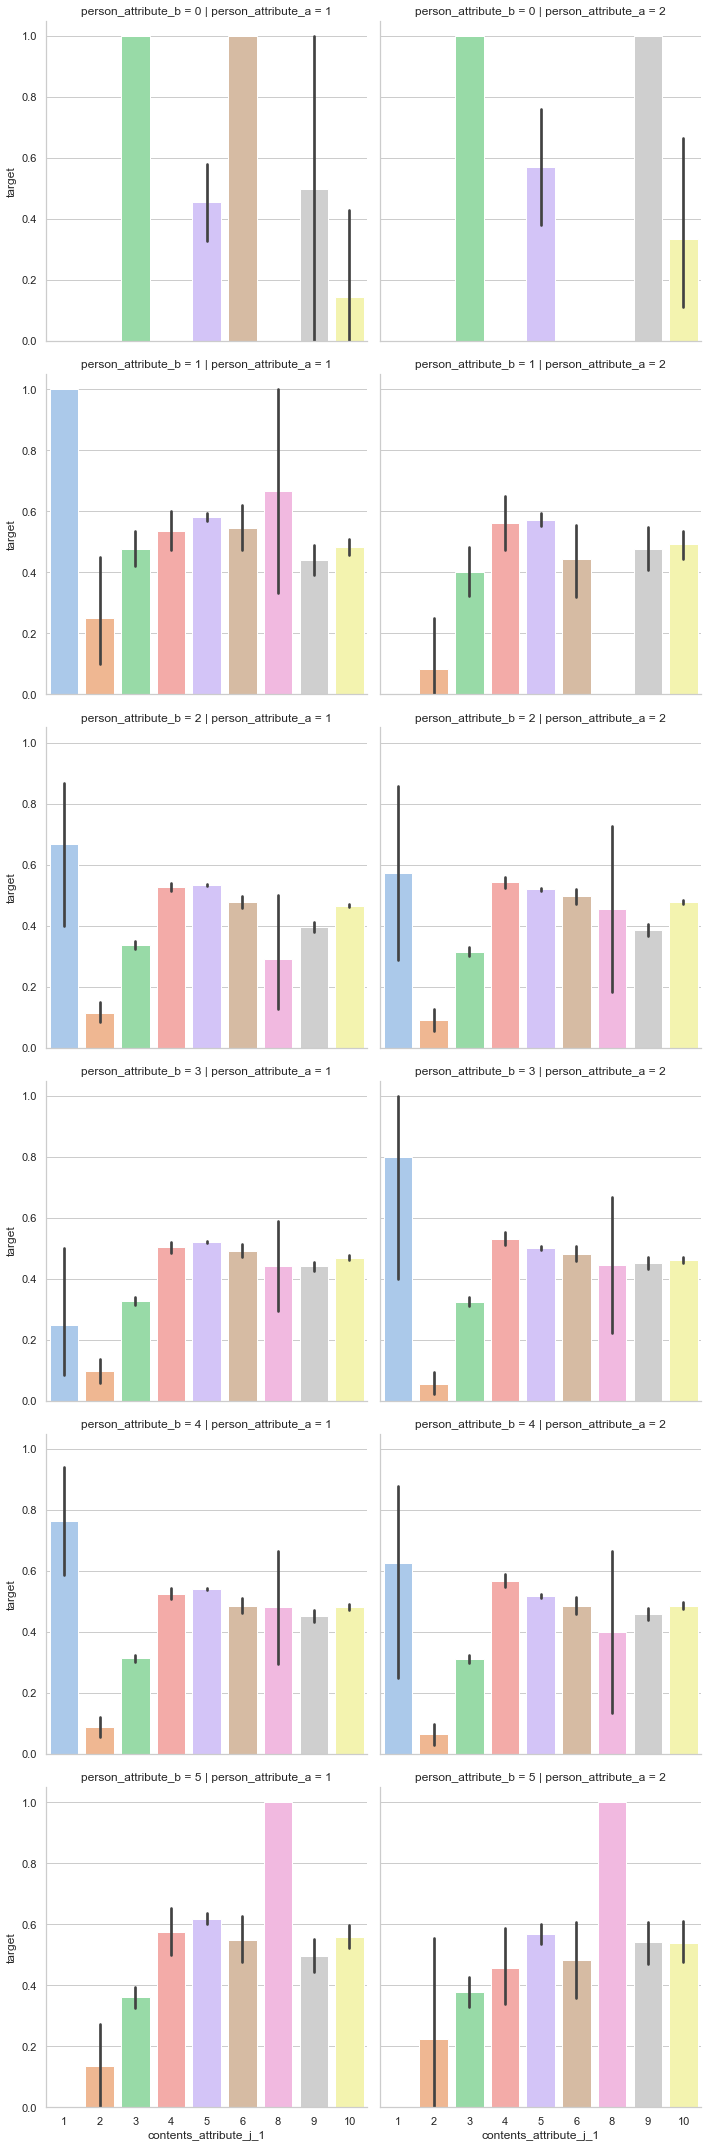

In [111]:
sns.catplot(x=x, y=y, kind="bar",col = "person_attribute_a",row = "person_attribute_b", data=job_data, palette='pastel', legend = True)

* 많은 경우에서 target 값이 100%로 수렴하는 것을 볼 수 있음

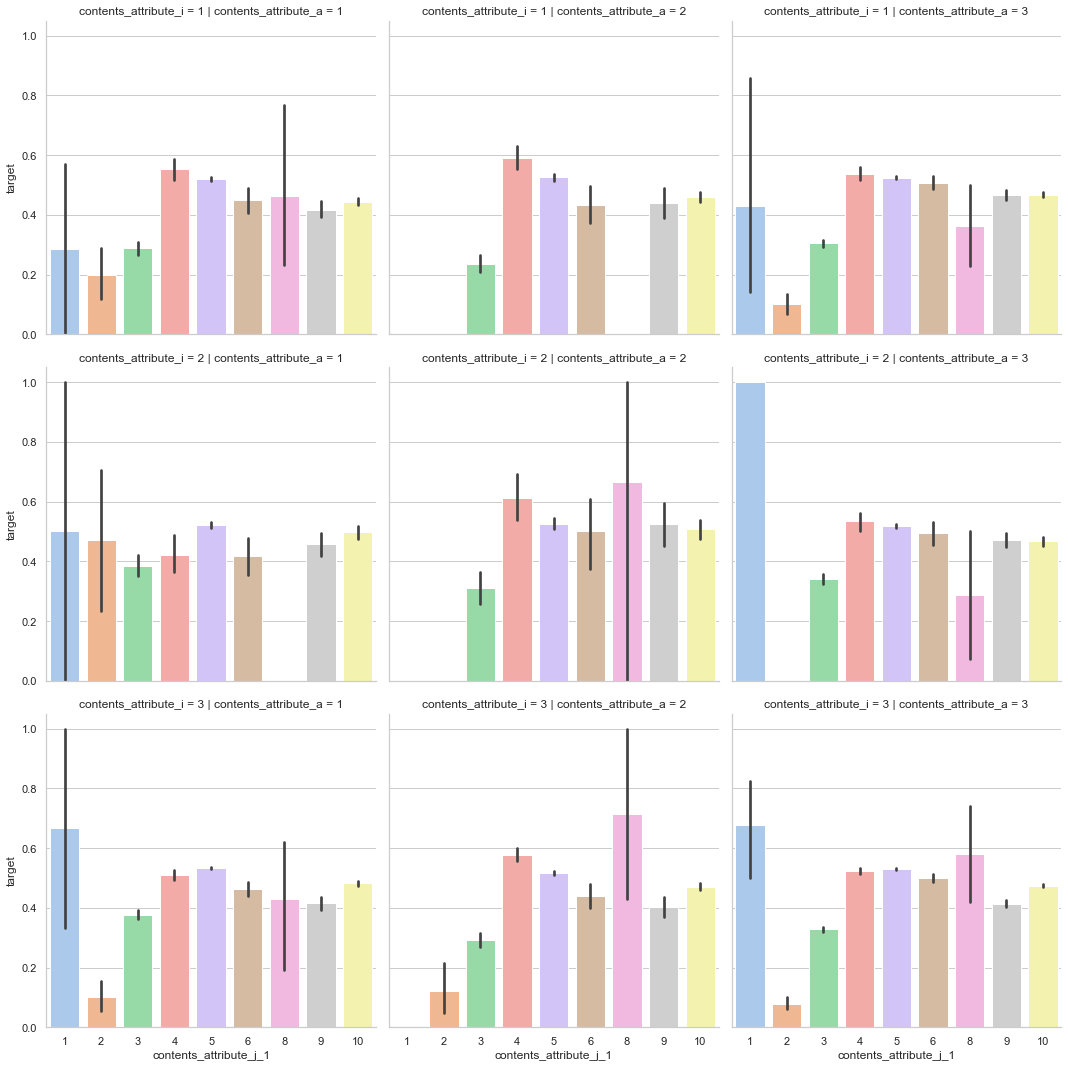

In [112]:
sns.catplot(x=x, y=y, kind="bar",col = "contents_attribute_a",row = "contents_attribute_i", data=job_data, palette='pastel', legend = True)

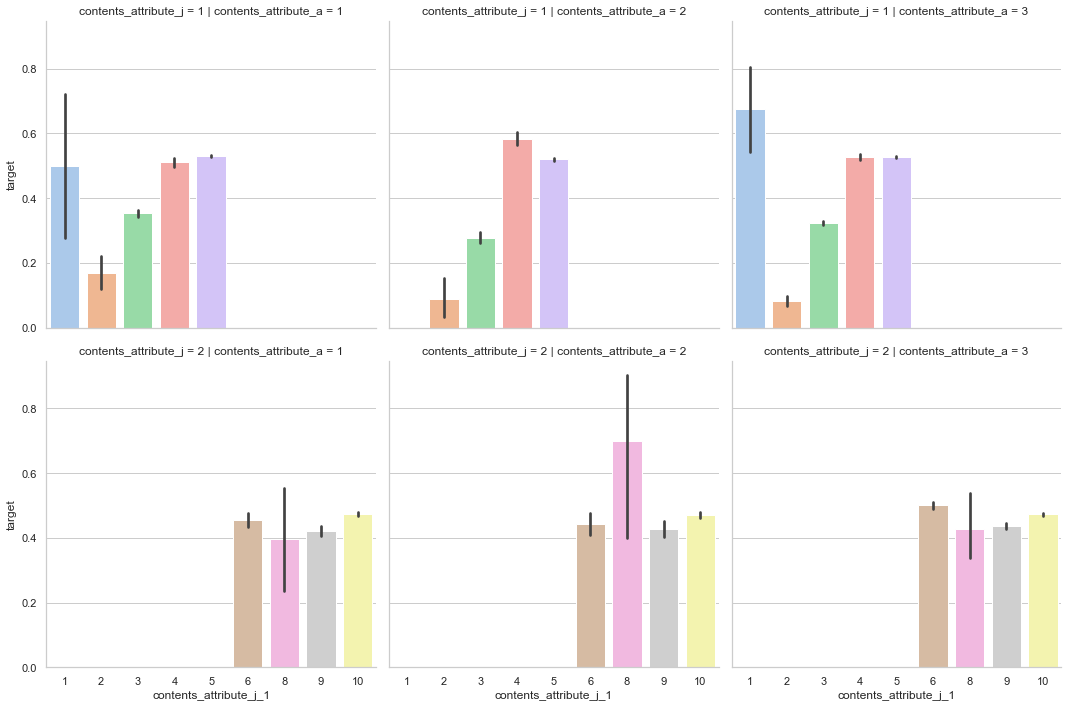

In [113]:
sns.catplot(x=x, y=y, kind="bar",col = "contents_attribute_a",row = "contents_attribute_j", data=job_data, palette='pastel', legend = True)

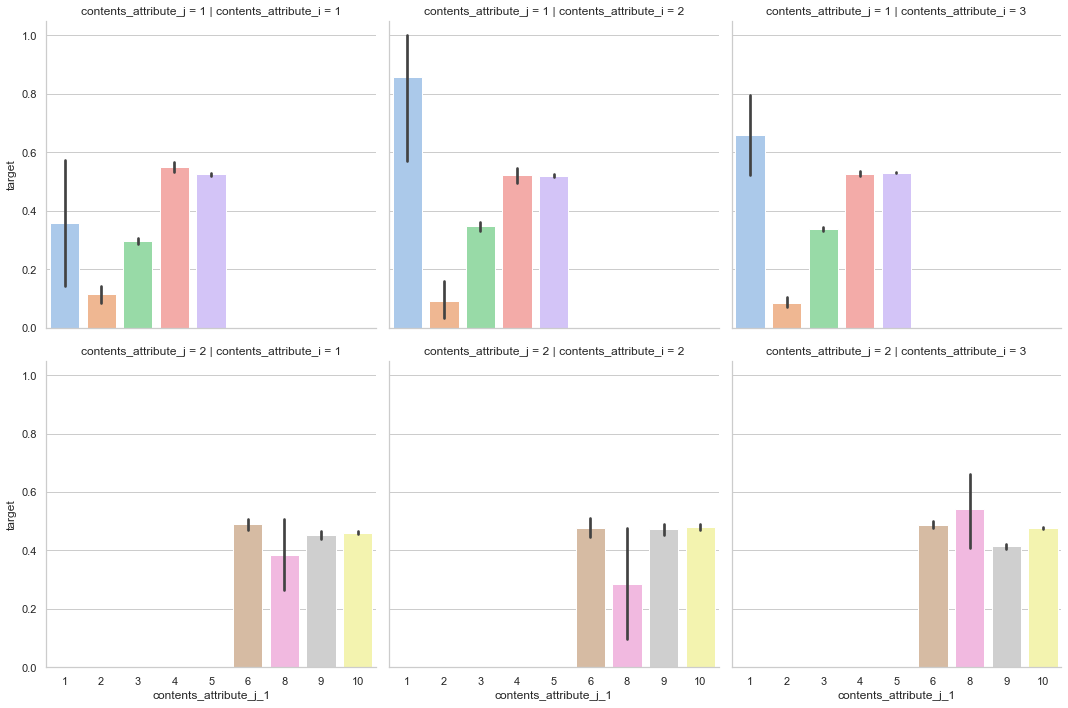

In [114]:
sns.catplot(x=x, y=y, kind="bar",col = "contents_attribute_i",row = "contents_attribute_j", data=job_data, palette='pastel', legend = True)

* 모든 경우의 수에 해당하는 값이 학습 데이터 셋에 있지 않음
* ```테스트 데이터 셋에만 존재하는 특징이 많을 경우```이를 고려해서 Feature Engineerinng를 진행 해야함

### contents_attribute_c
* ```컨텐츠 C 속성``` 특징 값
* Categorical Features

contents_attribute_c: 
1    401409
3     82929
2     12459
4      5154
Name: contents_attribute_c, dtype: int64


<AxesSubplot:xlabel='contents_attribute_c', ylabel='count'>

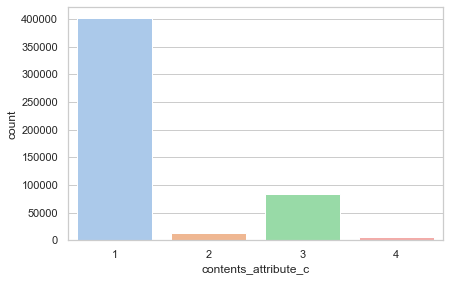

In [115]:
# contents_attribute_c
print("contents_attribute_c: ")
print(job_data['contents_attribute_c'].value_counts())

x = 'contents_attribute_c'
y = 'target'

sns.countplot('contents_attribute_c', data =job_data, palette='pastel')

In [116]:
value = job_data['contents_attribute_c'].value_counts()
value_percent = job_data['contents_attribute_c'].value_counts() / len(job_data) * 100
value_table = pd.concat([value, value_percent], axis=1)
value_table.columns = ['Num Of Values', '% of Total Values']
value_table

Num Of Values  % of Total Values
1         401409          79.969758
3          82929          16.521334
2          12459           2.482115
4           5154           1.026793

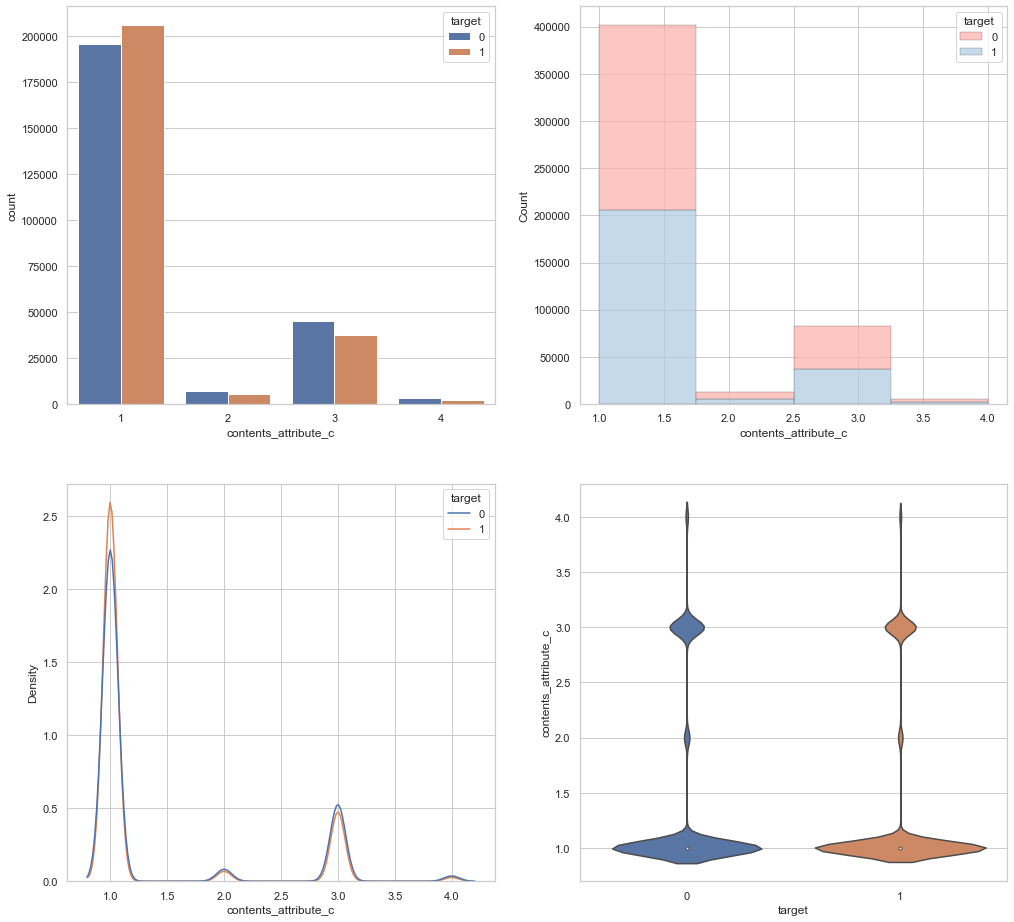

In [117]:
f, ax = plt.subplots(2,2, figsize=(15,15))

sns.countplot(x, hue = y, data =job_data, ax=ax[0][0])
sns.histplot(job_data,
            x = x,
            hue=y,
            multiple="stack", 
            palette="Pastel1",
            edgecolor=".10",
            linewidth=".20",
            bins = 4,
            ax = ax[0][1])
sns.kdeplot(data=job_data, x=x, hue=y, ax=ax[1][0])
sns.violinplot(data=job_data, x=y, y=x, ax=ax[1][1])
plt.show()

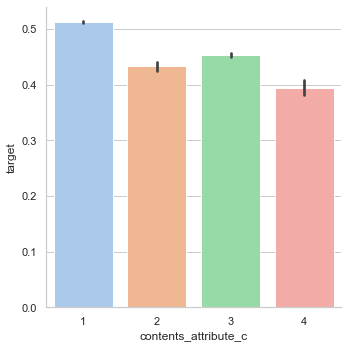

In [118]:
sns.catplot(x=x, y=y, kind="bar", data=job_data, palette='pastel')

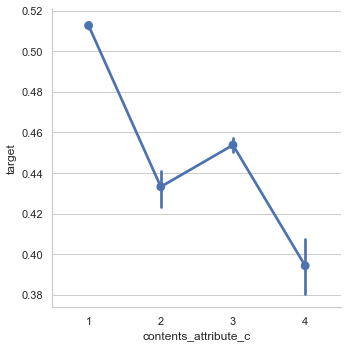

In [119]:
sns.catplot(x=x, y=y, kind="point", data=job_data)

* ```contents_attribute_c = 1```인 경우를 제외하면 target일 확률이 매우 낮음
* ```contents_attribute_c = 4```인 경우에서 target일 확률이 40% 미만임

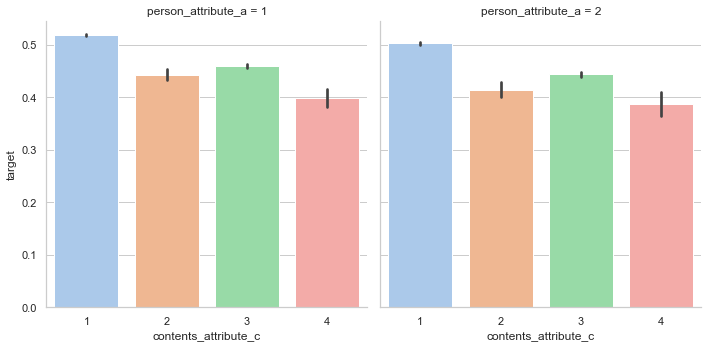

In [120]:
sns.catplot(x=x, y=y, kind="bar",col = "person_attribute_a", data=job_data, palette='pastel')

* ```person_attribute_a```의 값에 크게 변동되지 않는 모습을 보임

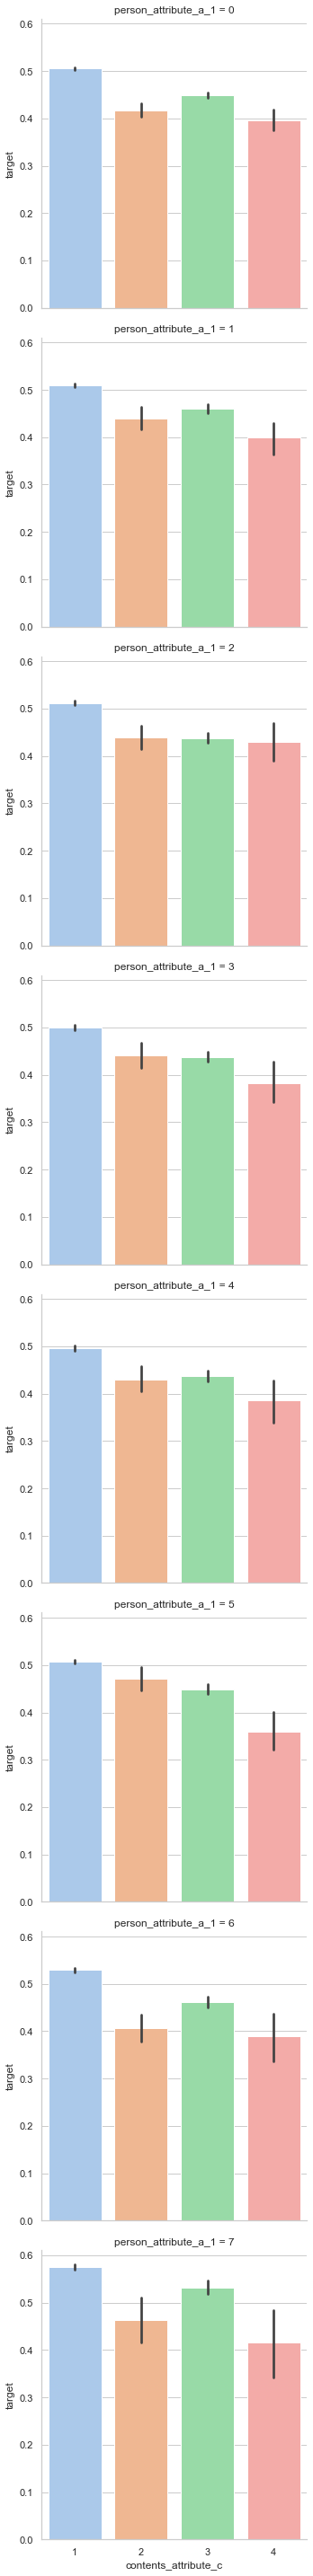

In [121]:
sns.catplot(x=x, y=y, kind="bar",row = "person_attribute_a_1", data=job_data, palette='pastel')

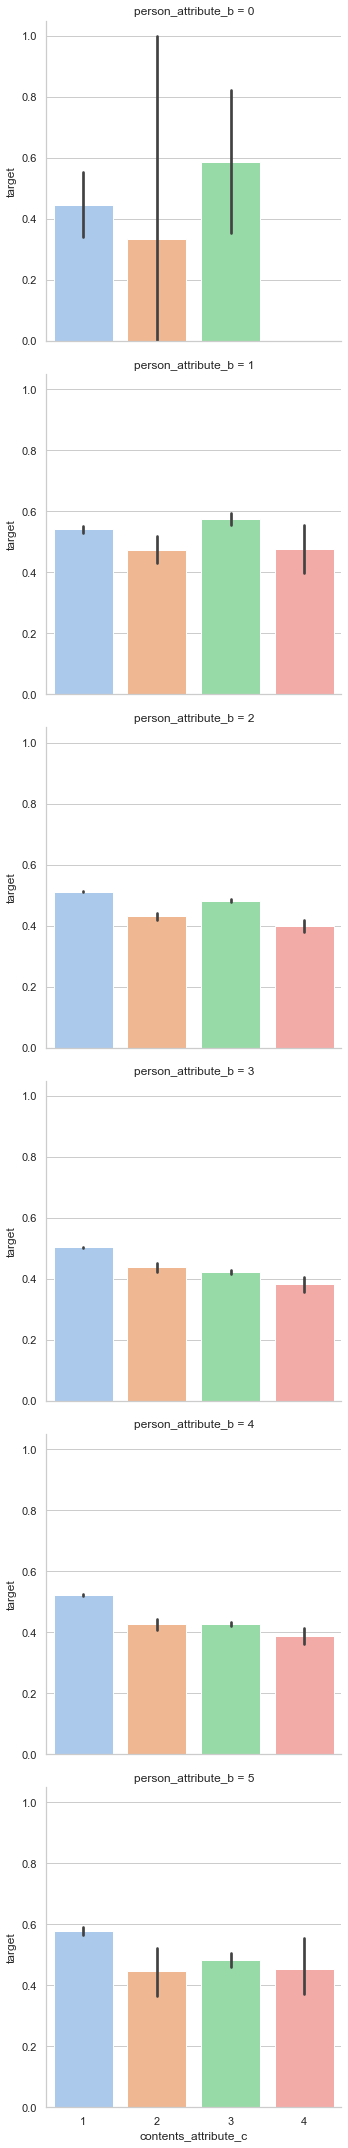

In [122]:
sns.catplot(x=x, y=y, kind="bar",row = "person_attribute_b", data=job_data, palette='pastel')

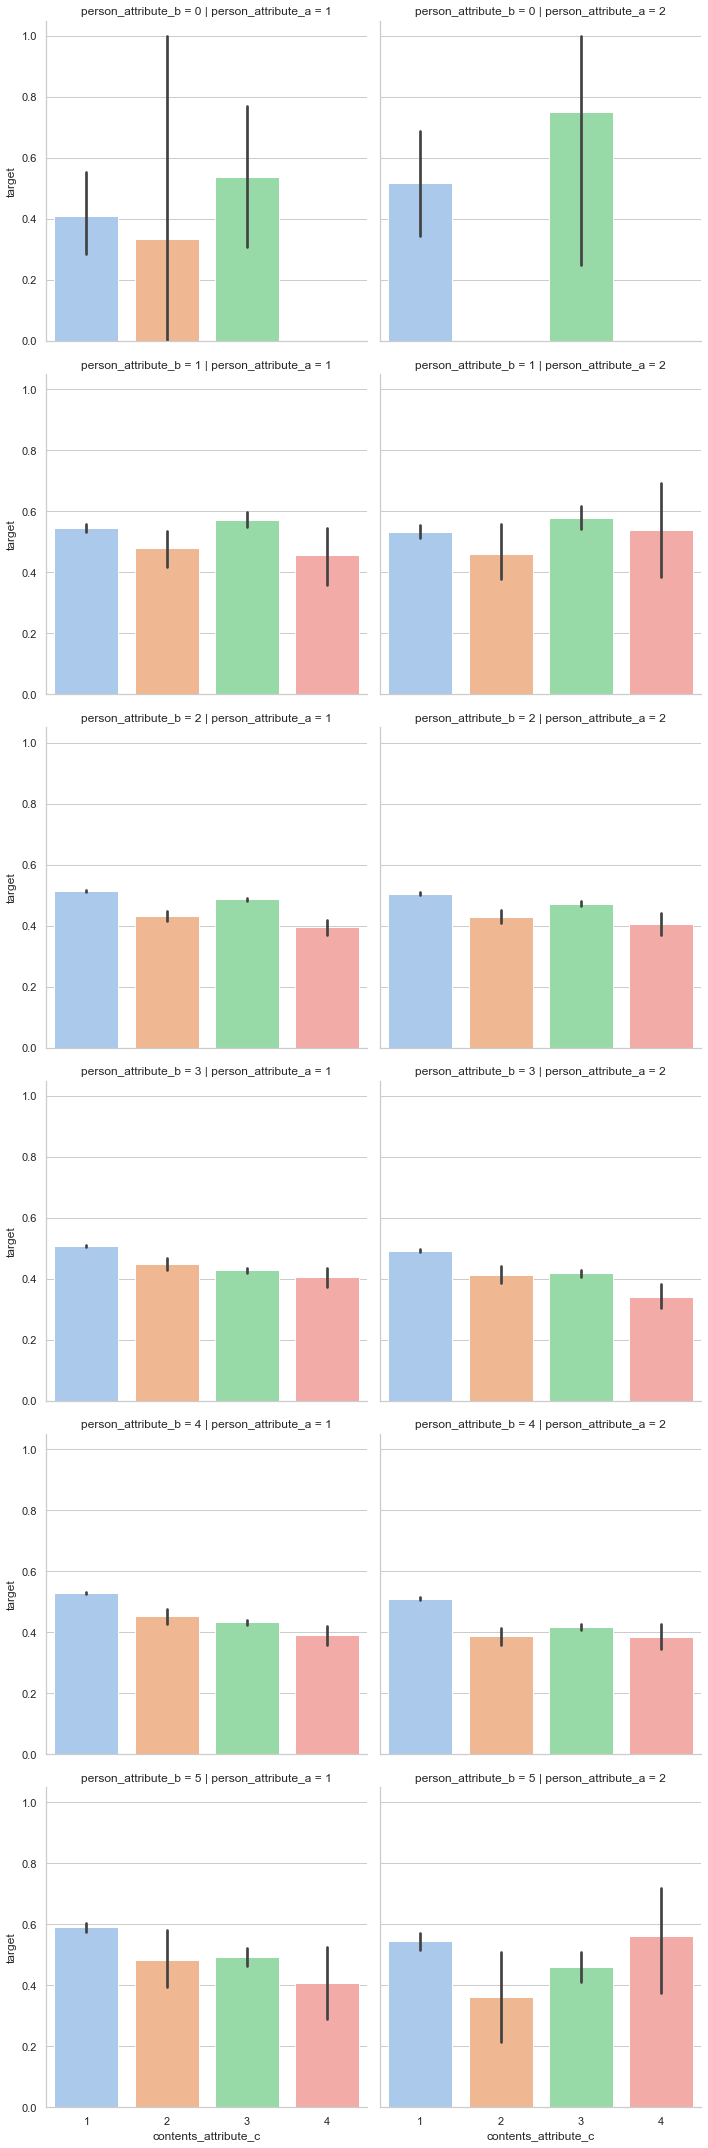

In [123]:
sns.catplot(x=x, y=y, kind="bar",col = "person_attribute_a",row = "person_attribute_b", data=job_data, palette='pastel', legend = True)

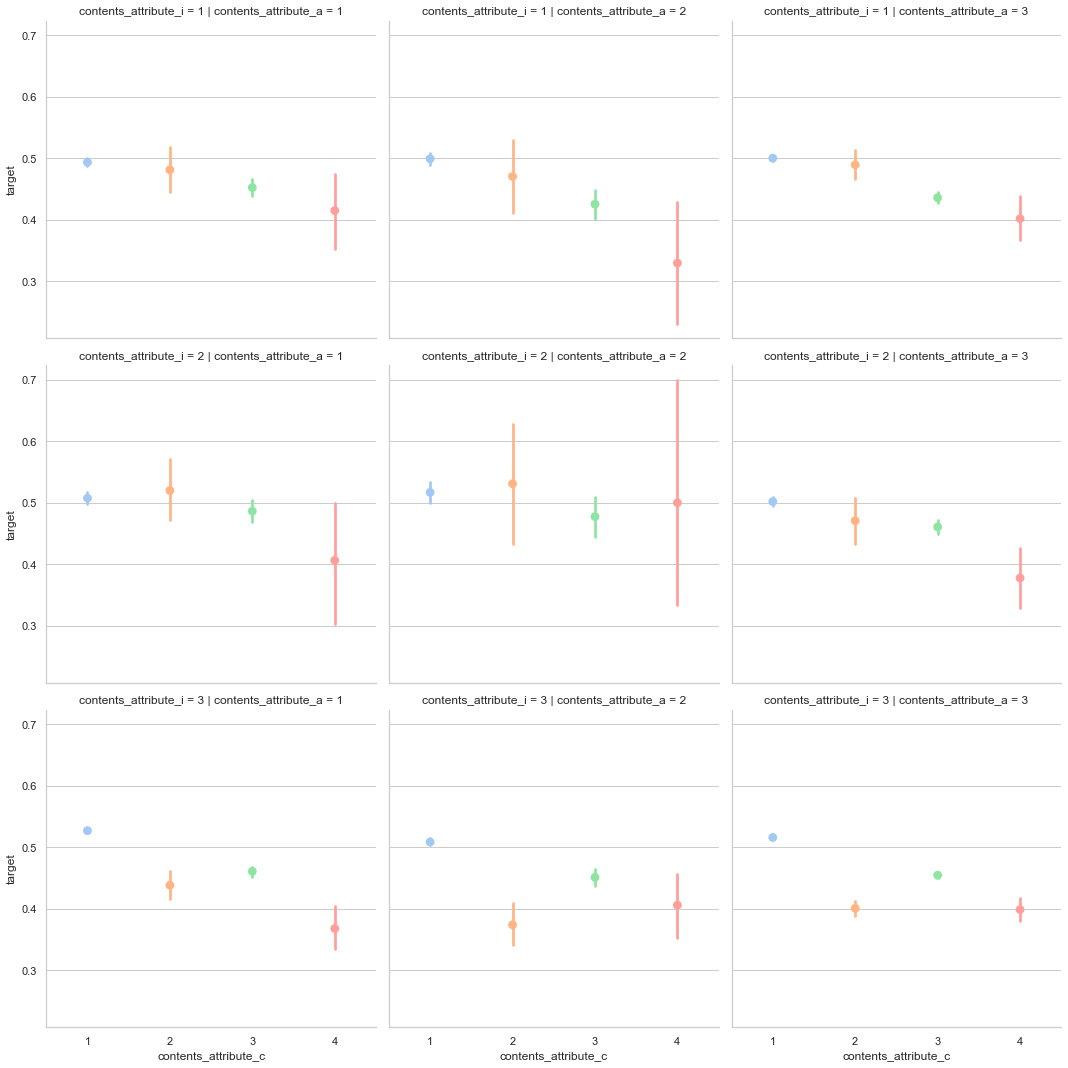

In [124]:
sns.catplot(x=x, y=y, kind="point",col = "contents_attribute_a",row = "contents_attribute_i", data=job_data, palette='pastel', legend = True)

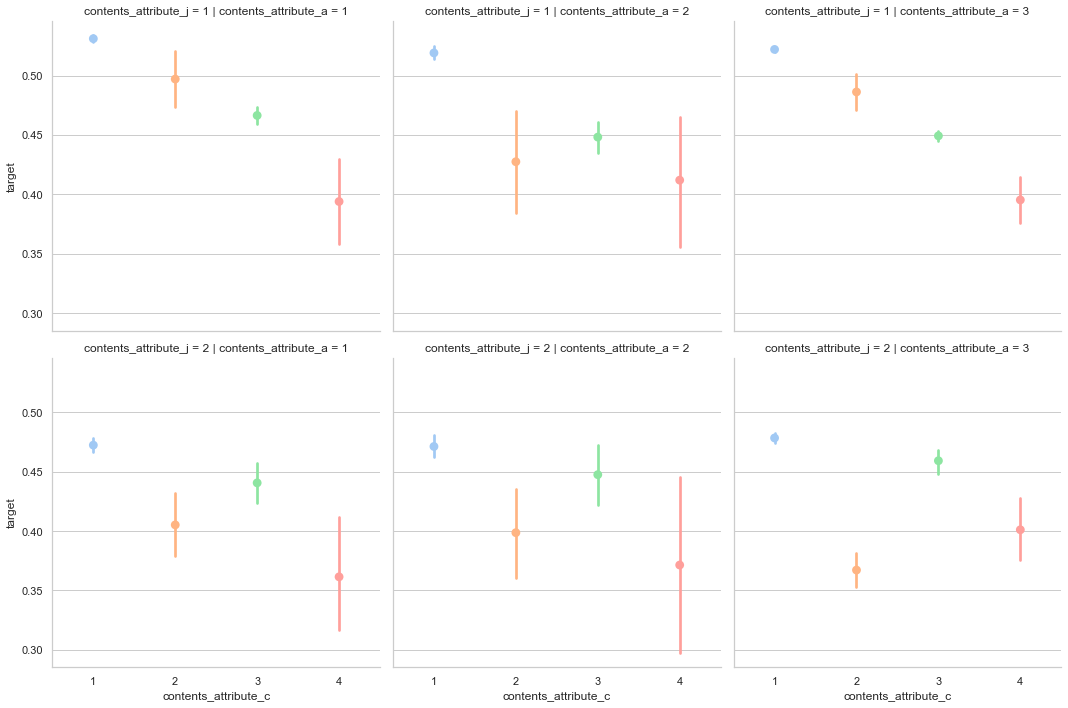

In [125]:
sns.catplot(x=x, y=y, kind="point",col = "contents_attribute_a",row = "contents_attribute_j", data=job_data, palette='pastel', legend = True)

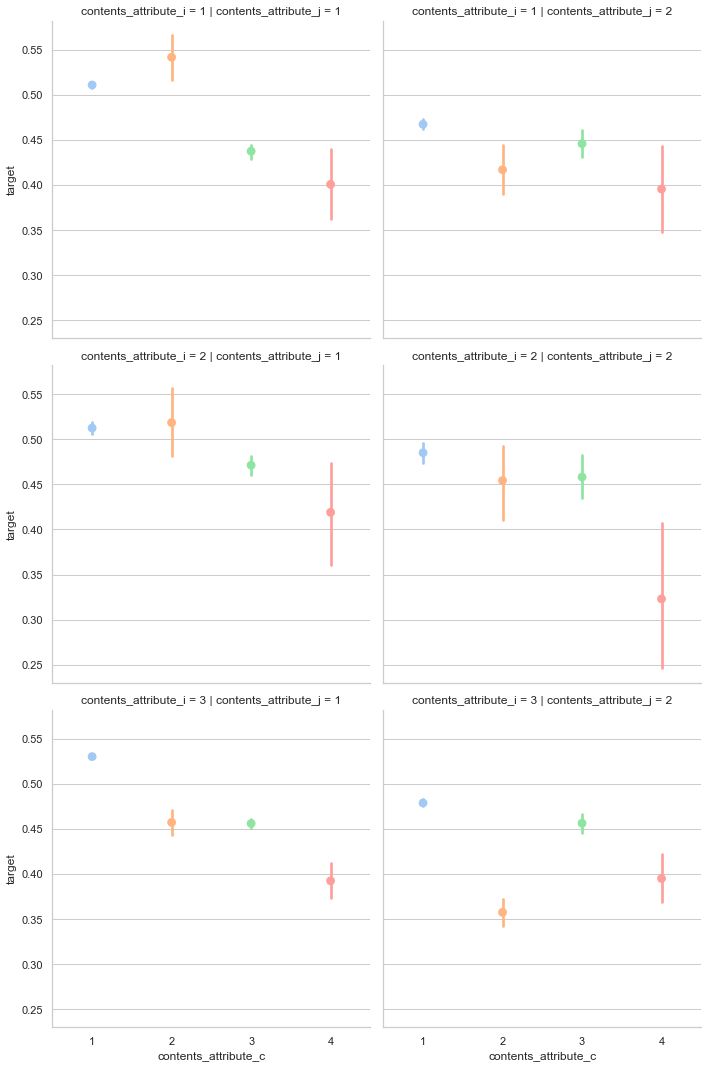

In [126]:
sns.catplot(x=x, y=y, kind="point",col = "contents_attribute_j",row = "contents_attribute_i", data=job_data, palette='pastel', legend = True)

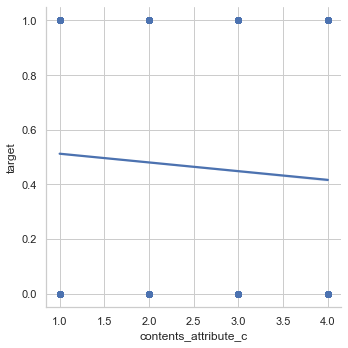

In [127]:
sns.lmplot(x = x, y = y, data = job_data)

### contents_attribute_k
* ```컨텐츠 K 속성``` 특징 값
* Categorical Features

contents_attribute_k: 
2    483533
1     18418
Name: contents_attribute_k, dtype: int64


<AxesSubplot:xlabel='contents_attribute_k', ylabel='count'>

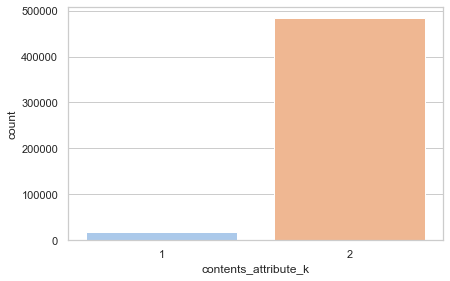

In [128]:
# contents_attribute_j
print("contents_attribute_k: ")
print(job_data['contents_attribute_k'].value_counts())

x = 'contents_attribute_k'
y = 'target'

sns.countplot('contents_attribute_k', data =job_data, palette='pastel')

* 대부분의 값이 2에 수렴하는 것을 볼 수 있음
* 1에 해당하는 값은 전체의 3.6%에 해당함

In [129]:
value = job_data['contents_attribute_k'].value_counts()
value_percent = job_data['contents_attribute_k'].value_counts() / len(job_data) * 100
value_table = pd.concat([value, value_percent], axis=1)
value_table.columns = ['Num Of Values', '% of Total Values']
value_table

Num Of Values  % of Total Values
2         483533          96.330718
1          18418           3.669282

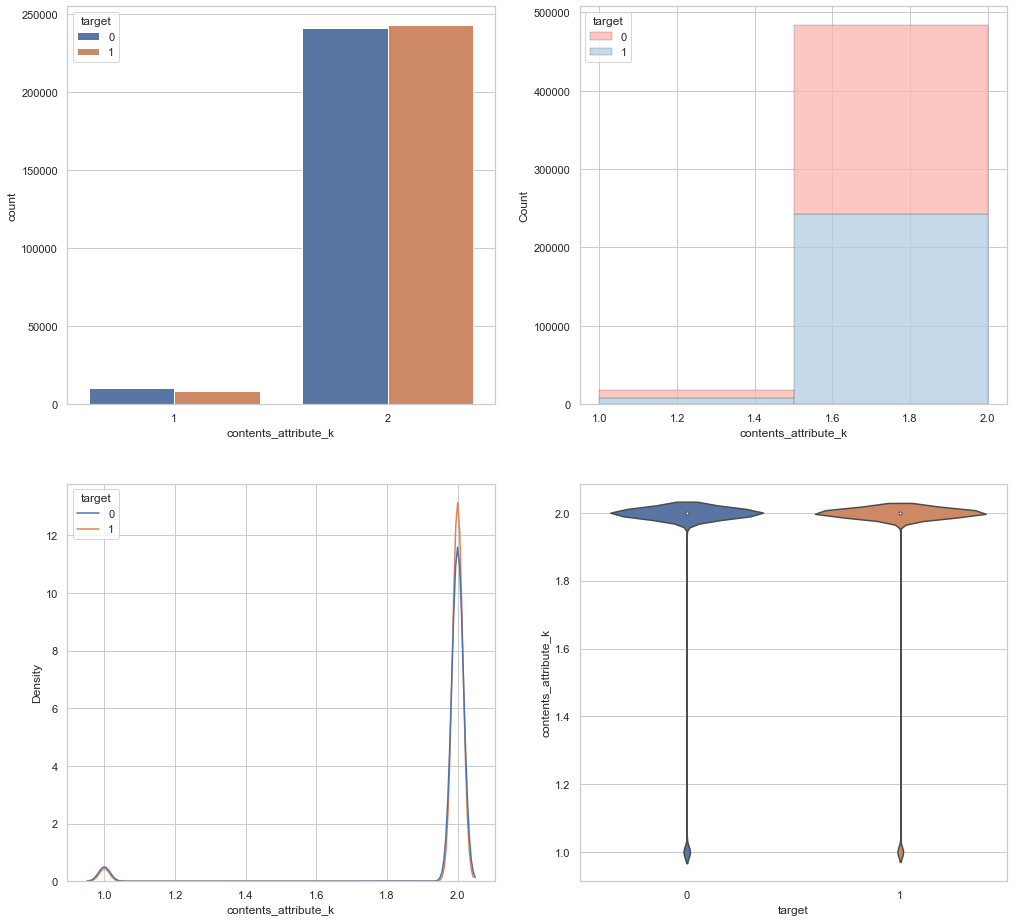

In [130]:
f, ax = plt.subplots(2,2, figsize=(15,15))

sns.countplot(x, hue = y, data =job_data, ax=ax[0][0])
sns.histplot(job_data,
            x = x,
            hue=y,
            multiple="stack", 
            palette="Pastel1",
            edgecolor=".10",
            linewidth=".20",
            bins = 2,
            ax = ax[0][1])
sns.kdeplot(data=job_data, x=x, hue=y, ax=ax[1][0])
sns.violinplot(data=job_data, x=y, y=x, ax=ax[1][1])
plt.show()

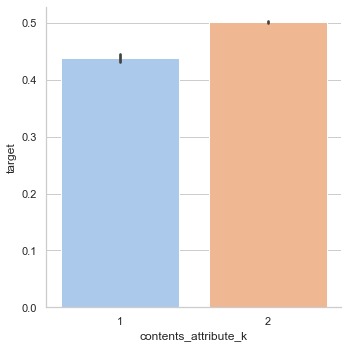

In [131]:
sns.catplot(x=x, y=y, kind="bar", data=job_data, palette='pastel')

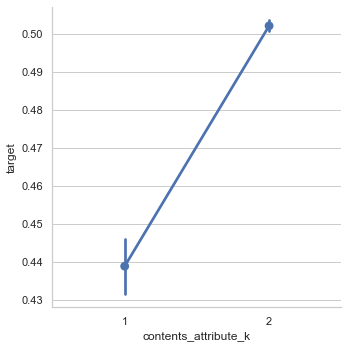

In [132]:
sns.catplot(x=x, y=y, kind="point", data=job_data)

* ```contents_attribute_k = 2```에 해당하는 값이 더욱 높은 확률로 target 값을 갖고 있음

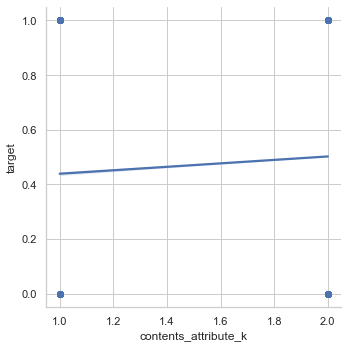

In [133]:
sns.lmplot(x = x, y = y, data = job_data)

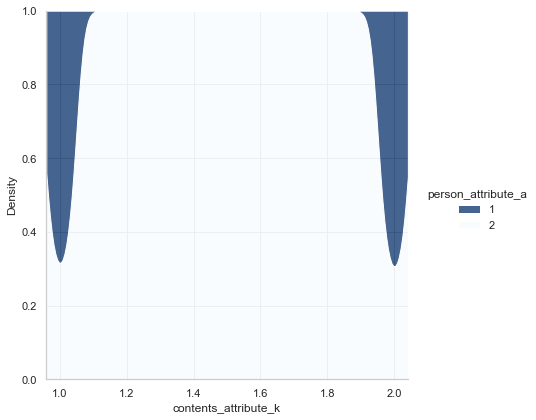

In [134]:
sns.displot(
    data=job_data,
    x=x, hue="person_attribute_a",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="Blues_r",
)

* 대다수의 값에서 ```person_attribute_a``` 값이 2를 갖는다.

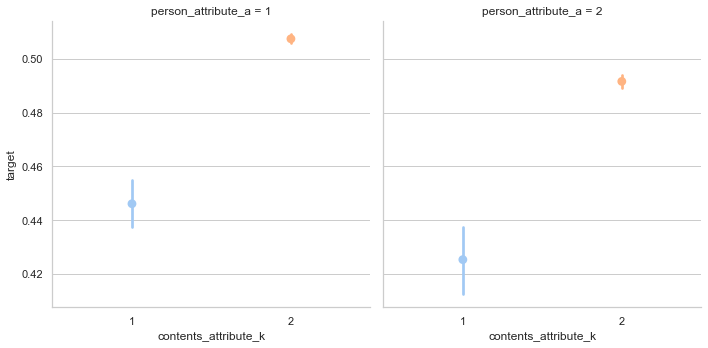

In [136]:
sns.catplot(x=x, y=y, kind="point",col = "person_attribute_a", data=job_data, palette='pastel')

* ```person_attribute_a```  값에 상관 없이 ```contents_attribute_k = 1``` 은 target 값에 있어서 50% 미만인 것을 볼 수 있음
* ```person_attribute_a = 1```이면서  ```contents_attribute_k = 2``` 인 경우에만 target 값이 50%일 확률 이 높음


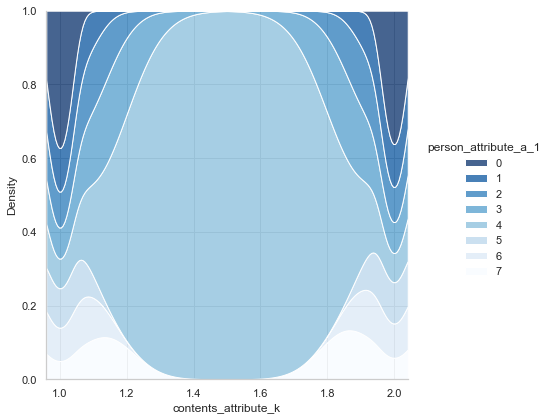

In [137]:
sns.displot(
    data=job_data,
    x=x, hue="person_attribute_a_1",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="Blues_r",
)

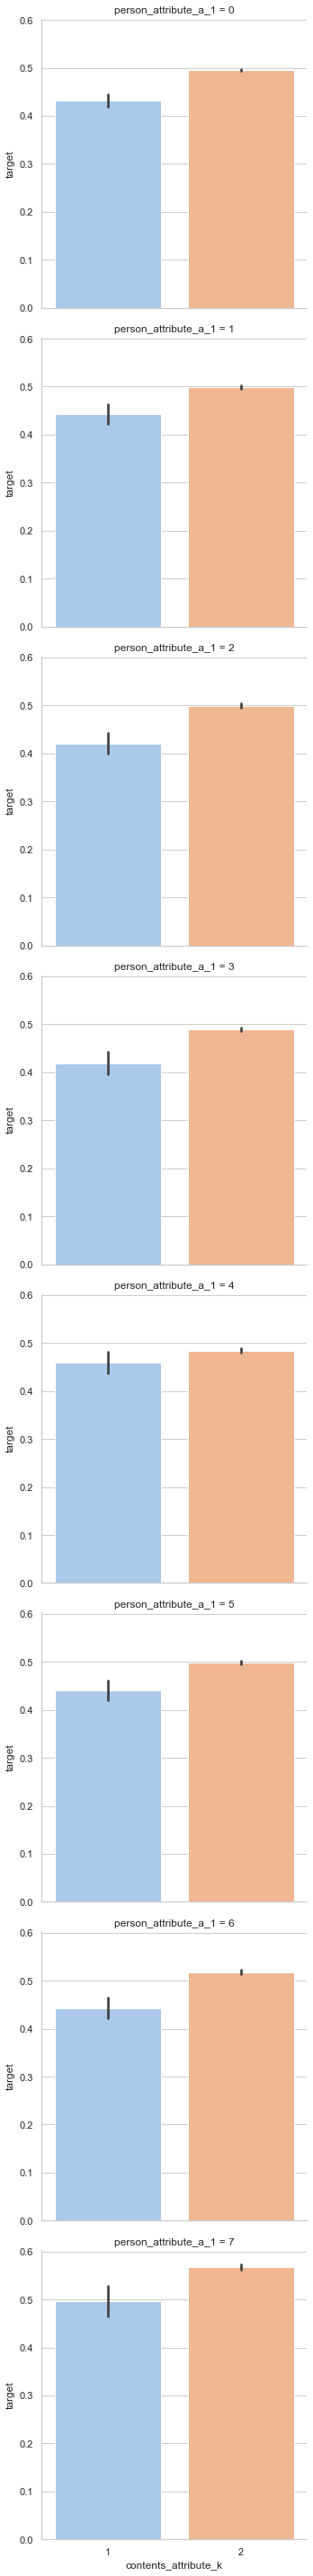

In [138]:
sns.catplot(x=x, y=y, kind="bar",row = "person_attribute_a_1", data=job_data, palette='pastel')

* ```person_attribute_a_1 = 6 | person_attribute_a_1 = 7```일 때만 50%를 넘는 것을 볼 수 있음

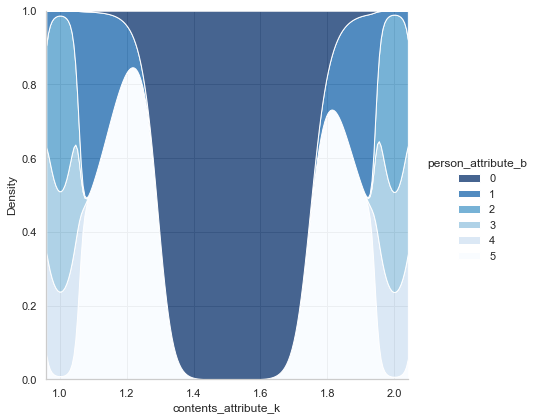

In [139]:
sns.displot(
    data=job_data,
    x=x, hue="person_attribute_b",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="Blues_r",
)

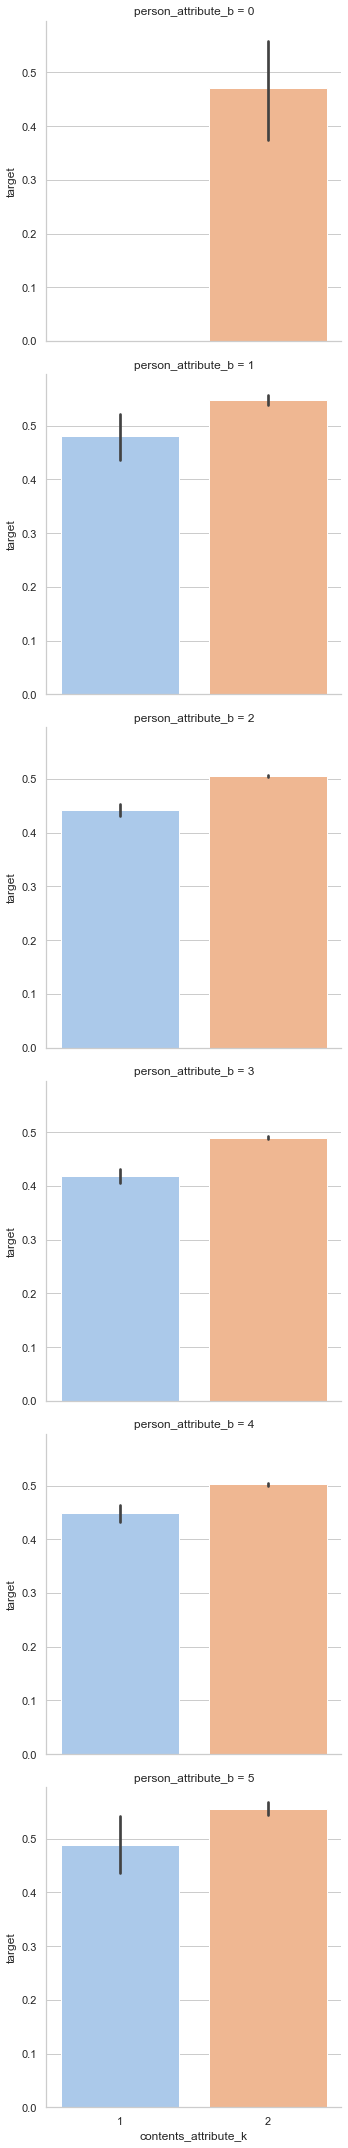

In [140]:
sns.catplot(x=x, y=y, kind="bar",row = "person_attribute_b", data=job_data, palette='pastel')

* ``` person_attribute_b = 1 | person_attribute_b = 2 | person_attribute_b = 4 | person_attribute_b = 5```에서 ```contents_attribute_k = 2```일 때 만을 제외하고는 50%를 넘는 것이 보이지 않음
* ```contents_attribute_k = 1```일 때는 모든 값들이 target 확률이 50를 넘지 않음

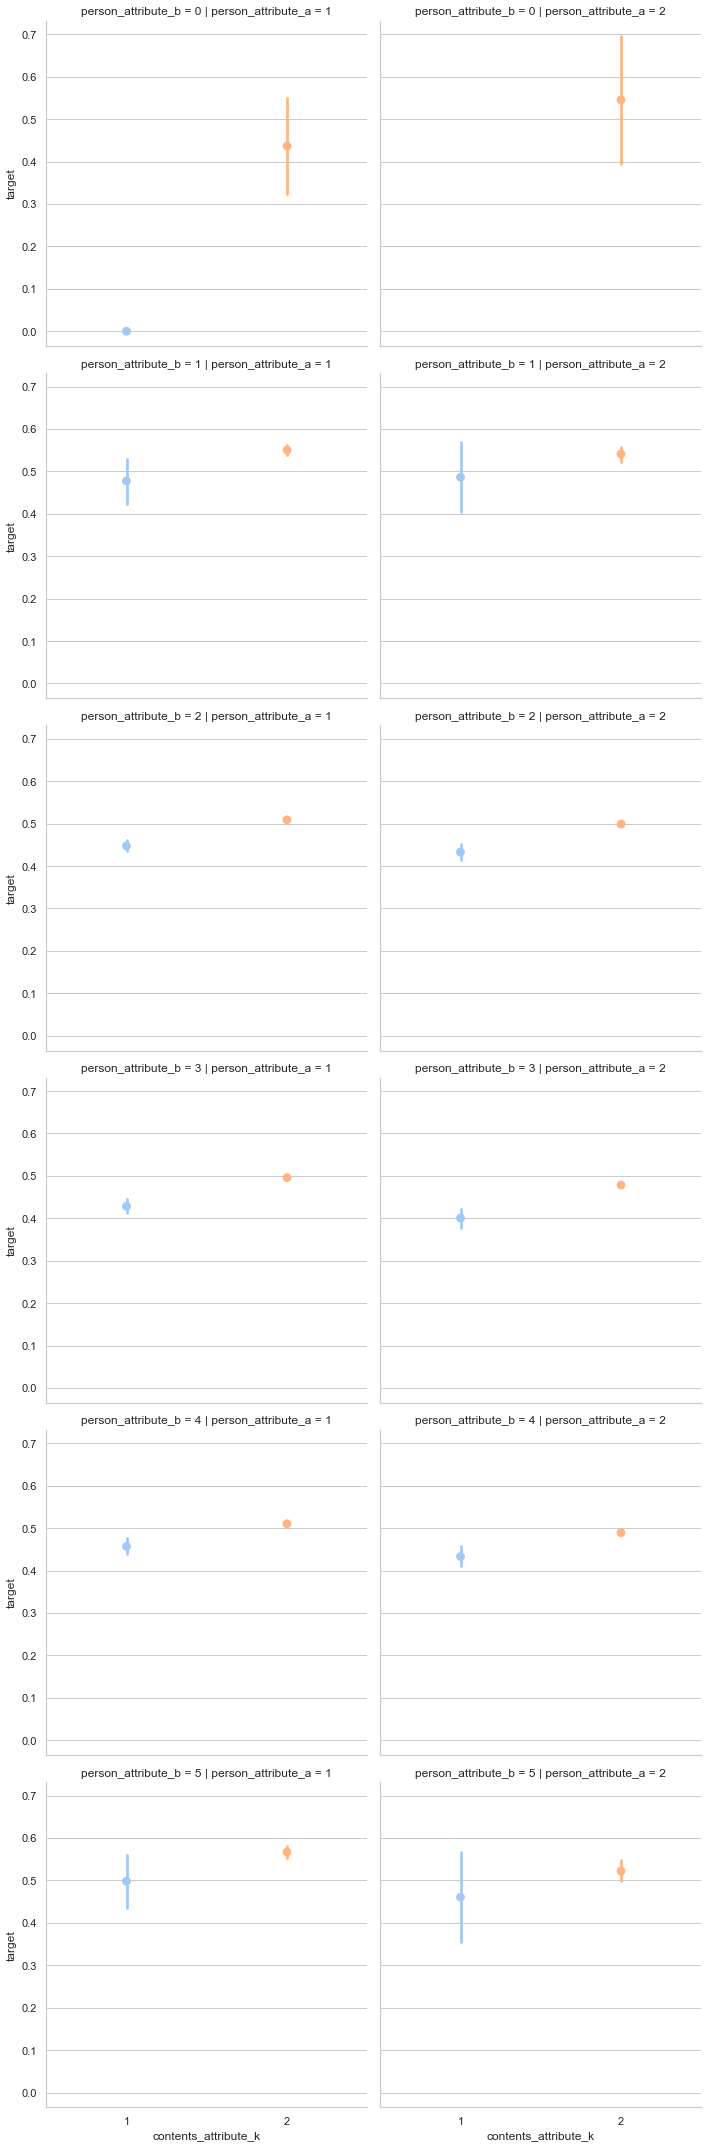

In [141]:
sns.catplot(x=x, y=y, kind="point",col = "person_attribute_a",row = "person_attribute_b", data=job_data, palette='pastel', legend = True)

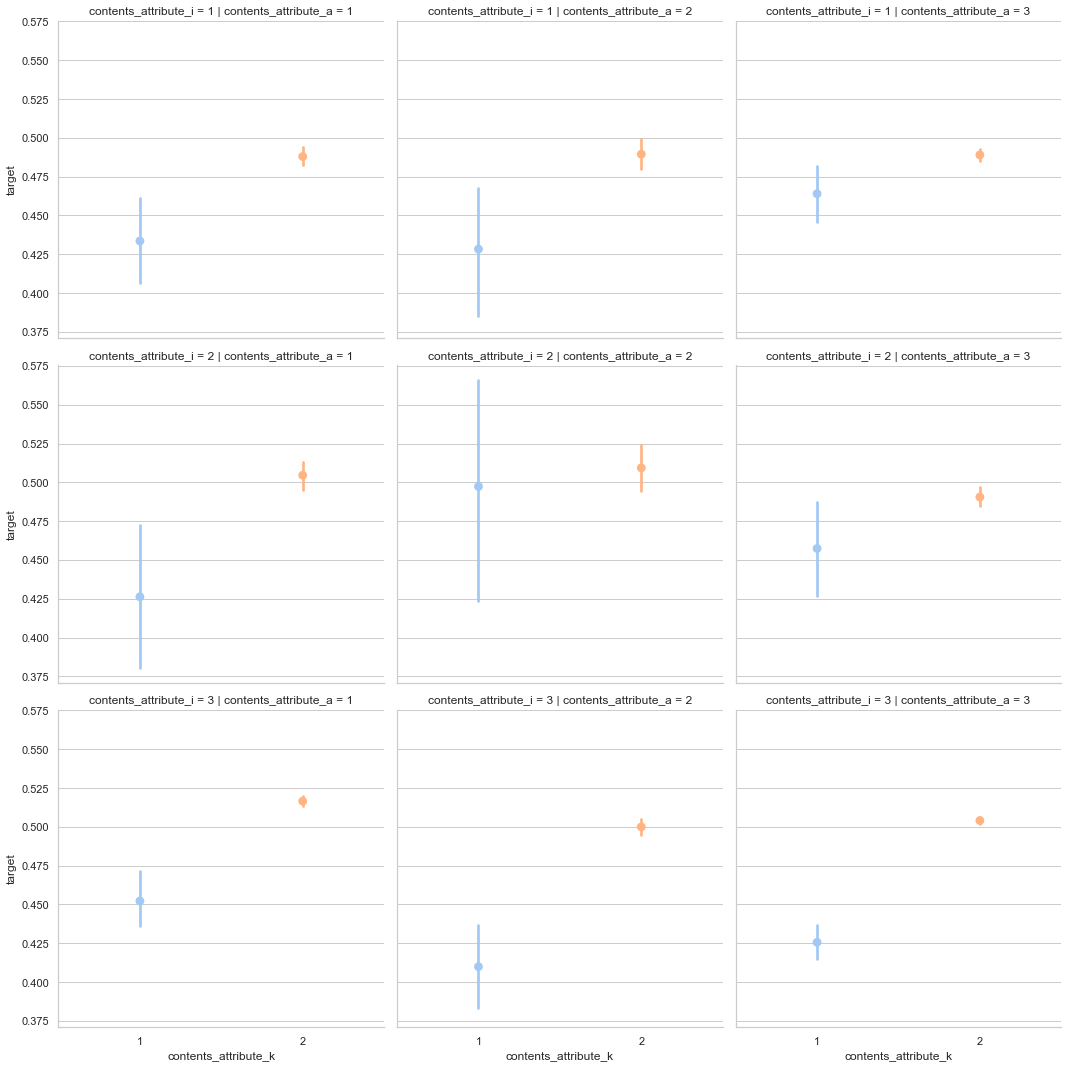

In [142]:
sns.catplot(x=x, y=y, kind="point",col = "contents_attribute_a",row = "contents_attribute_i", data=job_data, palette='pastel', legend = True)

* ```contents_attribute_i = 1```일 때는 target 값에서 50% 넘는 것이 보이지 않음
* ```contents_attribute_i``` 값은 2인 경우가 target이 50% 넘을 확률이 높음

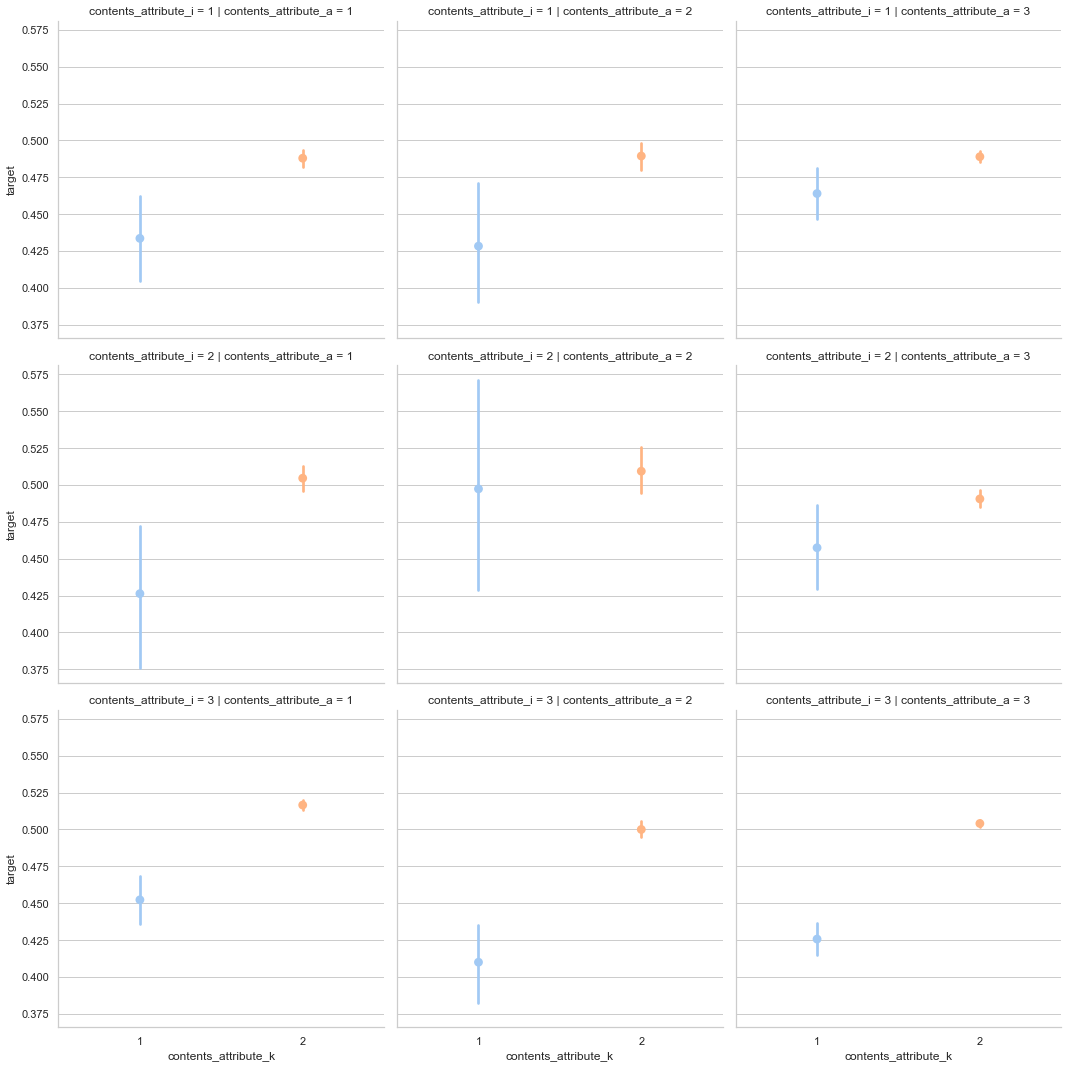

In [143]:
sns.catplot(x=x, y=y, kind="point",col = "contents_attribute_a",row = "contents_attribute_i", data=job_data, palette='pastel', legend = True)

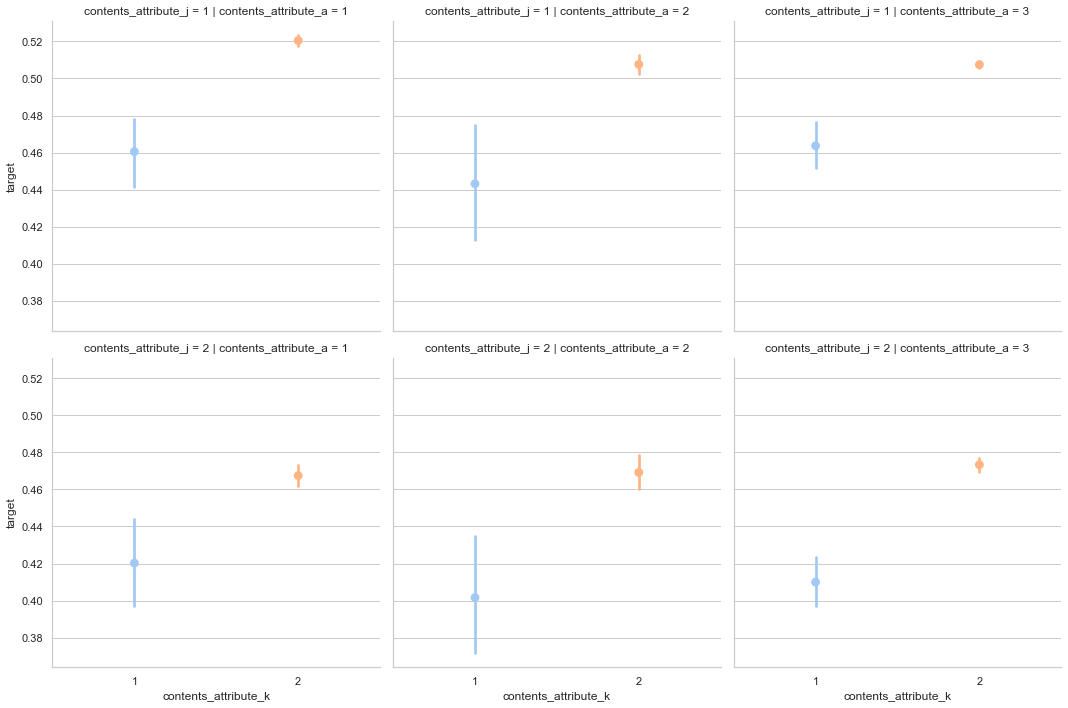

In [144]:
sns.catplot(x=x, y=y, kind="point",col = "contents_attribute_a",row = "contents_attribute_j", data=job_data, palette='pastel', legend = True)

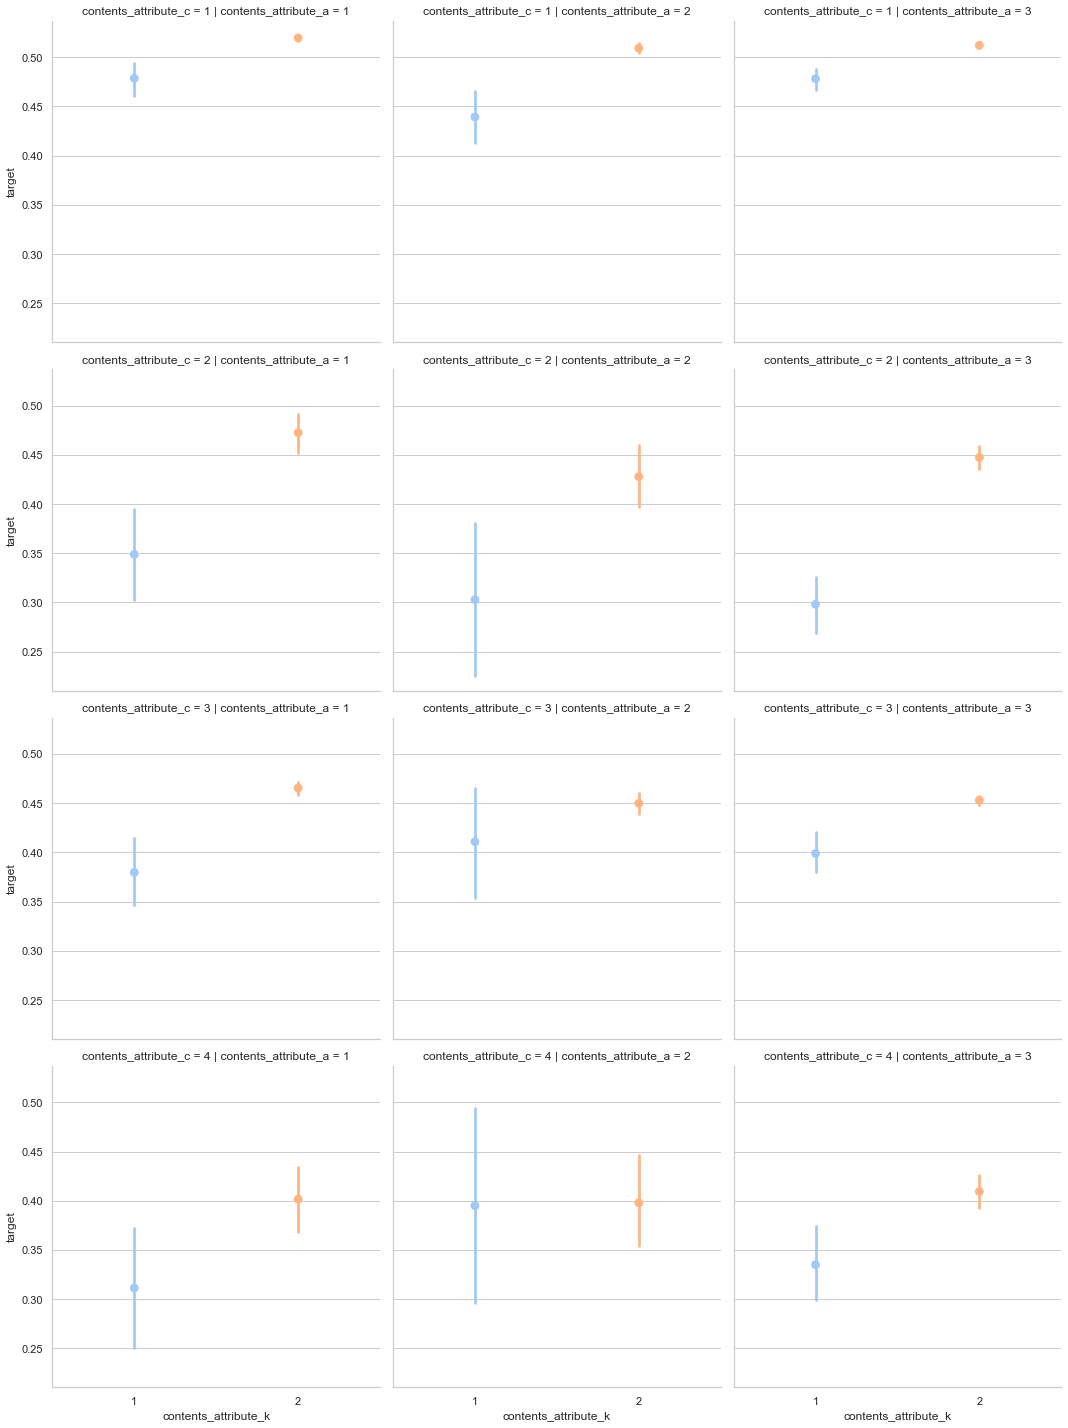

In [145]:
sns.catplot(x=x, y=y, kind="point",col = "contents_attribute_a",row = "contents_attribute_c", data=job_data, palette='pastel', legend = True)

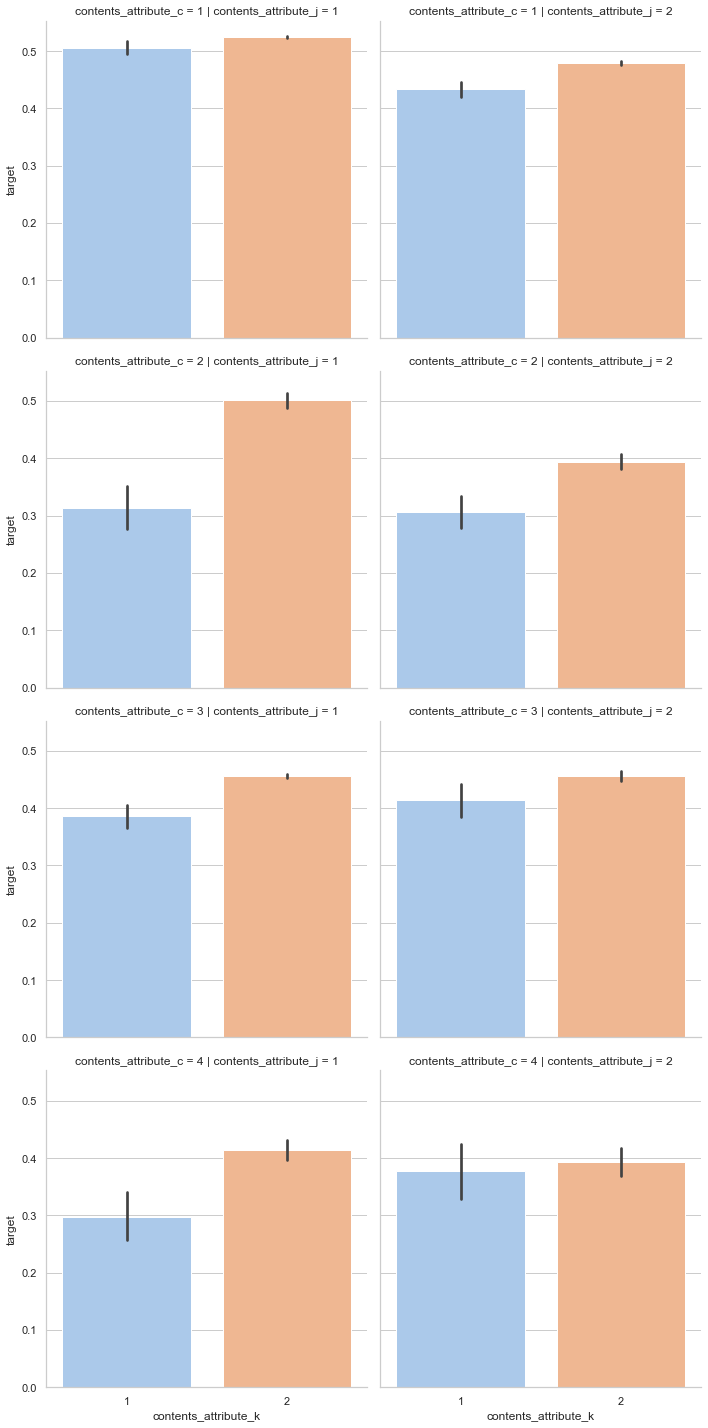

In [146]:
sns.catplot(x=x, y=y, kind="bar",col = "contents_attribute_j",row = "contents_attribute_c", data=job_data, palette='pastel', legend = True)

### contents_attribute_e
* ```컨텐츠 E 속성``` 특징 값
* Ordinal Features

contents_attribute_e: 
3     187593
4     175628
5      81684
6      27776
2       9414
7       7734
1       5179
8       3991
0       1025
9        908
10       673
11       346
Name: contents_attribute_e, dtype: int64


<AxesSubplot:xlabel='contents_attribute_e', ylabel='count'>

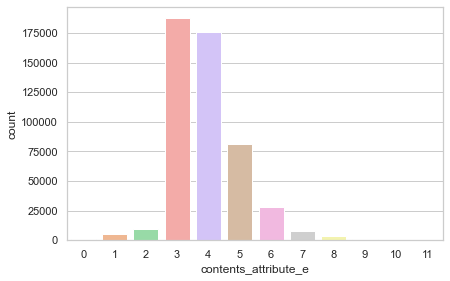

In [147]:
# contents_attribute_i
print("contents_attribute_e: ")
print(job_data['contents_attribute_e'].value_counts())

x = 'contents_attribute_e'
y = 'target'

sns.countplot('contents_attribute_e', data =job_data, palette='pastel')

In [148]:
value = job_data['contents_attribute_e'].value_counts()
value_percent = job_data['contents_attribute_e'].value_counts() / len(job_data) * 100
value_table = pd.concat([value, value_percent], axis=1)
value_table.columns = ['Num Of Values', '% of Total Values']
value_table

Num Of Values  % of Total Values
3          187593          37.372771
4          175628          34.989073
5           81684          16.273302
6           27776           5.533608
2            9414           1.875482
7            7734           1.540788
1            5179           1.031774
8            3991           0.795098
0            1025           0.204203
9             908           0.180894
10            673           0.134077
11            346           0.068931

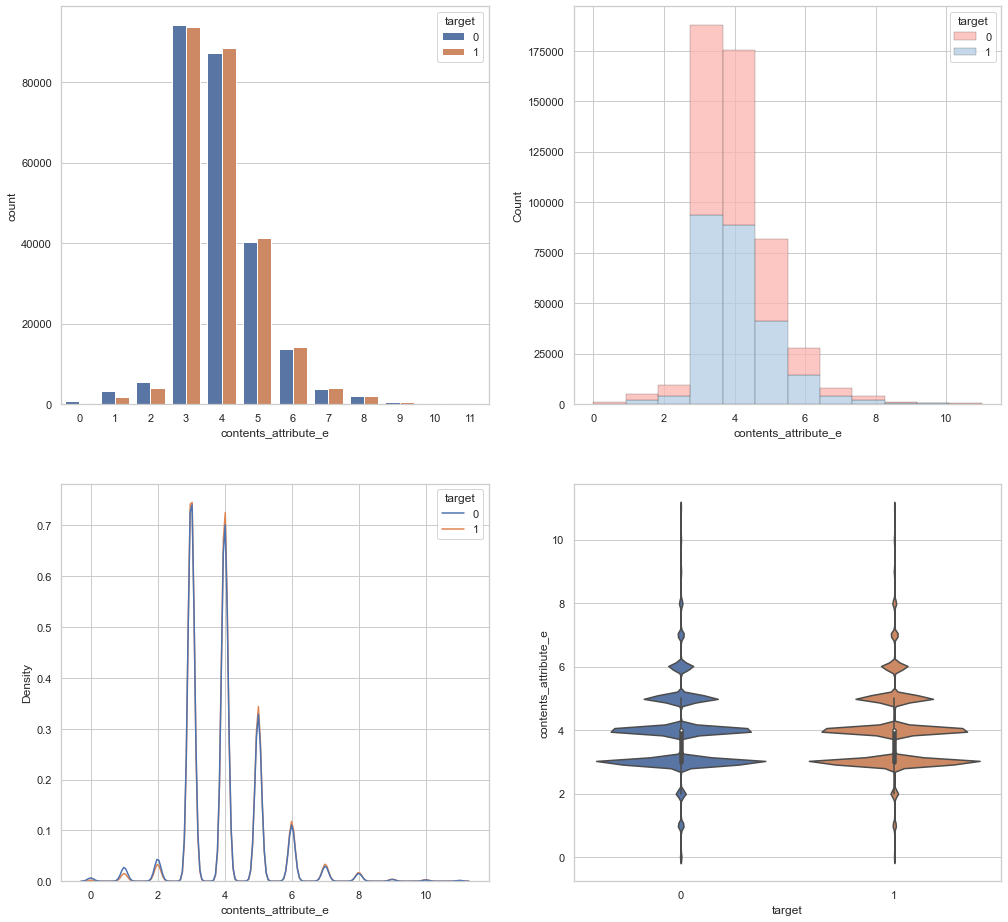

In [149]:
f, ax = plt.subplots(2,2, figsize=(15,15))

sns.countplot(x, hue = y, data =job_data, ax=ax[0][0])
sns.histplot(job_data,
            x = x,
            hue=y,
            multiple="stack", 
            palette="Pastel1",
            edgecolor=".10",
            linewidth=".20",
            bins = 12,
            ax = ax[0][1])
sns.kdeplot(data=job_data, x=x, hue=y, ax=ax[1][0])
sns.violinplot(data=job_data, x=y, y=x, ax=ax[1][1])
plt.show()

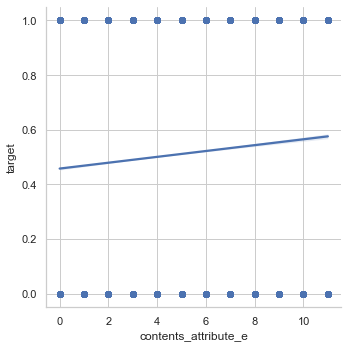

In [150]:
sns.lmplot(x = x, y = y, data = job_data)

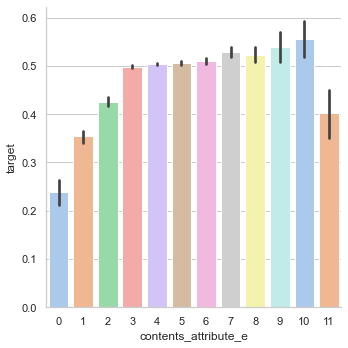

In [151]:
sns.catplot(x=x, y=y, kind="bar", data=job_data, palette='pastel')

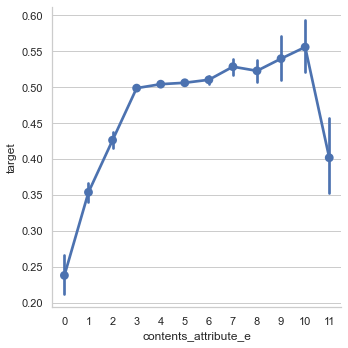

In [152]:
sns.catplot(x=x, y=y, kind="point", data=job_data)

* ```contents_attribute_e``` 값이 3~10 까지만 target 값의 확률이 50을 넘는다. 이것을 제외하고는 모든 50% 아래의 확률 값을 갖는다.
* ```contents_attribute_e = 1```일 경우 확률이 가장 낮은 것을 볼 수 있음

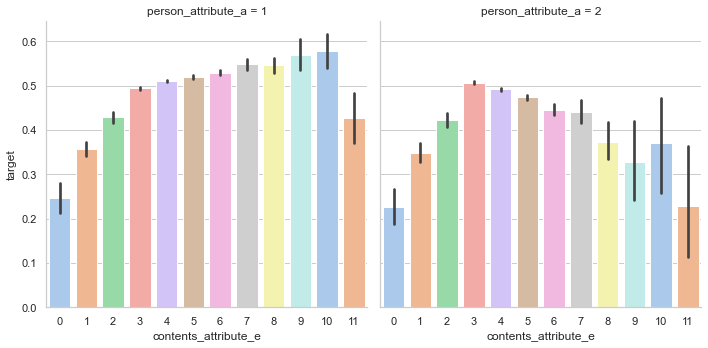

In [153]:
sns.catplot(x=x, y=y, kind="bar",col = "person_attribute_a", data=job_data, palette='pastel')

* ```person_attribute_a = 2```인 경우에 모든 target 값의 확률이 50% 아래로 떨어지는 것으로 보임

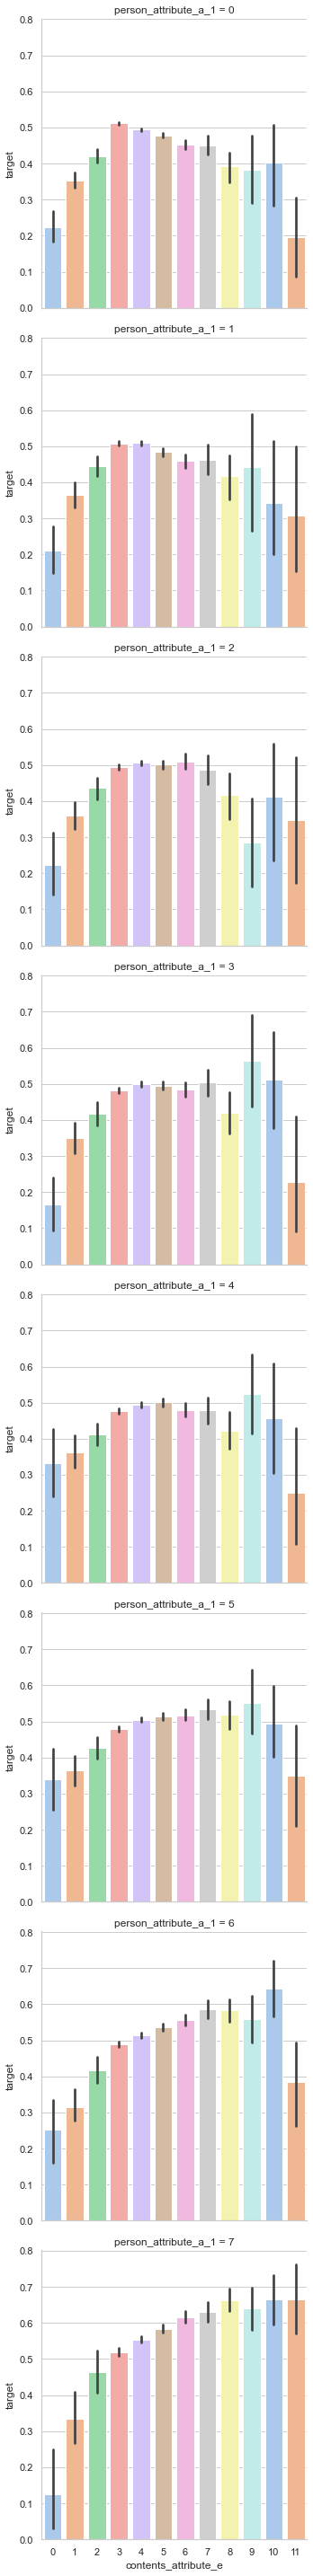

In [154]:
sns.catplot(x=x, y=y, kind="bar",row = "person_attribute_a_1", data=job_data, palette='pastel')

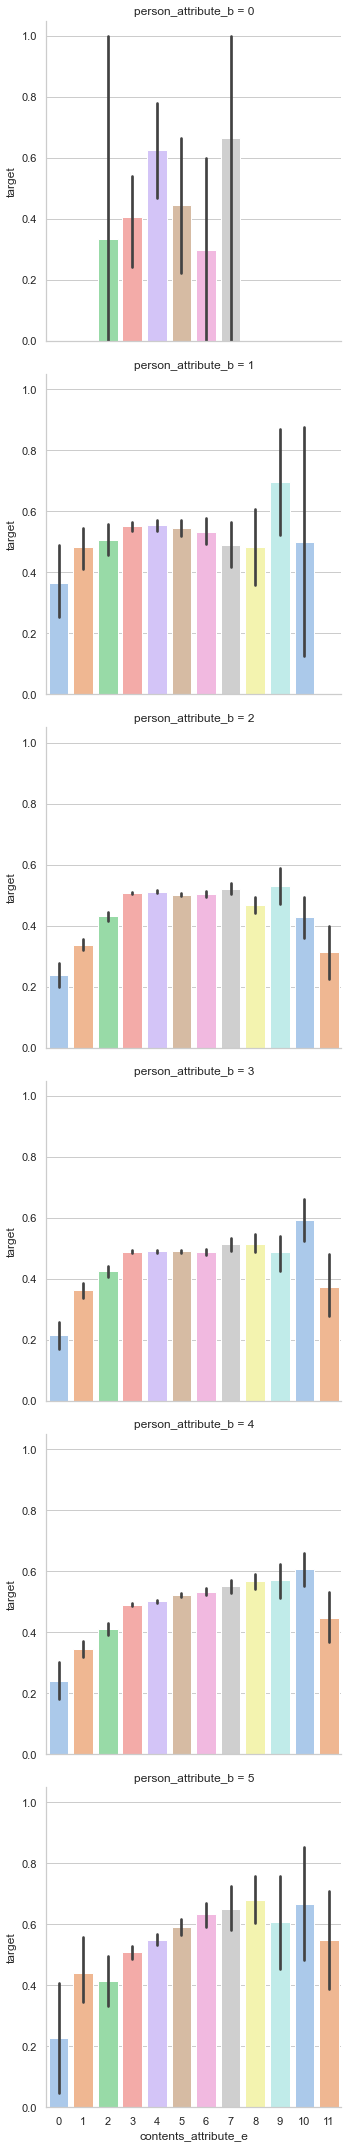

In [155]:
sns.catplot(x=x, y=y, kind="bar",row = "person_attribute_b", data=job_data, palette='pastel')

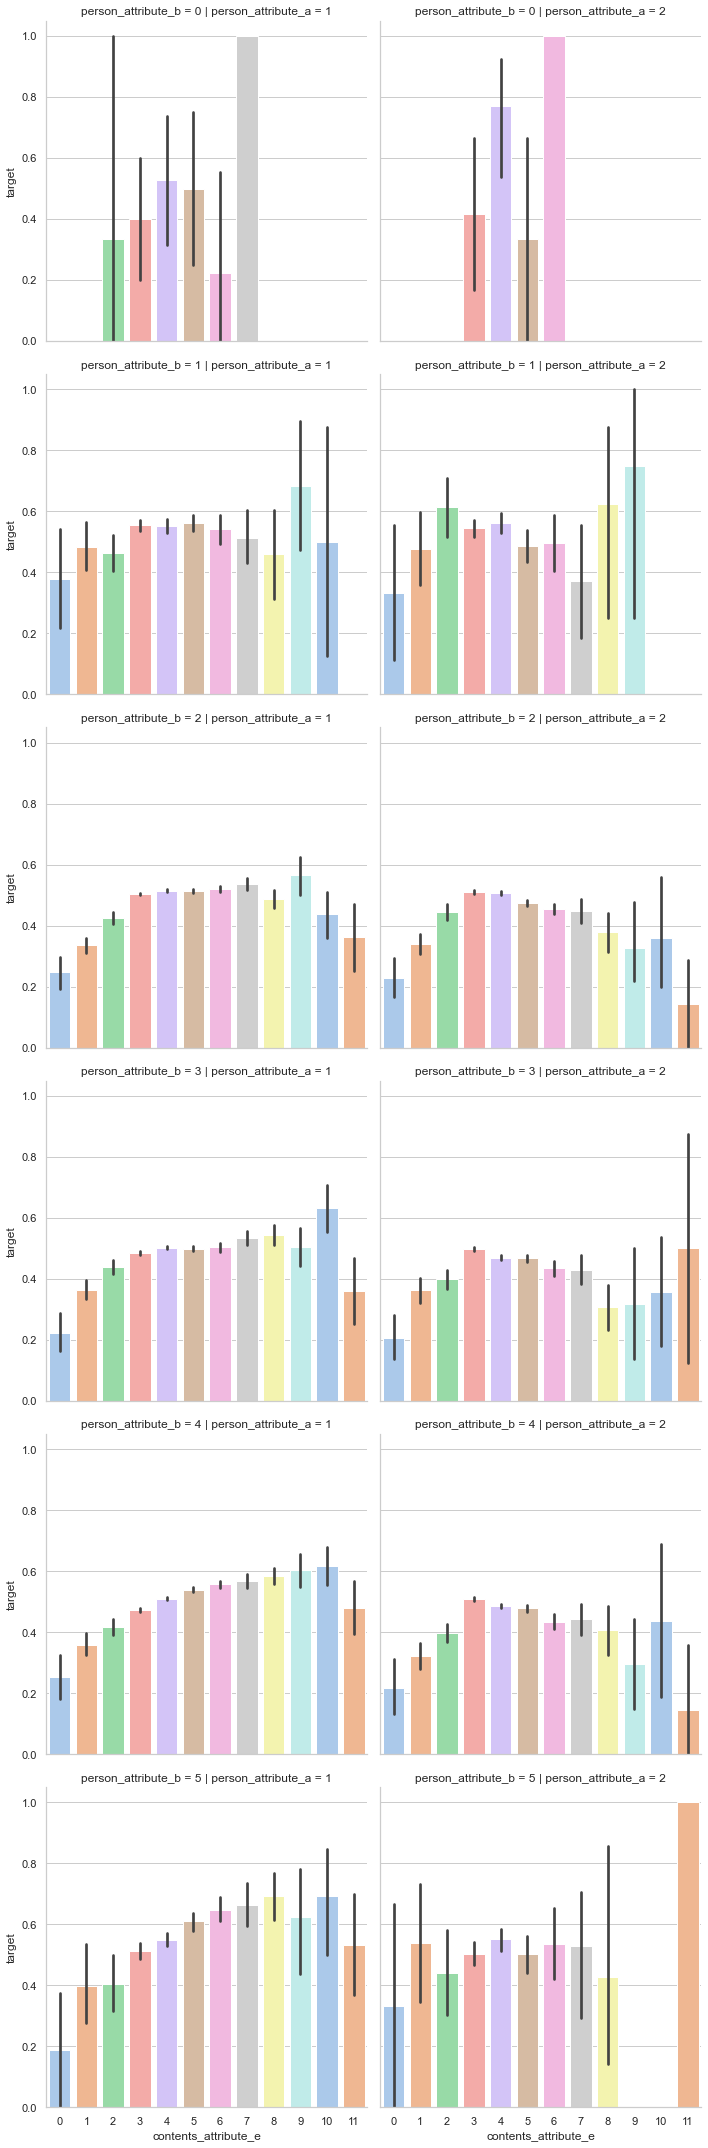

In [156]:
sns.catplot(x=x, y=y, kind="bar",col = "person_attribute_a",row = "person_attribute_b", data=job_data, palette='pastel', legend = True)

* ```contents_attribute_e = 7 & person_attribute_b = 0 & person_attribute_a = 1```에서 target 값이 100%에 수렴함
* ```contents_attribute_e = 6 & person_attribute_b = 0 & person_attribute_a = 2```에서 target 값이 100%에 수렴함
* ```contents_attribute_e = 11 & person_attribute_b = 5 & person_attribute_a = 2```에서 target 값이 100%에 수렴함

In [157]:
job_data.loc[(job_data['contents_attribute_e'] == 7) & (job_data['person_attribute_b'] == 0) & (job_data['person_attribute_a']==1)]

id  d_l_match_yn  d_m_match_yn  d_s_match_yn  h_l_match_yn  \
437122  437122          True          True          True         False   
470192  470192          True          True          True          True   

        h_m_match_yn  h_s_match_yn  person_attribute_a  person_attribute_a_1  \
437122         False         False                   1                     5   
470192          True          True                   1                     7   

        person_attribute_b  ...  person_prefer_h_3_u  contents_attribute_h_u  \
437122                   0  ...                   94                      58   
470192                   0  ...                  277                     277   

        contents_attribute_l_n  contents_attribute_l_s  \
437122                     437                     417   
470192                     797                     796   

        contents_attribute_l_m  contents_attribute_l_l     Y   M   D  target  
437122                     407                    2006  2020   3  26       1  
470192                     787                    2006  2020  11   6       1  

[2 rows x 61 columns]

* 0.00039844% 확률로 등장함
* 매우 희귀한 경우임

In [158]:
job_data.loc[(job_data['contents_attribute_e'] == 6) & (job_data['person_attribute_b'] == 0) & (job_data['person_attribute_a']==2)]

id  d_l_match_yn  d_m_match_yn  d_s_match_yn  h_l_match_yn  \
309103  309103         False         False         False         False   

        h_m_match_yn  h_s_match_yn  person_attribute_a  person_attribute_a_1  \
309103         False         False                   2                     3   

        person_attribute_b  ...  person_prefer_h_3_u  contents_attribute_h_u  \
309103                   0  ...                   58                      85   

        contents_attribute_l_n  contents_attribute_l_s  \
309103                     952                     951   

        contents_attribute_l_m  contents_attribute_l_l     Y  M  D  target  
309103                     930                    2009  2020  6  9       1  

[1 rows x 61 columns]

* 0.000199% 확률로 등장함
* 매우 희귀한 경우임

In [159]:
job_data.loc[(job_data['contents_attribute_e'] == 11) & (job_data['person_attribute_b'] == 5) & (job_data['person_attribute_a']==2)]

id  d_l_match_yn  d_m_match_yn  d_s_match_yn  h_l_match_yn  \
336600  336600         False         False         False         False   

        h_m_match_yn  h_s_match_yn  person_attribute_a  person_attribute_a_1  \
336600         False         False                   2                     3   

        person_attribute_b  ...  person_prefer_h_3_u  contents_attribute_h_u  \
336600                   5  ...                   94                      94   

        contents_attribute_l_n  contents_attribute_l_s  \
336600                    1332                    1331   

        contents_attribute_l_m  contents_attribute_l_l     Y  M   D  target  
336600                    1323                    2011  2020  6  29       1  

[1 rows x 61 columns]

* 0.000199% 확률로 등장함
* 매우 희귀한 경우임

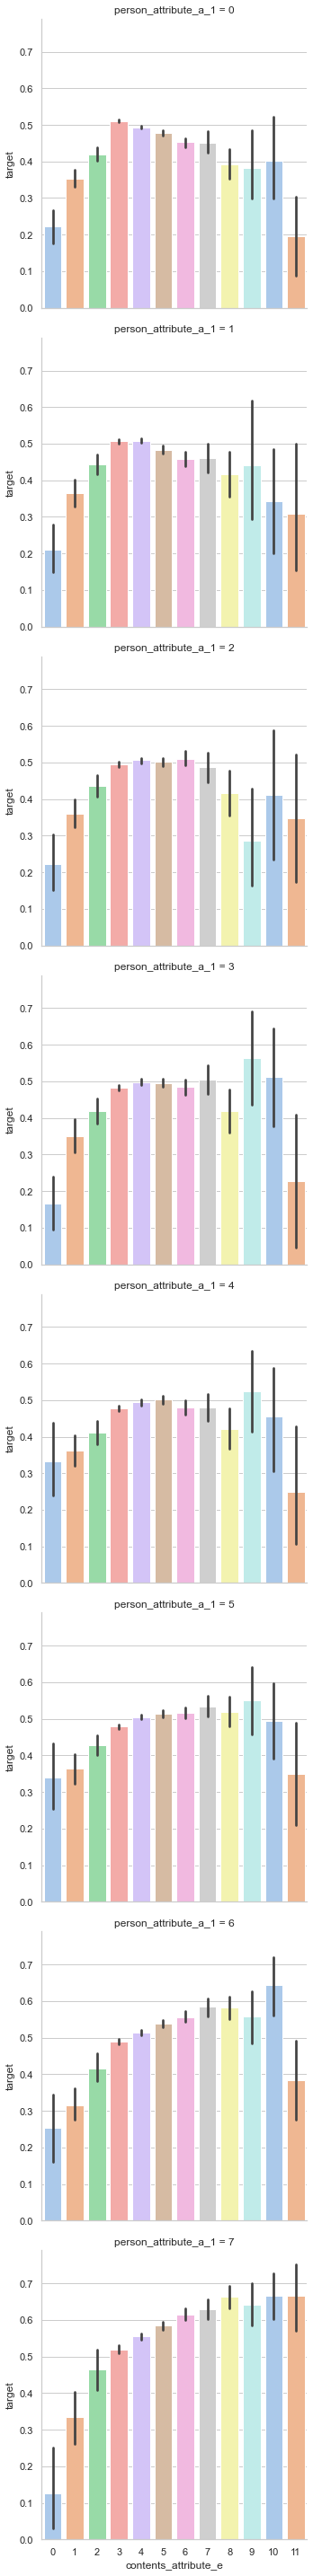

In [160]:
sns.catplot(x=x, y=y, kind="bar",row = "person_attribute_a_1", data=job_data, palette='pastel')

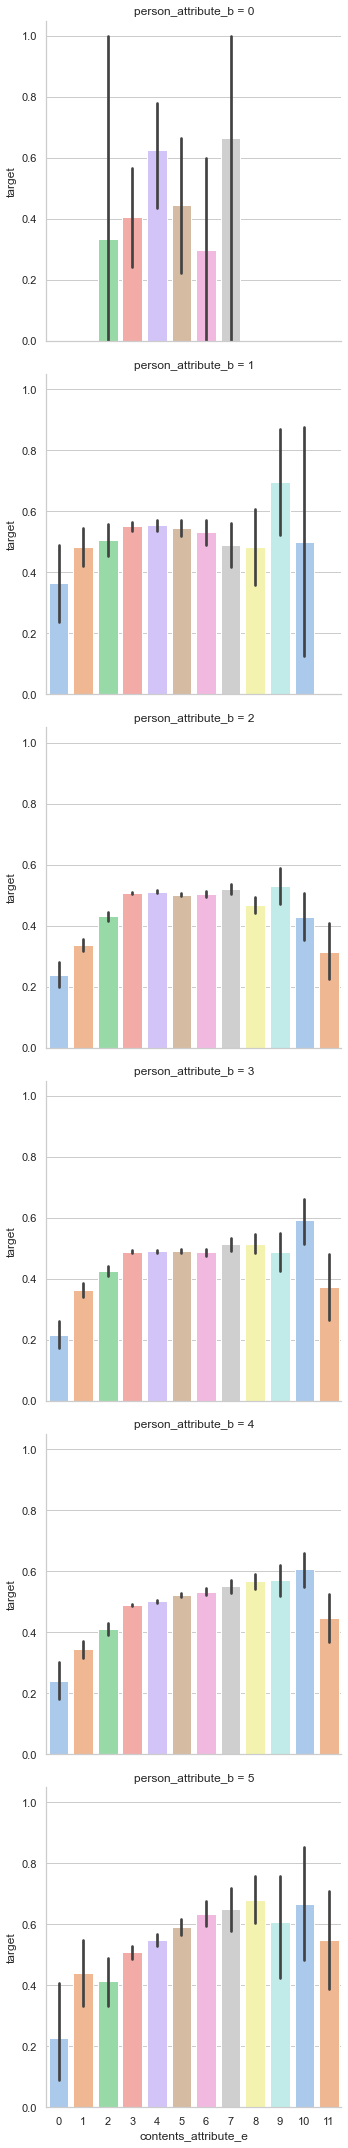

In [161]:
sns.catplot(x=x, y=y, kind="bar",row = "person_attribute_b", data=job_data, palette='pastel')

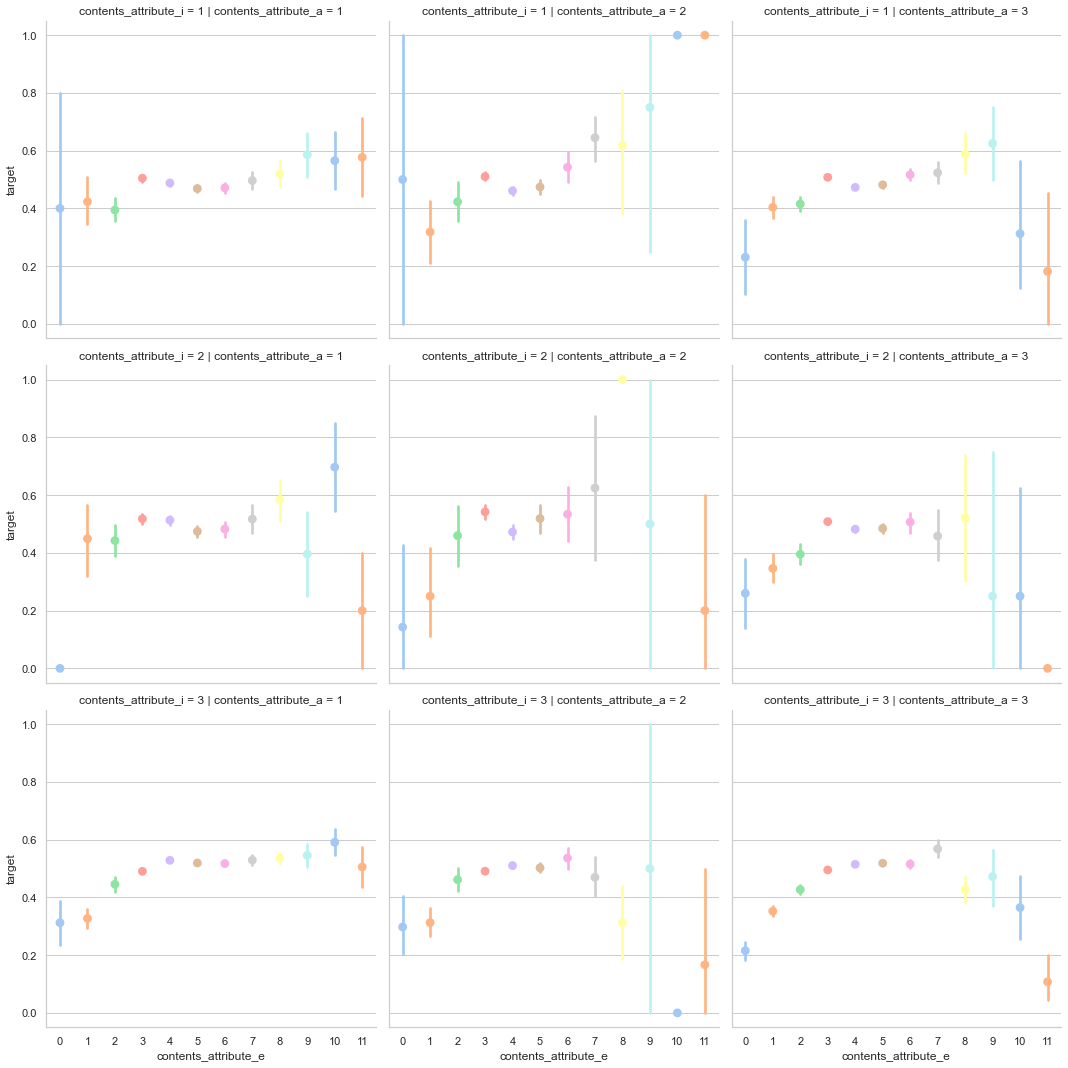

In [162]:
sns.catplot(x=x, y=y, kind="point",col = "contents_attribute_a",row = "contents_attribute_i", data=job_data, palette='pastel', legend = True)

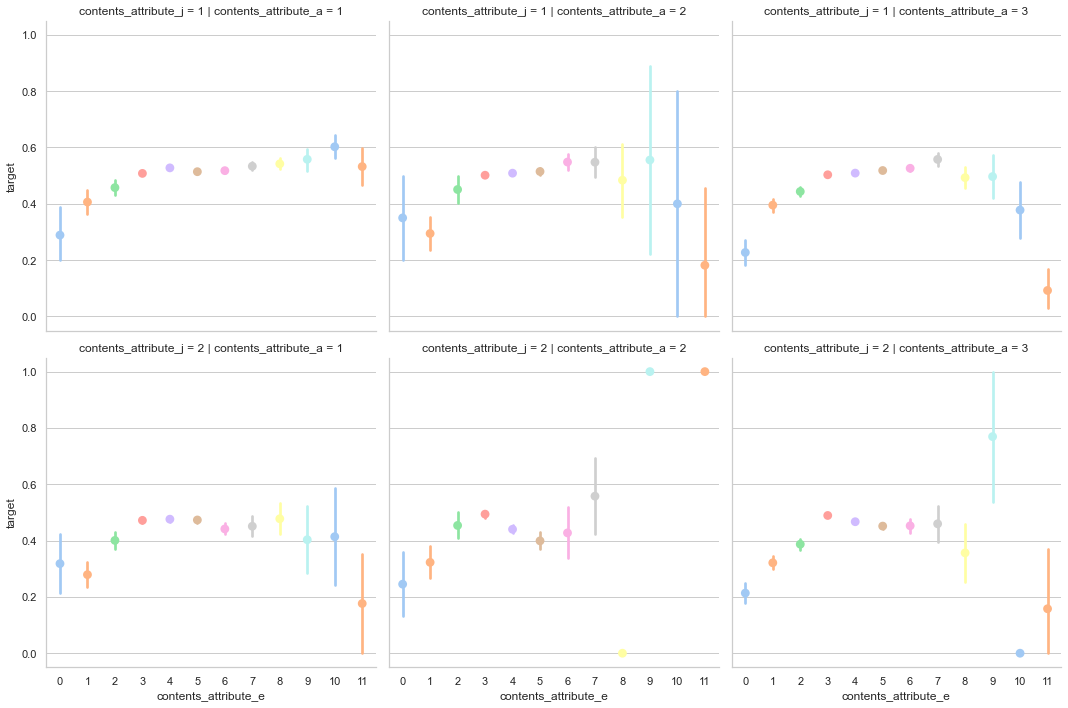

In [163]:
sns.catplot(x=x, y=y, kind="point",col = "contents_attribute_a",row = "contents_attribute_j", data=job_data, palette='pastel', legend = True)

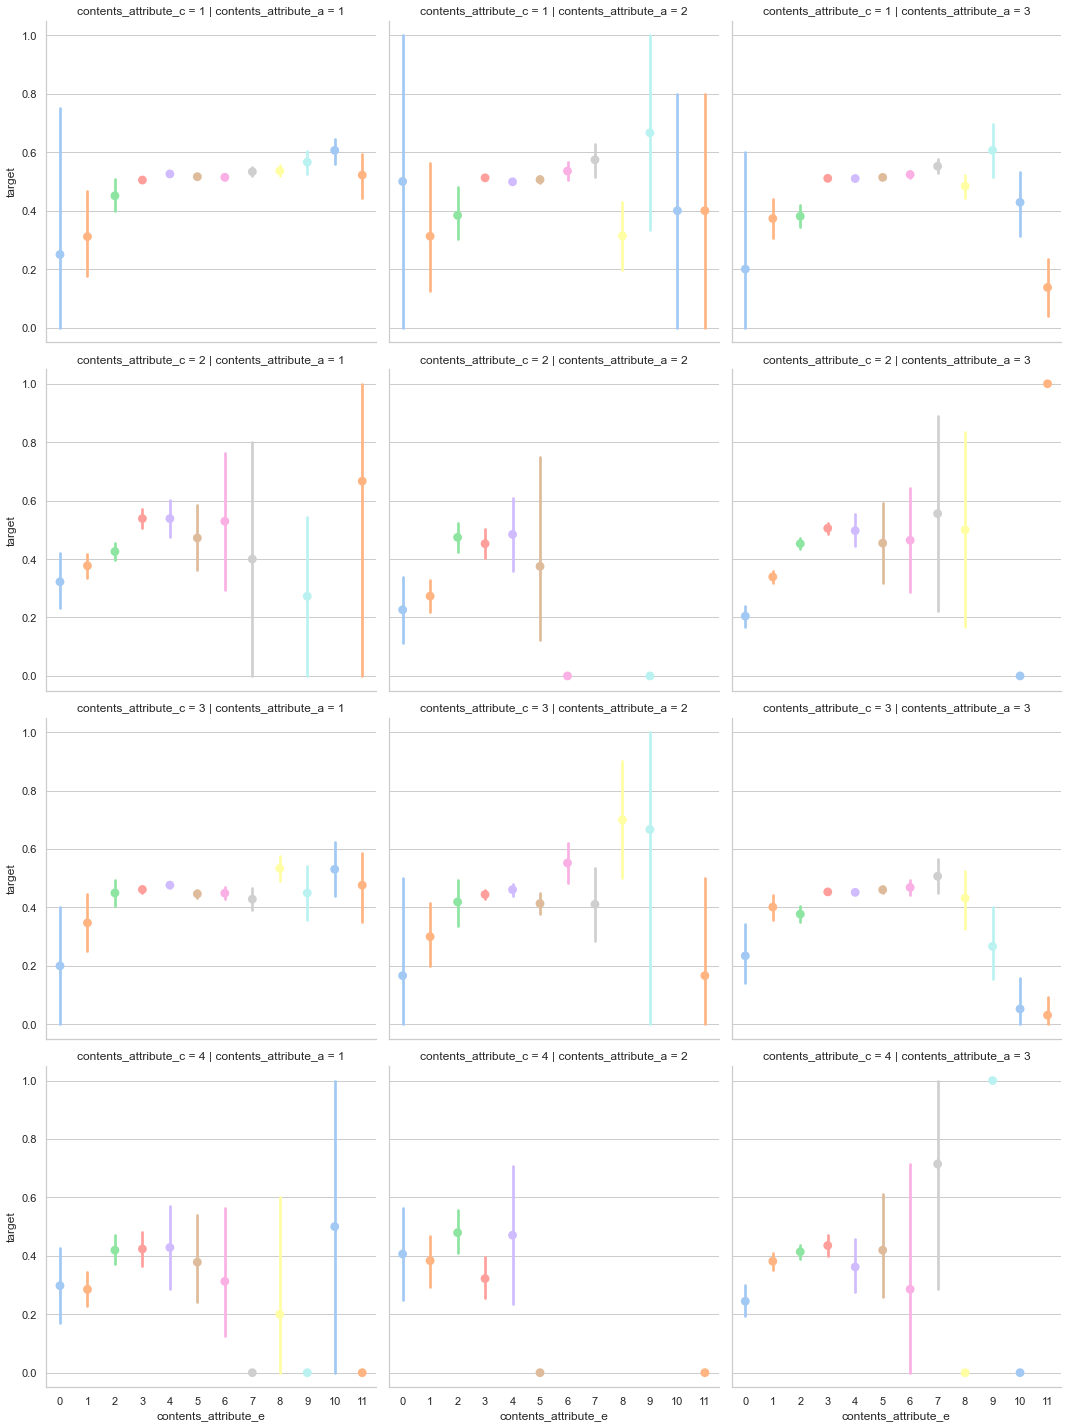

In [164]:
sns.catplot(x=x, y=y, kind="point",col = "contents_attribute_a",row = "contents_attribute_c", data=job_data, palette='pastel', legend = True)

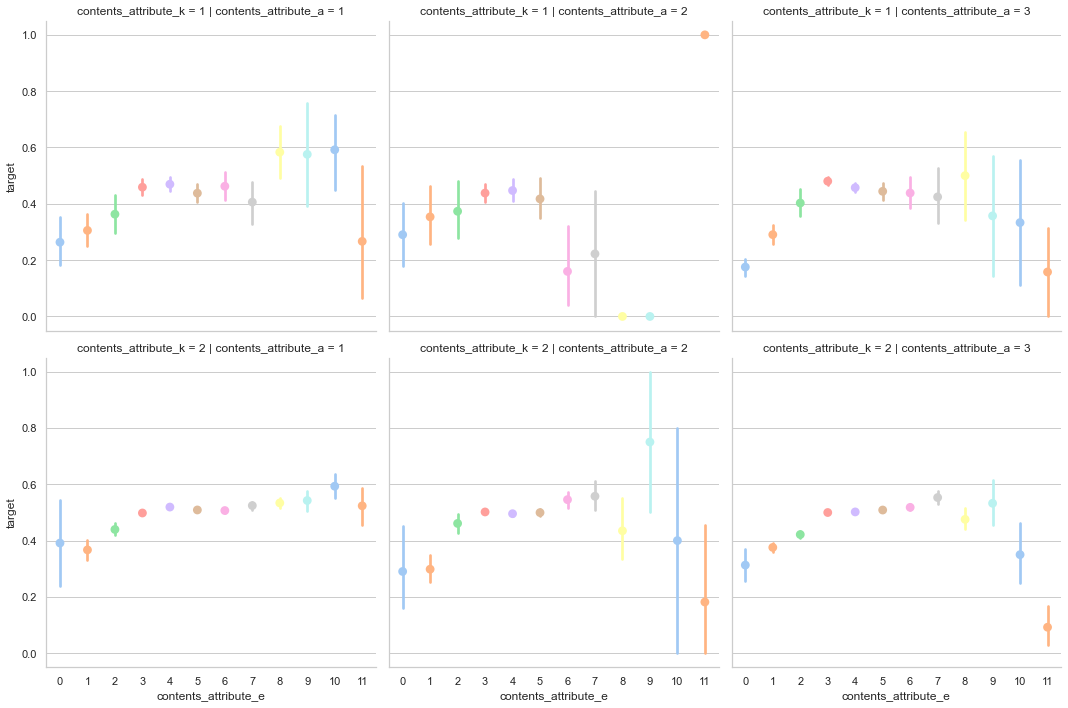

In [165]:
sns.catplot(x=x, y=y, kind="point",col = "contents_attribute_a",row = "contents_attribute_k", data=job_data, palette='pastel', legend = True)

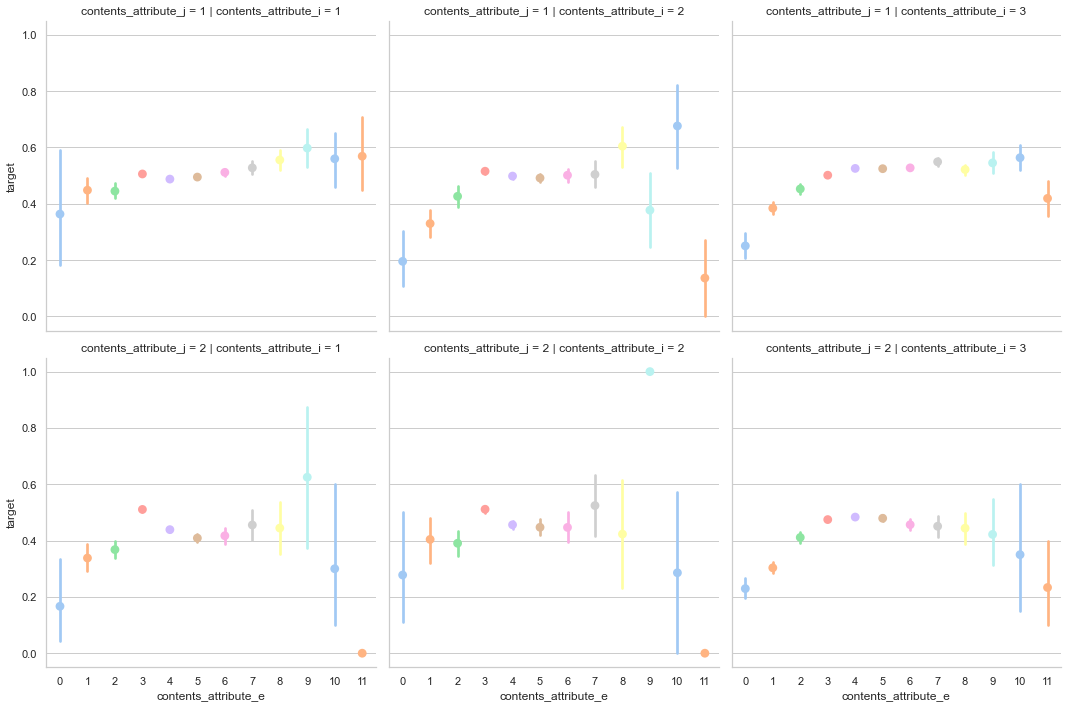

In [166]:
sns.catplot(x=x, y=y, kind="point",col = "contents_attribute_i",row = "contents_attribute_j", data=job_data, palette='pastel', legend = True)

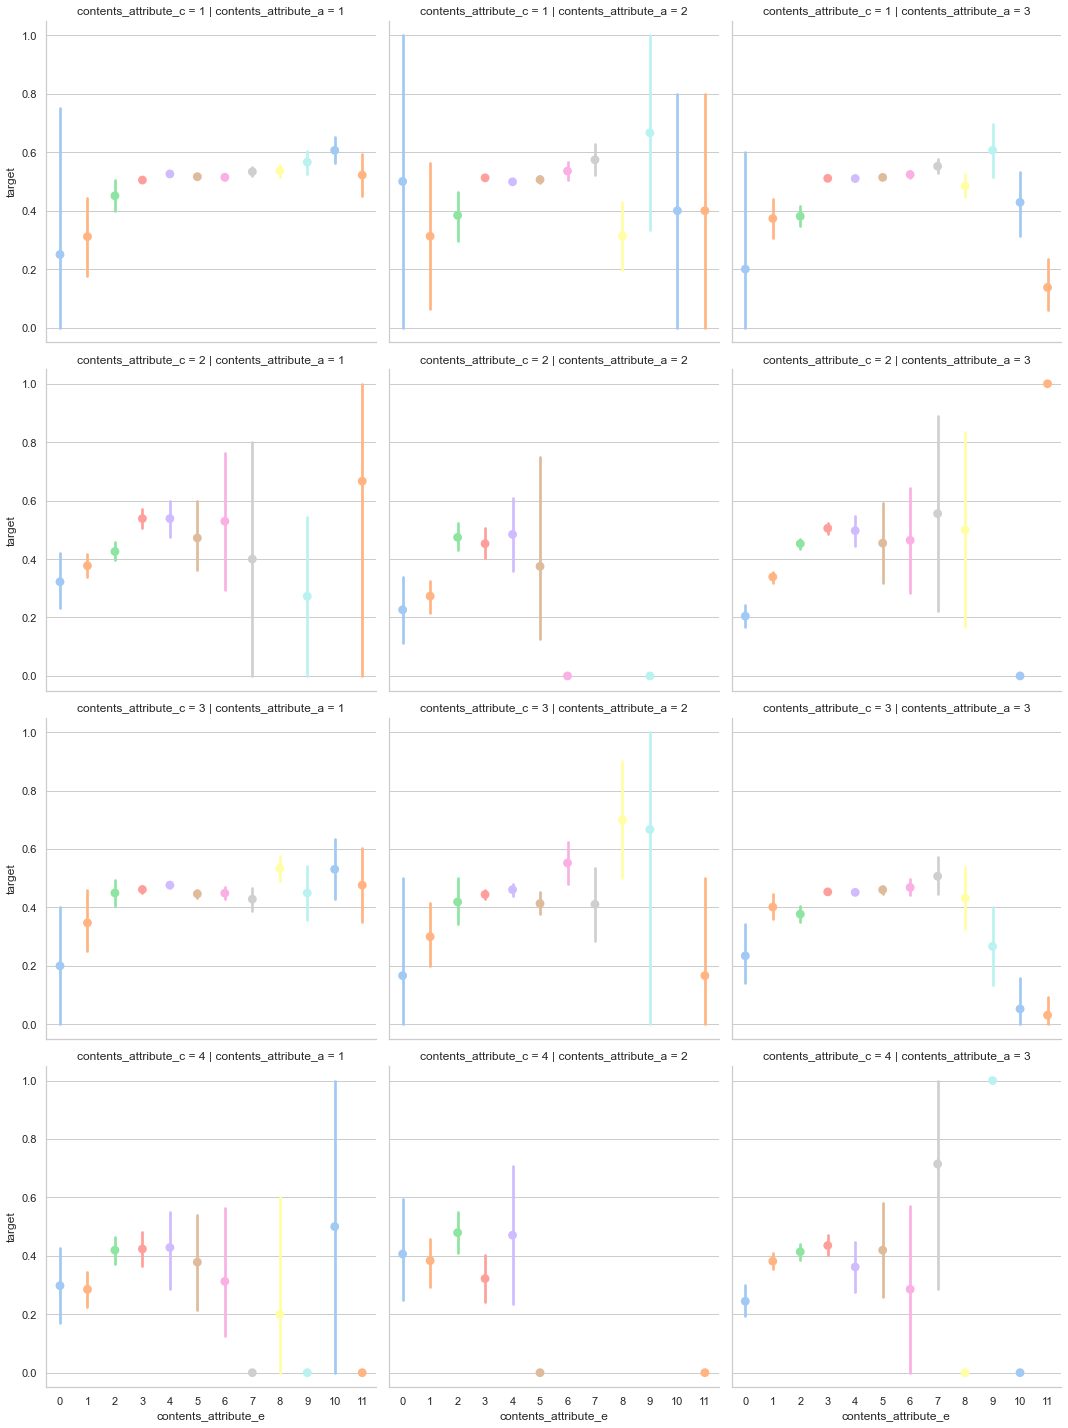

In [167]:
sns.catplot(x=x, y=y, kind="point",col = "contents_attribute_a",row = "contents_attribute_c", data=job_data, palette='pastel', legend = True)

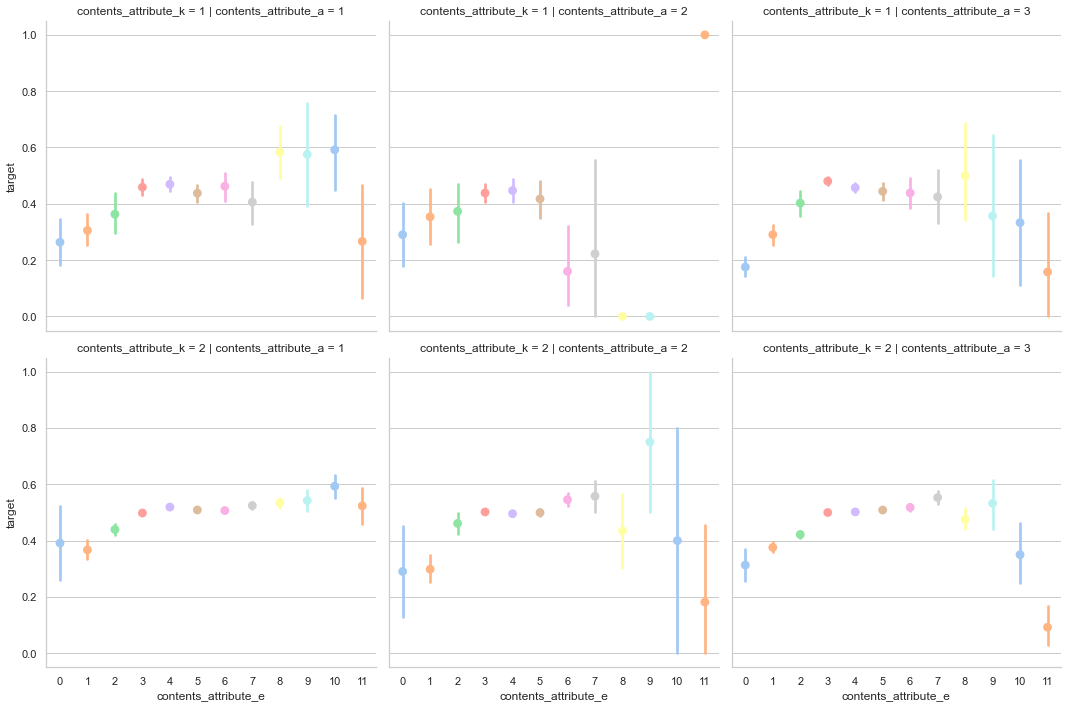

In [168]:
sns.catplot(x=x, y=y, kind="point",col = "contents_attribute_a",row = "contents_attribute_k", data=job_data, palette='pastel', legend = True)

### Ordinal Features에 대한 상관 계수

<AxesSubplot:>

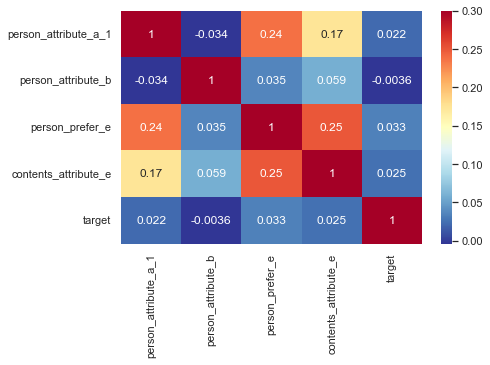

In [169]:
sns.heatmap(job_data[['person_attribute_a_1', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e', 'target']].corr(),cmap = plt.cm.RdYlBu_r, annot=True, vmin=-0.0040, vmax = 0.3)

### 월 데이터(M)

M: 
2     50424
3     49029
6     47444
7     47129
1     45683
10    45605
11    44979
8     44458
4     42790
9     42393
5     42017
Name: M, dtype: int64


<AxesSubplot:xlabel='M', ylabel='count'>

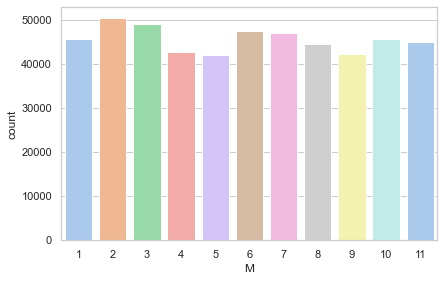

In [171]:
# contents_attribute_j
print("M: ")
print(job_data['M'].value_counts())

x = 'M'
y = 'target'

sns.countplot('M', data =job_data, palette='pastel')

In [172]:
value = job_data['M'].value_counts()
value_percent = job_data['M'].value_counts() / len(job_data) * 100
value_table = pd.concat([value, value_percent], axis=1)
value_table.columns = ['Num Of Values', '% of Total Values']
value_table

Num Of Values  % of Total Values
2           50424          10.045602
3           49029           9.767686
6           47444           9.451919
7           47129           9.389163
1           45683           9.101088
10          45605           9.085548
11          44979           8.960835
8           44458           8.857040
4           42790           8.524736
9           42393           8.445645
5           42017           8.370737

* 월 데이터 에대해서 전체적으로 균등하게 분포하고 있음
* 12월 데이터가 별도로 존재하지 않음

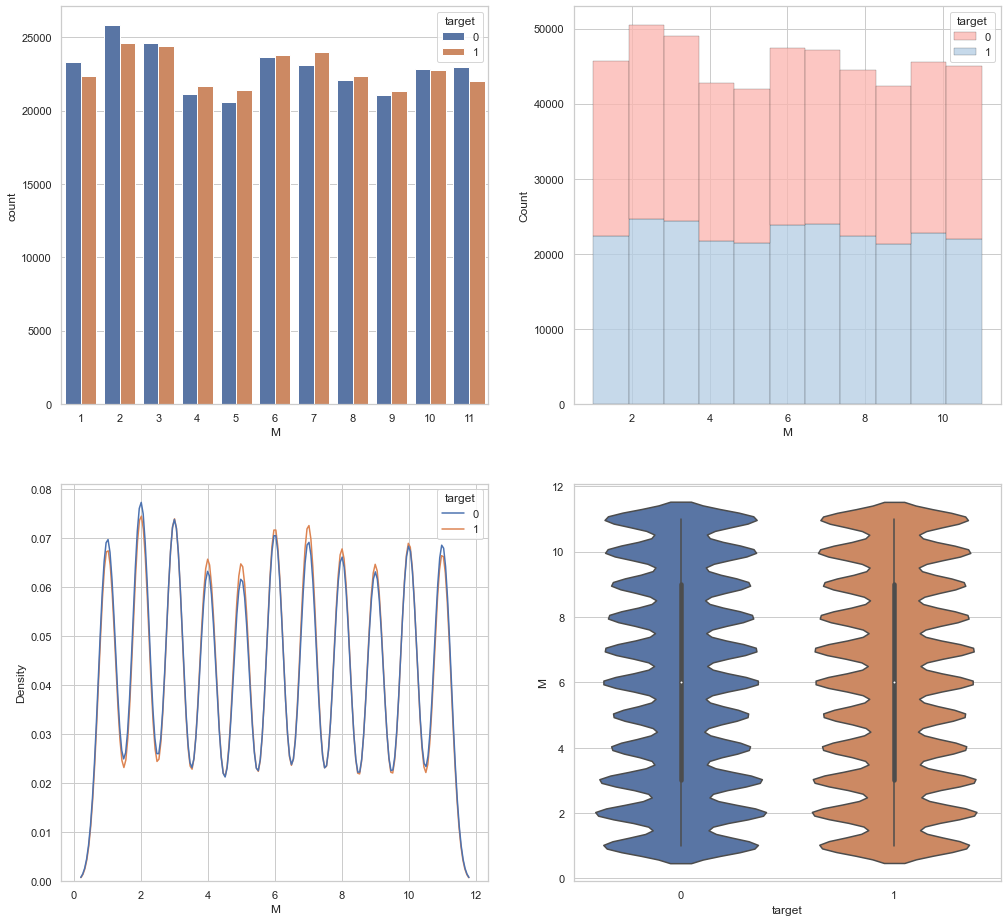

In [173]:
f, ax = plt.subplots(2,2, figsize=(15,15))

sns.countplot(x, hue = y, data =job_data, ax=ax[0][0])
sns.histplot(job_data,
            x = x,
            hue=y,
            multiple="stack", 
            palette="Pastel1",
            edgecolor=".10",
            linewidth=".20",
            bins = 11,
            ax = ax[0][1])
sns.kdeplot(data=job_data, x=x, hue=y, ax=ax[1][0])
sns.violinplot(data=job_data, x=y, y=x, ax=ax[1][1])
plt.show()

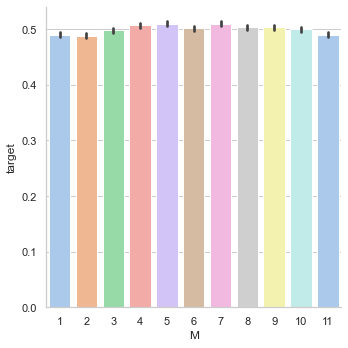

In [174]:
sns.catplot(x=x, y=y, kind="bar", data=job_data, palette='pastel')

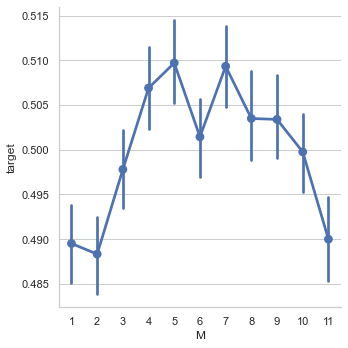

In [175]:
sns.catplot(x=x, y=y, kind="point", data=job_data)

* 1월, 2월, 11월이 전체 에서 가장 target과 관련이 없는 달인 것을 볼 수 있음

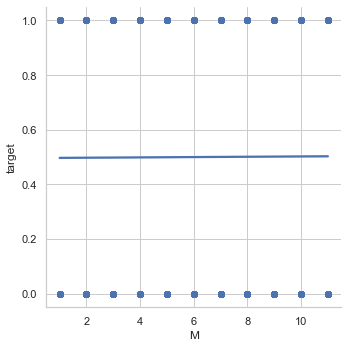

In [176]:
sns.lmplot(x = x, y = y, data = job_data)

#  일 데이터(D)

D: 
6     19482
13    19059
20    18448
3     18229
10    18180
7     17909
17    17648
14    17257
16    17122
2     16825
21    16781
12    16743
9     16723
11    16718
27    16499
19    16459
18    16417
24    16263
28    16136
8     16037
23    15778
4     15717
26    15270
5     15200
22    15194
25    15168
15    15164
29    14526
30    13869
1     12638
31     8492
Name: D, dtype: int64


<AxesSubplot:xlabel='D', ylabel='count'>

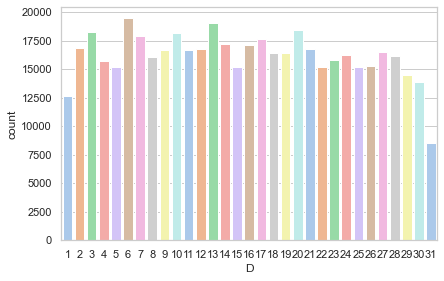

In [177]:
# contents_attribute_j
print("D: ")
print(job_data['D'].value_counts())

x = 'D'
y = 'target'

sns.countplot('D', data =job_data, palette='pastel')

In [178]:
value = job_data['D'].value_counts()
value_percent = job_data['D'].value_counts() / len(job_data) * 100
value_table = pd.concat([value, value_percent], axis=1)
value_table.columns = ['Num Of Values', '% of Total Values']
value_table

Num Of Values  % of Total Values
6           19482           3.881255
13          19059           3.796984
20          18448           3.675259
3           18229           3.631629
10          18180           3.621867
7           17909           3.567878
17          17648           3.515881
14          17257           3.437985
16          17122           3.411090
2           16825           3.351921
21          16781           3.343155
12          16743           3.335585
9           16723           3.331600
11          16718           3.330604
27          16499           3.286974
19          16459           3.279005
18          16417           3.270638
24          16263           3.239958
28          16136           3.214656
8           16037           3.194933
23          15778           3.143335
4           15717           3.131182
26          15270           3.042130
5           15200           3.028184
22          15194           3.026989
25          15168           3.021809
15          15164           3.021012
29          14526           2.893908
30          13869           2.763019
1           12638           2.517776
31           8492           1.691799

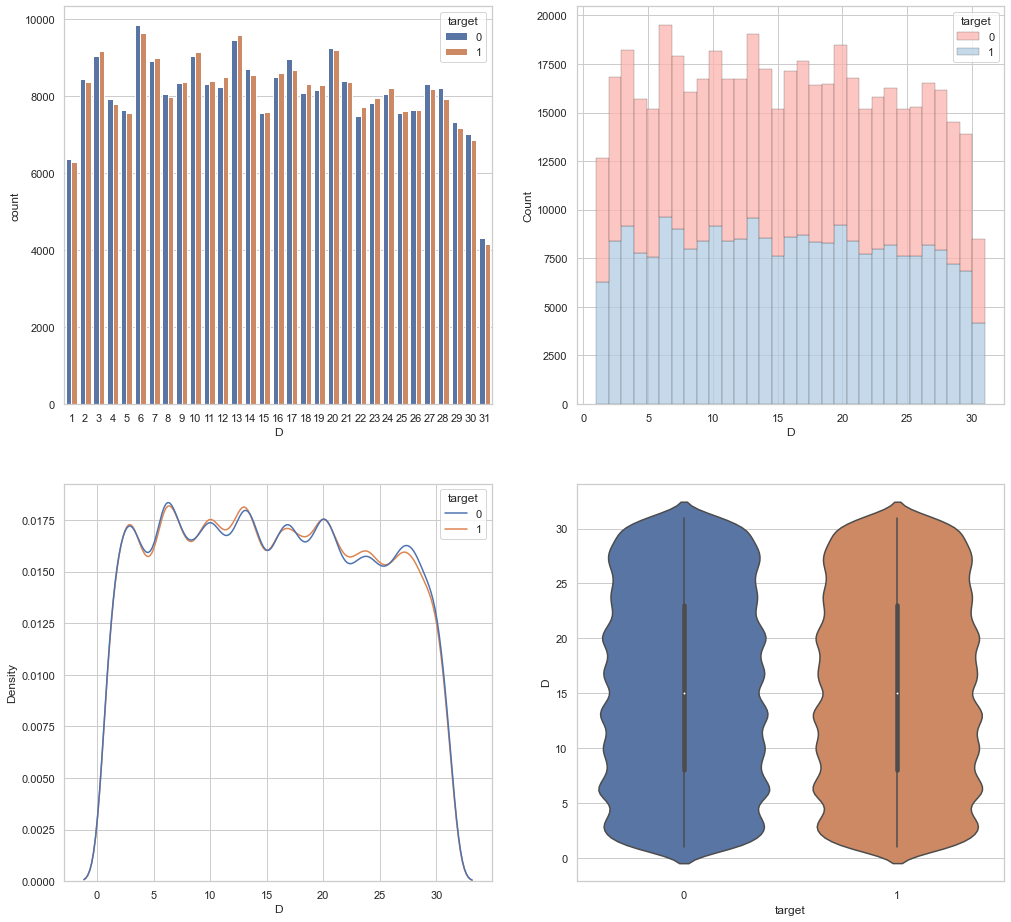

In [185]:
f, ax = plt.subplots(2,2, figsize=(15,15))

sns.countplot(x, hue = y, data =job_data, ax=ax[0][0])
sns.histplot(job_data,
            x = x,
            hue=y,
            multiple="stack", 
            palette="Pastel1",
            edgecolor=".10",
            linewidth=".20",
            bins = 31,
            ax = ax[0][1])
sns.kdeplot(data=job_data, x=x, hue=y, ax=ax[1][0])
sns.violinplot(data=job_data, x=y, y=x, ax=ax[1][1])
plt.show()

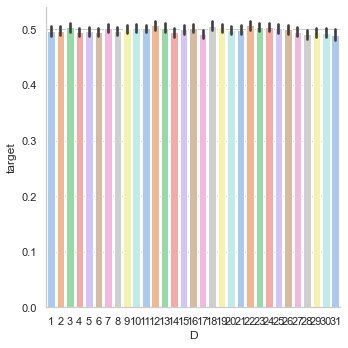

In [180]:
sns.catplot(x=x, y=y, kind="bar", data=job_data, palette='pastel')

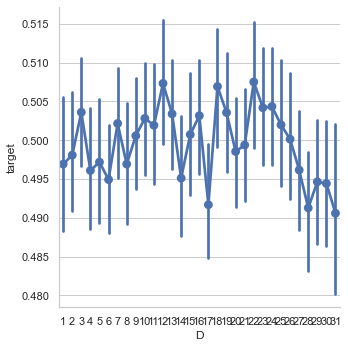

In [181]:
sns.catplot(x=x, y=y, kind="point", data=job_data)

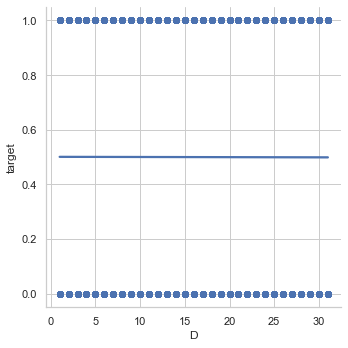

In [182]:
sns.lmplot(x = x, y = y, data = job_data)

<AxesSubplot:>

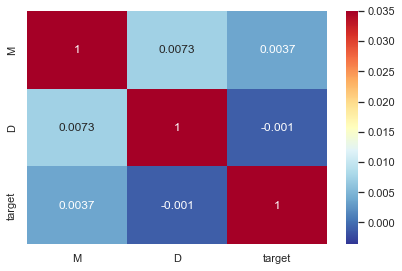

In [183]:
sns.heatmap(job_data[['M',
       'D', 'target']].corr(),cmap = plt.cm.RdYlBu_r, annot=True, vmin=-0.0036, vmax = 0.035)

<AxesSubplot:>

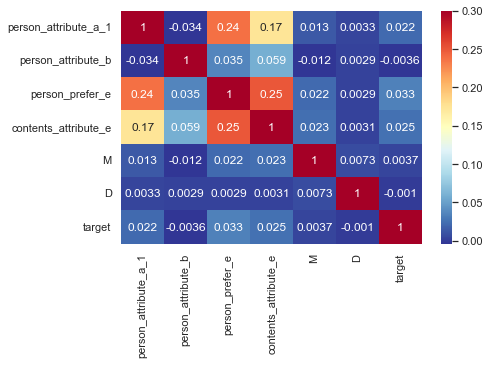

In [184]:
sns.heatmap(job_data[['person_attribute_a_1', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e','M','D', 'target']].corr(),cmap = plt.cm.RdYlBu_r, annot=True, vmin=-0.0040, vmax = 0.3)

# 다음은 나머지 EDA 부분과 Feature Engineerinng 부분으로 돌아 오겠습니다.